# 2nd Project 

## General information on the project

This is a project by Andre Kaschkow and Leonard Boes for a data science bootcamp. The goal is to create a predictive model that finds defaulting loans in a P2P credit platform before they even occur.

## Business Understanding

### Features and Label
Identifying and defining the label in order

## Data Mining

### Loading the necessary libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import dexplot as dxp

### Loading the dataset

In [2]:
original = pd.read_csv("Lending Club/loans_2007.csv") #keep an untouched original for later comparisons
df = original.copy()

/Users/leo/anaconda3/envs/nf/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# Make tables more readable by expanding number of displayed columns
pd.set_option('display.max_columns', 60)

### First look at Data

In [4]:
df.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501  1296599.0     5000.0       5000.0           4975.0   36 months   
1  1077430  1314167.0     2500.0       2500.0           2500.0   60 months   
2  1077175  1313524.0     2400.0       2400.0           2400.0   36 months   
3  1076863  1277178.0    10000.0      10000.0          10000.0   36 months   
4  1075358  1311748.0     3000.0       3000.0           3000.0   60 months   

  int_rate  installment grade sub_grade                 emp_title emp_length  \
0   10.65%       162.87     B        B2                       NaN  10+ years   
1   15.27%        59.83     C        C4                     Ryder   < 1 year   
2   15.96%        84.33     C        C5                       NaN  10+ years   
3   13.49%       339.31     C        C1       AIR RESOURCES BOARD  10+ years   
4   12.69%        67.79     B        B5  University Medical Group     1 year   

  home_ownership  annual_inc verification_status   issue_d  loan_status  \
0           RENT     24000.0            Verified  Dec-2011   Fully Paid   
1           RENT     30000.0     Source Verified  Dec-2011  Charged Off   
2           RENT     12252.0        Not Verified  Dec-2011   Fully Paid   
3           RENT     49200.0     Source Verified  Dec-2011   Fully Paid   
4           RENT     80000.0     Source Verified  Dec-2011      Current   

  pymnt_plan         purpose                 title zip_code addr_state    dti  \
0          n     credit_card              Computer    860xx         AZ  27.65   
1          n             car                  bike    309xx         GA   1.00   
2          n  small_business  real estate business    606xx         IL   8.72   
3          n           other              personel    917xx         CA  20.00   
4          n           other              Personal    972xx         OR  17.94   

   delinq_2yrs earliest_cr_line  inq_last_6mths  open_acc  pub_rec  revol_bal  \
0          0.0         Jan-1985             1.0       3.0      0.0    13648.0   
1          0.0         Apr-1999             5.0       3.0      0.0     1687.0   
2          0.0         Nov-2001             2.0       2.0      0.0     2956.0   
3          0.0         Feb-1996             1.0      10.0      0.0     5598.0   
4          0.0         Jan-1996             0.0      15.0      0.0    27783.0   

  revol_util  total_acc initial_list_status  out_prncp  out_prncp_inv  \
0      83.7%        9.0                   f       0.00           0.00   
1       9.4%        4.0                   f       0.00           0.00   
2      98.5%       10.0                   f       0.00           0.00   
3        21%       37.0                   f       0.00           0.00   
4      53.9%       38.0                   f     461.73         461.73   

    total_pymnt  total_pymnt_inv  total_rec_prncp  total_rec_int  \
0   5863.155187          5833.84          5000.00         863.16   
1   1008.710000          1008.71           456.46         435.17   
2   3005.666844          3005.67          2400.00         605.67   
3  12231.890000         12231.89         10000.00        2214.92   
4   3581.120000          3581.12          2538.27        1042.85   

   total_rec_late_fee  recoveries  collection_recovery_fee last_pymnt_d  \
0                0.00        0.00                     0.00     Jan-2015   
1                0.00      117.08                     1.11     Apr-2013   
2                0.00        0.00                     0.00     Jun-2014   
3               16.97        0.00                     0.00     Jan-2015   
4                0.00        0.00                     0.00     Jun-2016   

   last_pymnt_amnt last_credit_pull_d  collections_12_mths_ex_med  \
0           171.62           Jun-2016                         0.0   
1           119.66           Sep-2013                         0.0   
2           649.91           Jun-2016                         0.0   
3           357.48           Apr-2016                     

In [5]:
df.shape
# since the df has many columns, we are going to slice the
# columns in 6 blocks in order to have them a bit handy to work with

(42538, 52)

## Data Cleaning

### Time format conversion
 convert columns with time variables to time formats

In [6]:
# identifying and listing the 'datetime'-columns
datecols = ['issue_d','earliest_cr_line','last_credit_pull_d','last_pymnt_d']

In [7]:
# Changing the format / datatype
for col in datecols:
    df[col] = pd.to_datetime(df[col])

### Missing values
Finding and dealing with missing values

#### Finding missing values

In [8]:
# Creating a list null-values in the dataset
missing = pd.DataFrame(df.isnull().sum(),columns=['number'])
missing['pct'] = round(missing.number/df.shape[0]*100,1)
missing[missing.number != 0]

number  pct
member_id                        3  0.0
loan_amnt                        3  0.0
funded_amnt                      3  0.0
funded_amnt_inv                  3  0.0
term                             3  0.0
int_rate                         3  0.0
installment                      3  0.0
grade                            3  0.0
sub_grade                        3  0.0
emp_title                     2629  6.2
emp_length                    1115  2.6
home_ownership                   3  0.0
annual_inc                       7  0.0
verification_status              3  0.0
issue_d                          3  0.0
loan_status                      3  0.0
pymnt_plan                       3  0.0
purpose                          3  0.0
title                           16  0.0
zip_code                         3  0.0
addr_state                       3  0.0
dti                              3  0.0
delinq_2yrs                     32  0.1
earliest_cr_line                32  0.1
inq_last_6mths                  32  0.1
open_acc                        32  0.1
pub_rec                         32  0.1
revol_bal                        3  0.0
revol_util                      93  0.2
total_acc                       32  0.1
initial_list_status              3  0.0
out_prncp                        3  0.0
out_prncp_inv                    3  0.0
total_pymnt                      3  0.0
total_pymnt_inv                  3  0.0
total_rec_prncp                  3  0.0
total_rec_int                    3  0.0
total_rec_late_fee               3  0.0
recoveries                       3  0.0
collection_recovery_fee          3  0.0
last_pymnt_d                    86  0.2
last_pymnt_amnt                  3  0.0
last_credit_pull_d               7  0.0
collections_12_mths_ex_med     148  0.3
policy_code                      3  0.0
application_type                 3  0.0
acc_now_delinq                  32  0.1
chargeoff_within_12_mths       148  0.3
delinq_amnt                     32  0.1
pub_rec_bankruptcies          1368  3.2
tax_liens                      108  0.3

Missing values only seem to belong to a fraction of the original data. For simplicity, we decide to just delete every row that contains any missing values

#### Dealing with missing values
Not many rows contain missing values. Thus, delete all rows that contain any missing values

In [9]:
#Drop all rows that contain nan values
df.dropna(inplace=True)

#Calculate how much data we have lost resp. which is left compared to original
print(f'The dataset no longer contains missing values. The size is reduced to {round(len(df)/len(original)*100)}% of the original size')

# 90% is still a reasonable portion considering 42.000 datapopints

The dataset no longer contains missing values. The size is reduced to 90% of the original size


### Categorical variables to numeric


#### Deleting Strings from numeric variables


In [10]:
#delete string out of term column
df.term = [int(str(term).replace(' months','')) for term in df.term]

df['int_rate'] = [float(i.replace('%','')) for i in df['int_rate']] #!! might want to divide by 100 to get percentage value

#delete % sign from revol_util rate and convert it to float
df['revol_util'] = [float(i.replace('%','')) for i in df['revol_util']] #!! might want to divide by 100 to get percentage value

#change values in emp_length so that they make better column names when turned into dummies
df['emp_length'] = [i.replace('<','-').replace(' ','') for i in df['emp_length']] #!! might want to divide by 100 to get percentage value

### Adjusting columns


#### Rename unclear column names

In [11]:
#rename verification status for better understanding https://www.lendingclub.com/investing/investor-education/income-verification
#dti = debt/income ratio https://www.lendingclub.com/loans/resource-center/calculating-debt-to-income
df.rename(columns={'verification_status':'inco_verif_status','dti':'debt_income_ratio'},inplace=True)

#### Create list with names of categorical variables

In [12]:
cats = ['term','grade','sub_grade','home_ownership','inco_verif_status','purpose','addr_state','emp_length']

#### List of unneccary variables
Some variables are always the same for each observation. Others contain information that we do not want to consider in our analysis. In the following, we selected the features that we do not want to consider in the further analysis

In [13]:
#application type is always the same
#emp_title is very fragmented and has typos and weird duplicates
#pymnt_plan is nearly always the same (except 1 occasion)
#title is self-given purpose of loan and very fragmented and full of typos and duplicates - might bear some nice nugggets for later investigation 
#zip code is rather fragmented (816 unique values) but could be interesting for further analysis
#initial_list_status only contains one value for all observations
#policy_code only contains one value for all observations
#member id and id are individual for each observation
#collections_12_mths_ex_med is always zero
#acc_now_delinq is always zero
#chargeoff_within_12_mths is always zero
#funded_amnt' and 'funded_amnt_inv' is information that we would not have in the beginning
#'grade' and 'sub_grade' is information we would not have in the beginning
#'delinq_2yrs' is almost always 0
sep_cols = ['application_type','emp_title','pymnt_plan','title','zip_code','initial_list_status','policy_code','id','member_id','collections_12_mths_ex_med','acc_now_delinq','chargeoff_within_12_mths','delinq_amnt','tax_liens','funded_amnt', 'funded_amnt_inv','grade', 'sub_grade','delinq_2yrs']

## Delete extreme outliers
Some people have extremely high income that highly skews the distribution. We decide to drop those outliers for our analysis. 

In future work, outliers in other features should be looked at as well

In [14]:
#delete most extreme outliers in terms of annual income 
df.sort_values('annual_inc',ascending=False).head(10)
df = df[df['annual_inc'] <= 1500000]

## Data Exploration

### Defining the Label 

In [15]:
#what categories are most common in our label?
df.loan_status.value_counts()

Fully Paid                                             30595
Charged Off                                             4949
Does not meet the credit policy. Status:Fully Paid      1446
Current                                                  897
Does not meet the credit policy. Status:Charged Off      495
Late (31-120 days)                                        22
In Grace Period                                           16
Late (16-30 days)                                          7
Default                                                    2
Name: loan_status, dtype: int64

In [16]:
#classify loan status according to decision if person should have been 
#rejected (1) or should have gotten a loan (0)

loan_status_class = {'Fully Paid':0,
                     'Does not meet the credit policy. Status:Fully Paid':0,
                     'Late (16-30 days)':0,
                     'In Grace Period':0,
                     'Current':0,
                     'Charged Off':1,
                     'Does not meet the credit policy. Status:Charged Off':1,
                     'Late (31-120 days)':1,
                     'Default':1}

In [17]:
df['classification'] = [loan_status_class[key] for key in df['loan_status']]

In [18]:
df[df.classification == 0]['loan_status'].unique()

array(['Fully Paid', 'Current', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid'], dtype=object)

## Create final dataframe

### Drop irrelevant features

In [19]:
#create dataframe with only important features
train_df = df.drop(sep_cols,axis='columns')

### Feature Engineering - Add handmade features
Create new columns in the train_df dataframe during the Feature Engineering for our models


In [20]:
list_new_features = ['loan_inc_rat','inc_monthly','months_to_pay','rev_bal_vs_inc','year','month','mon_debt_tot_abs','dti_incl_inst','dti_delta_abs','dti_delta_ratio']

#### Adding monthly income

In [21]:
train_df['inc_monthly'] = (train_df['annual_inc']/12).round(2)

#### Months to pay ratio
How many months would it take for a loantaker to pay the money back with his given monthly income

In [22]:
train_df['months_to_pay'] = (train_df['loan_amnt']/train_df['inc_monthly']).round(2)
                                                                                

#### Monthly_debt_tot_abs

In [23]:
train_df['mon_debt_tot_abs'] = ((train_df['debt_income_ratio']/100)*(train_df['inc_monthly'])+(train_df['installment'])).round(2)

#### updated DTI 

In [24]:
train_df['dti_incl_inst'] = (train_df['mon_debt_tot_abs']/train_df['inc_monthly']).round(2)

#### Revolving_balance vs. income



In [25]:
train_df['rev_bal_vs_inc'] = (train_df['revol_bal']/train_df['annual_inc']).round(2)


#### year and month of issue date

In [26]:
train_df['year'] = pd.DatetimeIndex(df['issue_d']).year
train_df['month'] = pd.DatetimeIndex(df['issue_d']).month

#### dti-delta after loan abs
how many per cent point did the dti rose after the loan 

In [27]:
train_df['dti_delta_abs']= train_df['dti_incl_inst']-(train_df['debt_income_ratio']/100).round(2)

### Define label(s) and features in respective lists

In [28]:
#define labels, categorical and numerical features
labels = ['classification','loan_status']
features = train_df.columns.drop(labels)
#num_features = features.drop(cats)

#### Update list of categorical variables to only contain features that are present in final data frame

In [29]:
#update cats to represent current list of categorical features (because some of them were already dropped in the df)
cats = [c for c in cats if c in train_df.columns]

## Exploratory Data Analysis

### Plot the relationship between label and each feature as histogram

/Users/leo/anaconda3/envs/nf/lib/python3.6/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)
/Users/leo/anaconda3/envs/nf/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


KeyError: 'inc_monthly'

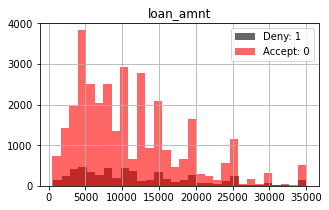

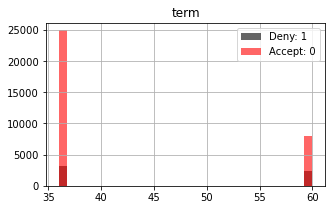

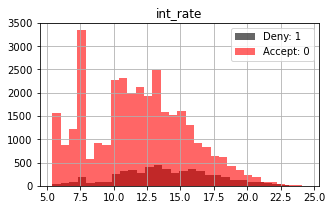

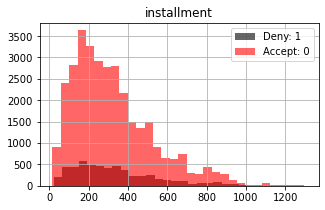

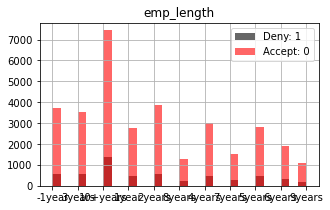

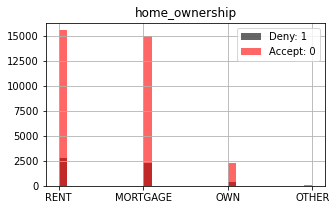

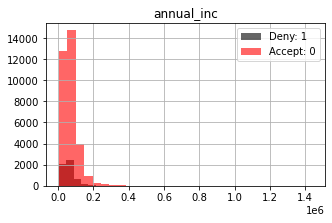

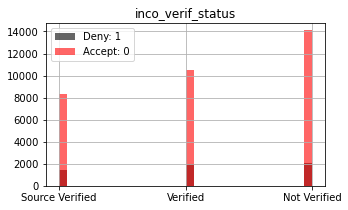

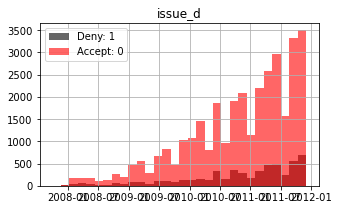

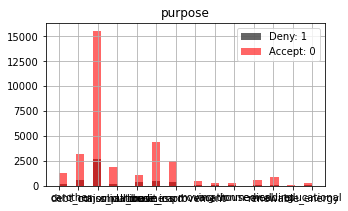

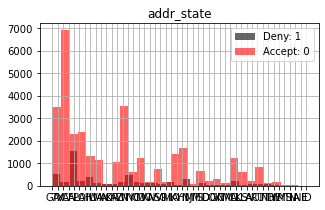

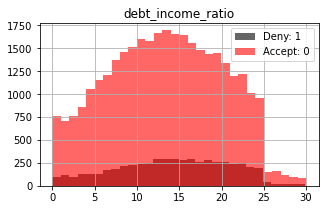

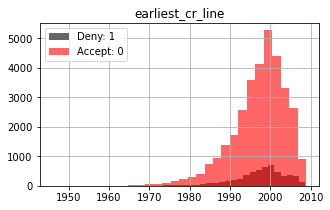

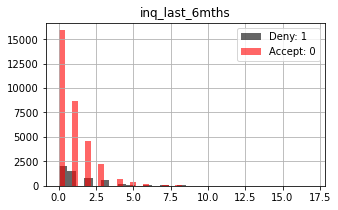

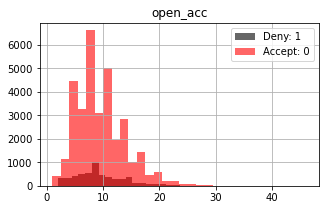

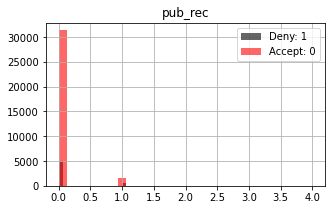

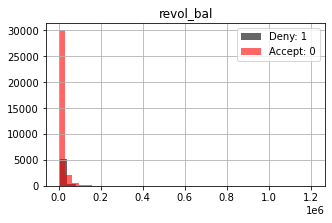

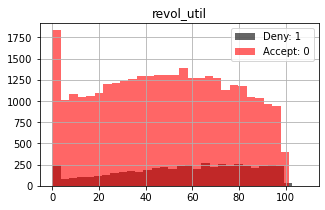

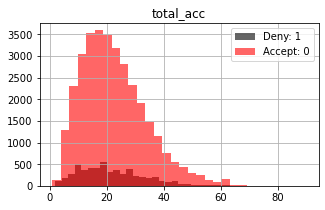

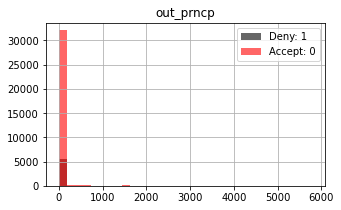

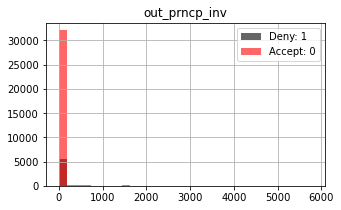

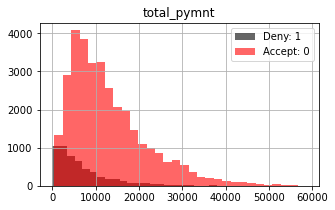

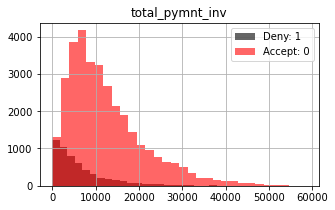

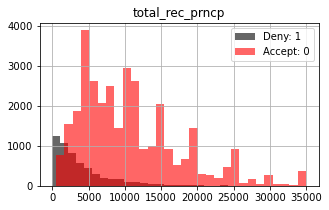

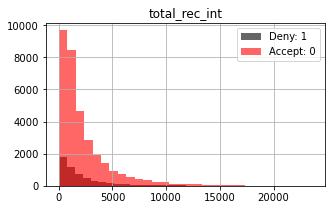

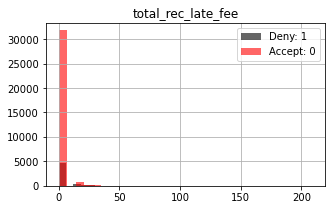

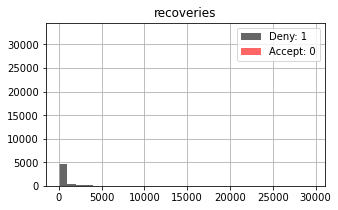

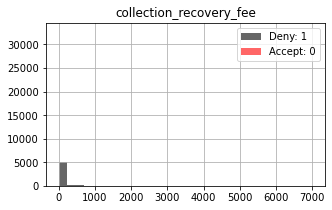

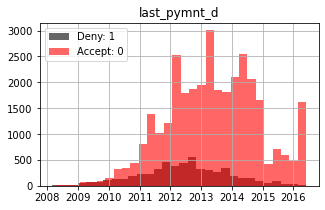

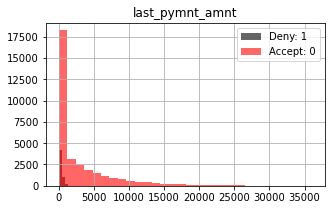

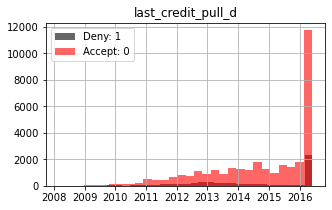

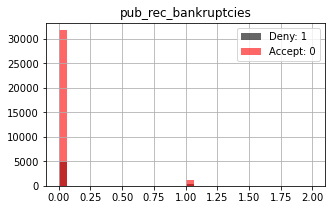

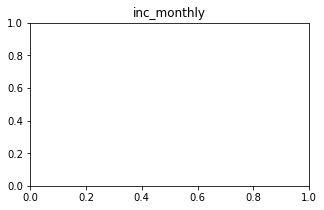

In [30]:
#This code currently only works for most of the features. It will throw an error for a few features which must be handled in future work
for fe in features:
    plt.figure(figsize=(5,3))
    plt.title(fe)
    df[df['classification']==1][fe].hist(bins=30, color='black', label='Deny: 1', alpha=0.6)
    df[df['classification']==0][fe].hist(bins=30, color='red', label='Accept: 0', alpha=0.6)
    plt.legend()

### Drop features with data leakage
The EDA has shown us that there might be some features that contain too much information about the label that we want to predict or that contain information that our user would not have at the point in time when granting a loan. Thus, we decide to store leak features in a list which will be dropped from the dataframe later on

In [31]:
#drop features that already give too much information about outcome
leak_features = ['recoveries','collection_recovery_fee','int_rate','total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
       'last_pymnt_amnt','out_prncp',
       'out_prncp_inv',]
#num_features = num_features.drop(leak_features)

There are as well time-related features that we will not consider in our analysis. Thus, we create a list with the minimal amount of most important features

In [32]:
#drop columns with datetime to get minimal features
min_features = features.drop(datecols)
min_features = min_features.drop(leak_features)

Drop all features from the dataframe except most important ones and the label

In [33]:
#delete features that give too much information from train_df
train_df = train_df.drop(leak_features,axis='columns')

In [34]:
#delete columns with datetime format for the first iteration models
train_df = train_df.drop(datecols,axis='columns')

Create dataframe that only contains defaulted loans for better analysis

In [35]:
#sample the observations that should have been rejectedb
train_df_rej = train_df[train_df['classification']==1]

We can find out that most people work longer than 10 years for the same employer

<AxesSubplot:>

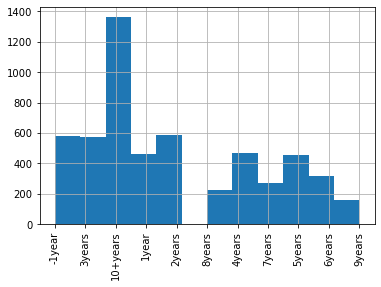

In [36]:
#plot lenght of employment for observations that should have been rejected
train_df_rej.emp_length.hist(xrot=90, bins =12)

Find out what the most loans are being used for

debt_consolidation    2724
other                  626
credit_card            530
small_business         398
home_improvement       345
major_purchase         209
car                    157
medical                110
wedding                 93
moving                  85
educational             65
house                   59
vacation                51
renewable_energy        16
Name: purpose, dtype: int64


<AxesSubplot:>

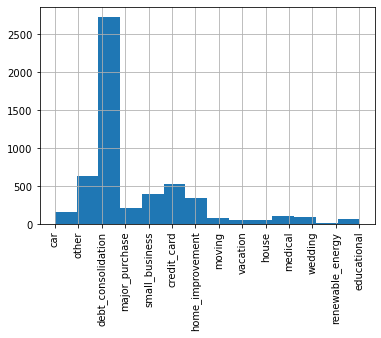

In [37]:
#what are loans that should have been rejected most often used for 
print(train_df_rej.purpose.value_counts())
train_df_rej.purpose.hist(xrot=90, bins=14)

Find out how many bankruptcies people have. Very few have one and even fewer had 2

In [38]:
#do loans that should have been rejected have more public records
train_df_rej.pub_rec_bankruptcies.value_counts()

0.0    5090
1.0     376
2.0       2
Name: pub_rec_bankruptcies, dtype: int64

And now a look to our not rejected group¶


In [39]:
train_df_norej = train_df[train_df['classification']==0]

<AxesSubplot:>

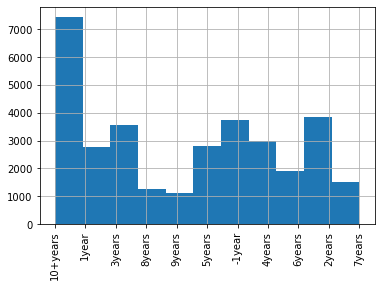

In [40]:
train_df_norej.emp_length.hist(xrot=90, bins=11)

<AxesSubplot:>

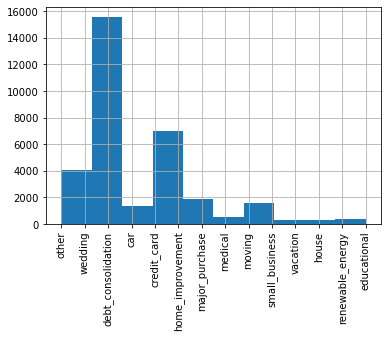

In [41]:
train_df_norej.purpose.hist(xrot=90)

### Plot classification vs. other features in boxplots
We decided to plot the graphs with 900dpi so that they can be used in presentations and ohter material. 

Interesting Results:

  * loan amount seems to be a little higher on avg for defaults
  * term seems to be on avg longer for defaults
  * installments are on avg. little higher for defaults
  * debt/income ratio little higher for defaults
  * revolving utilities are higher for defaults
  * total payments are much lower for defaults
  

/Users/leo/anaconda3/envs/nf/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


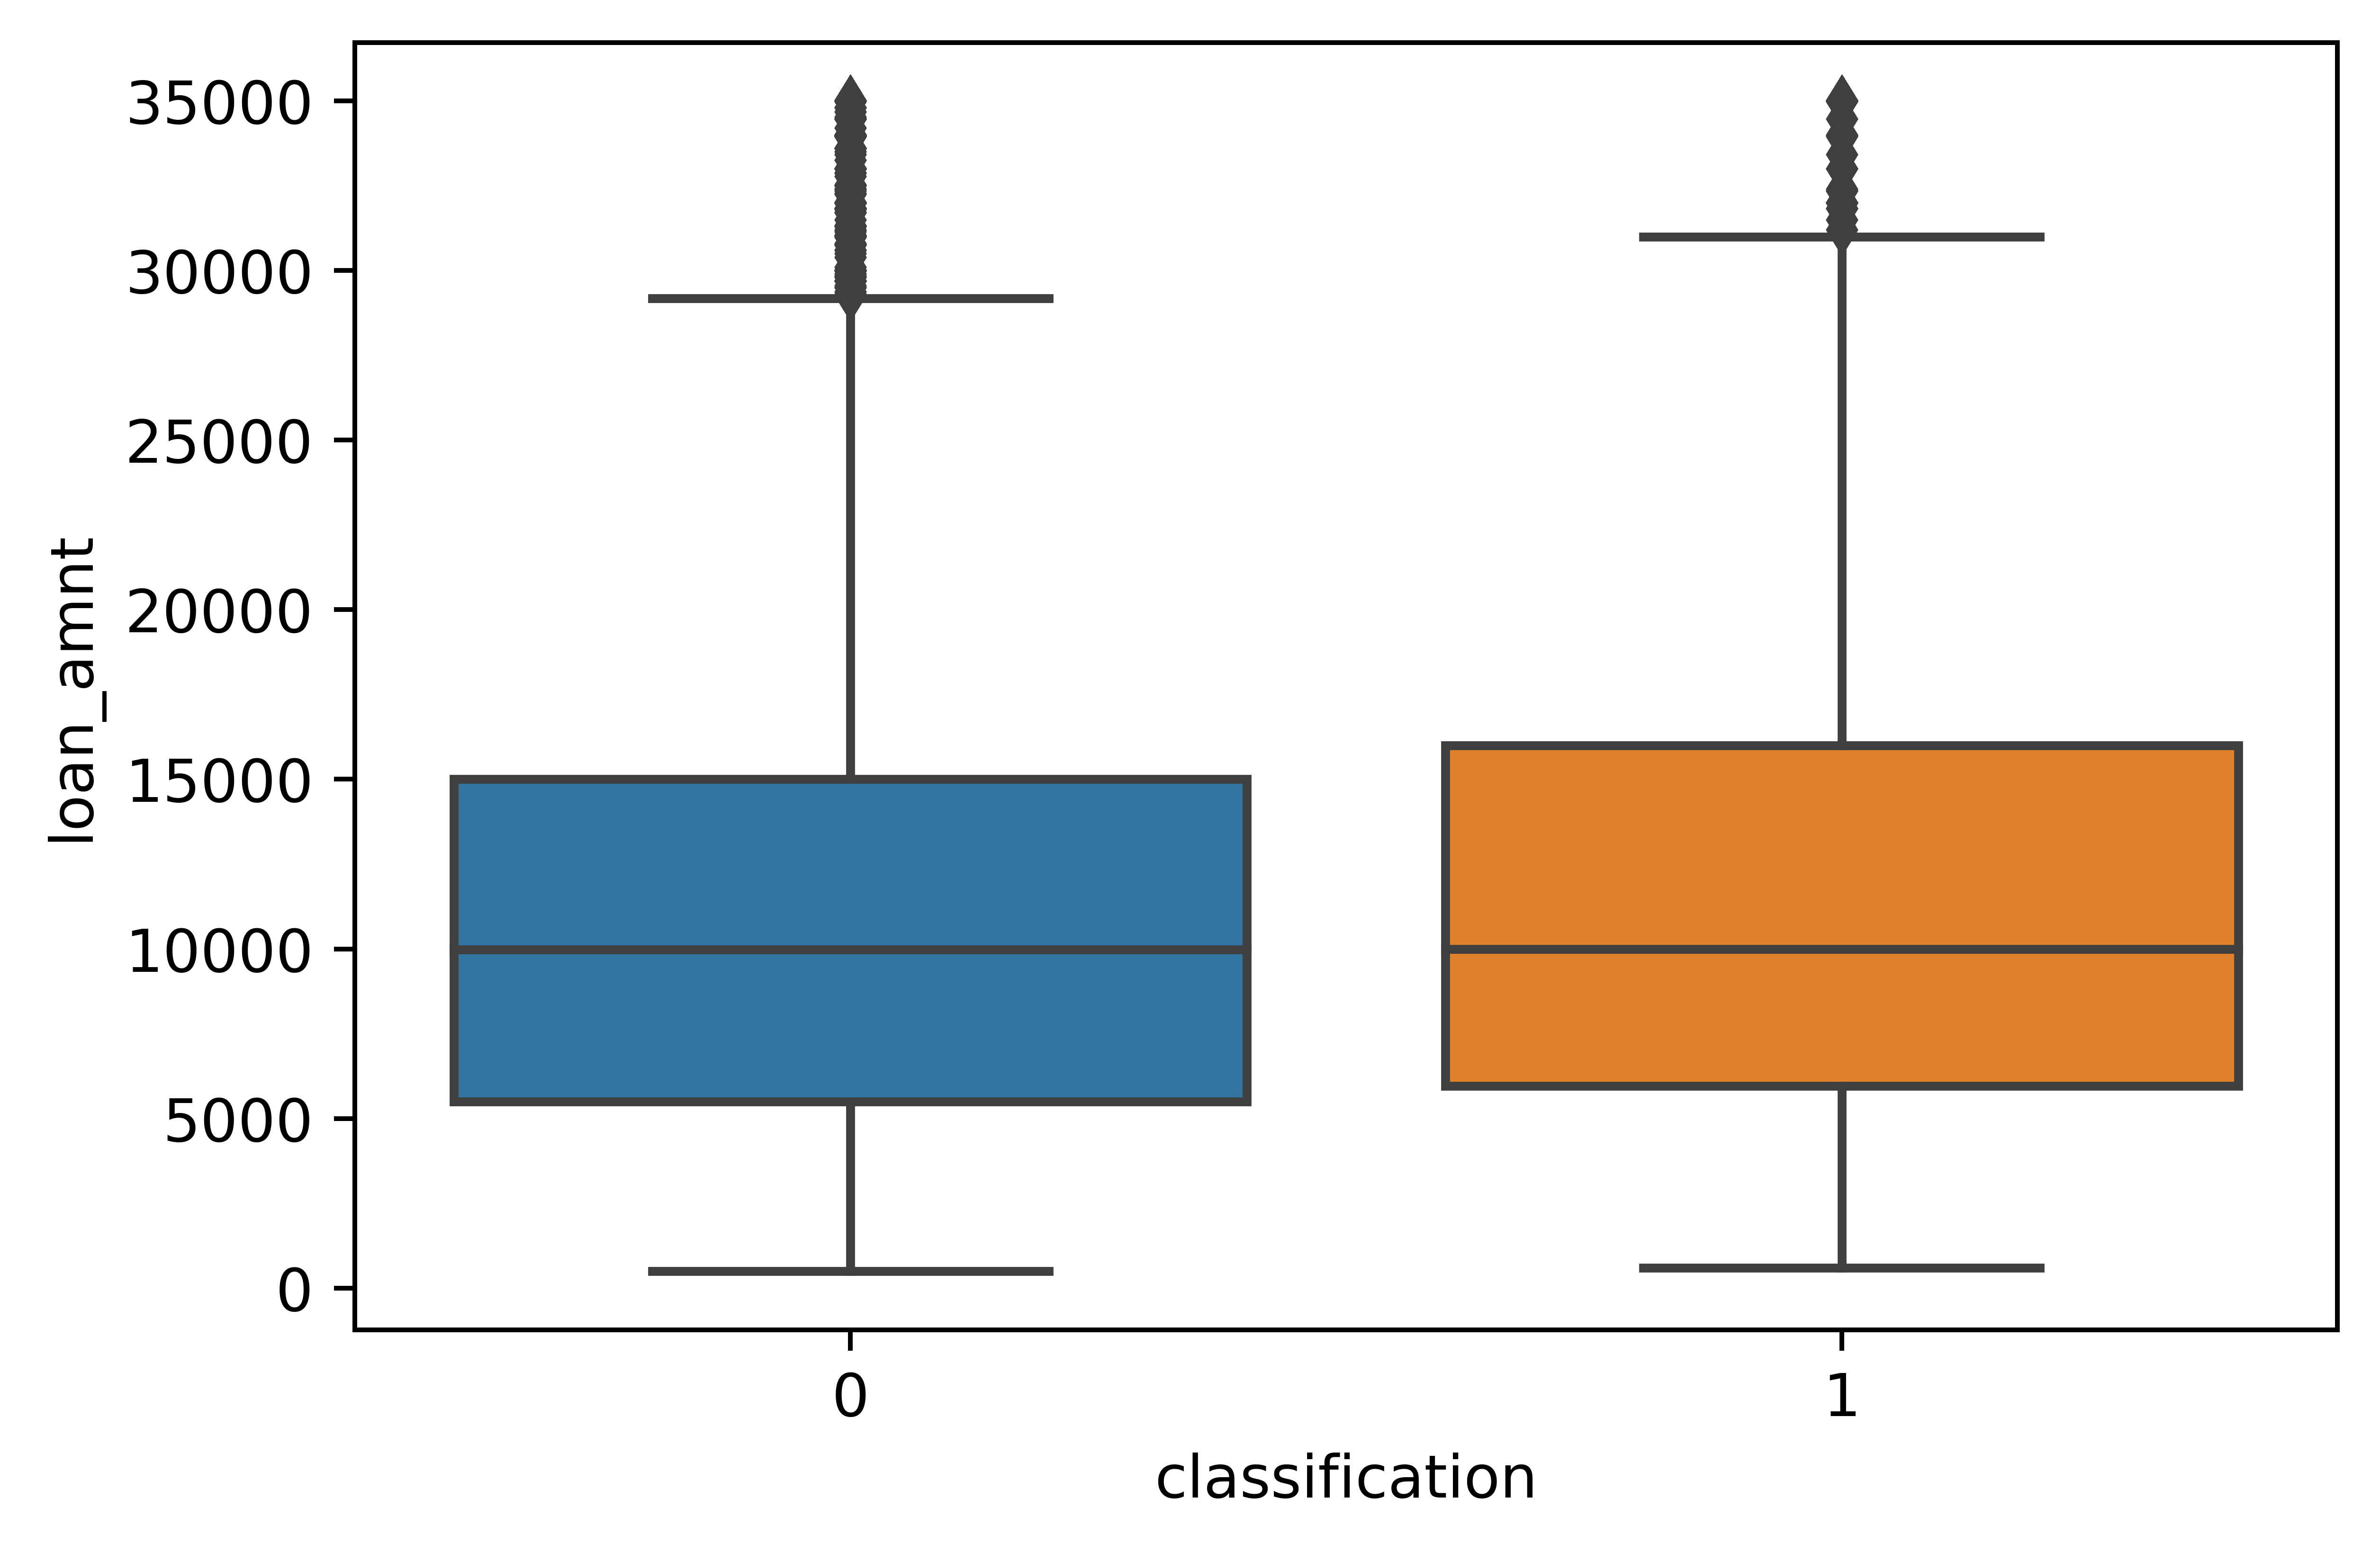

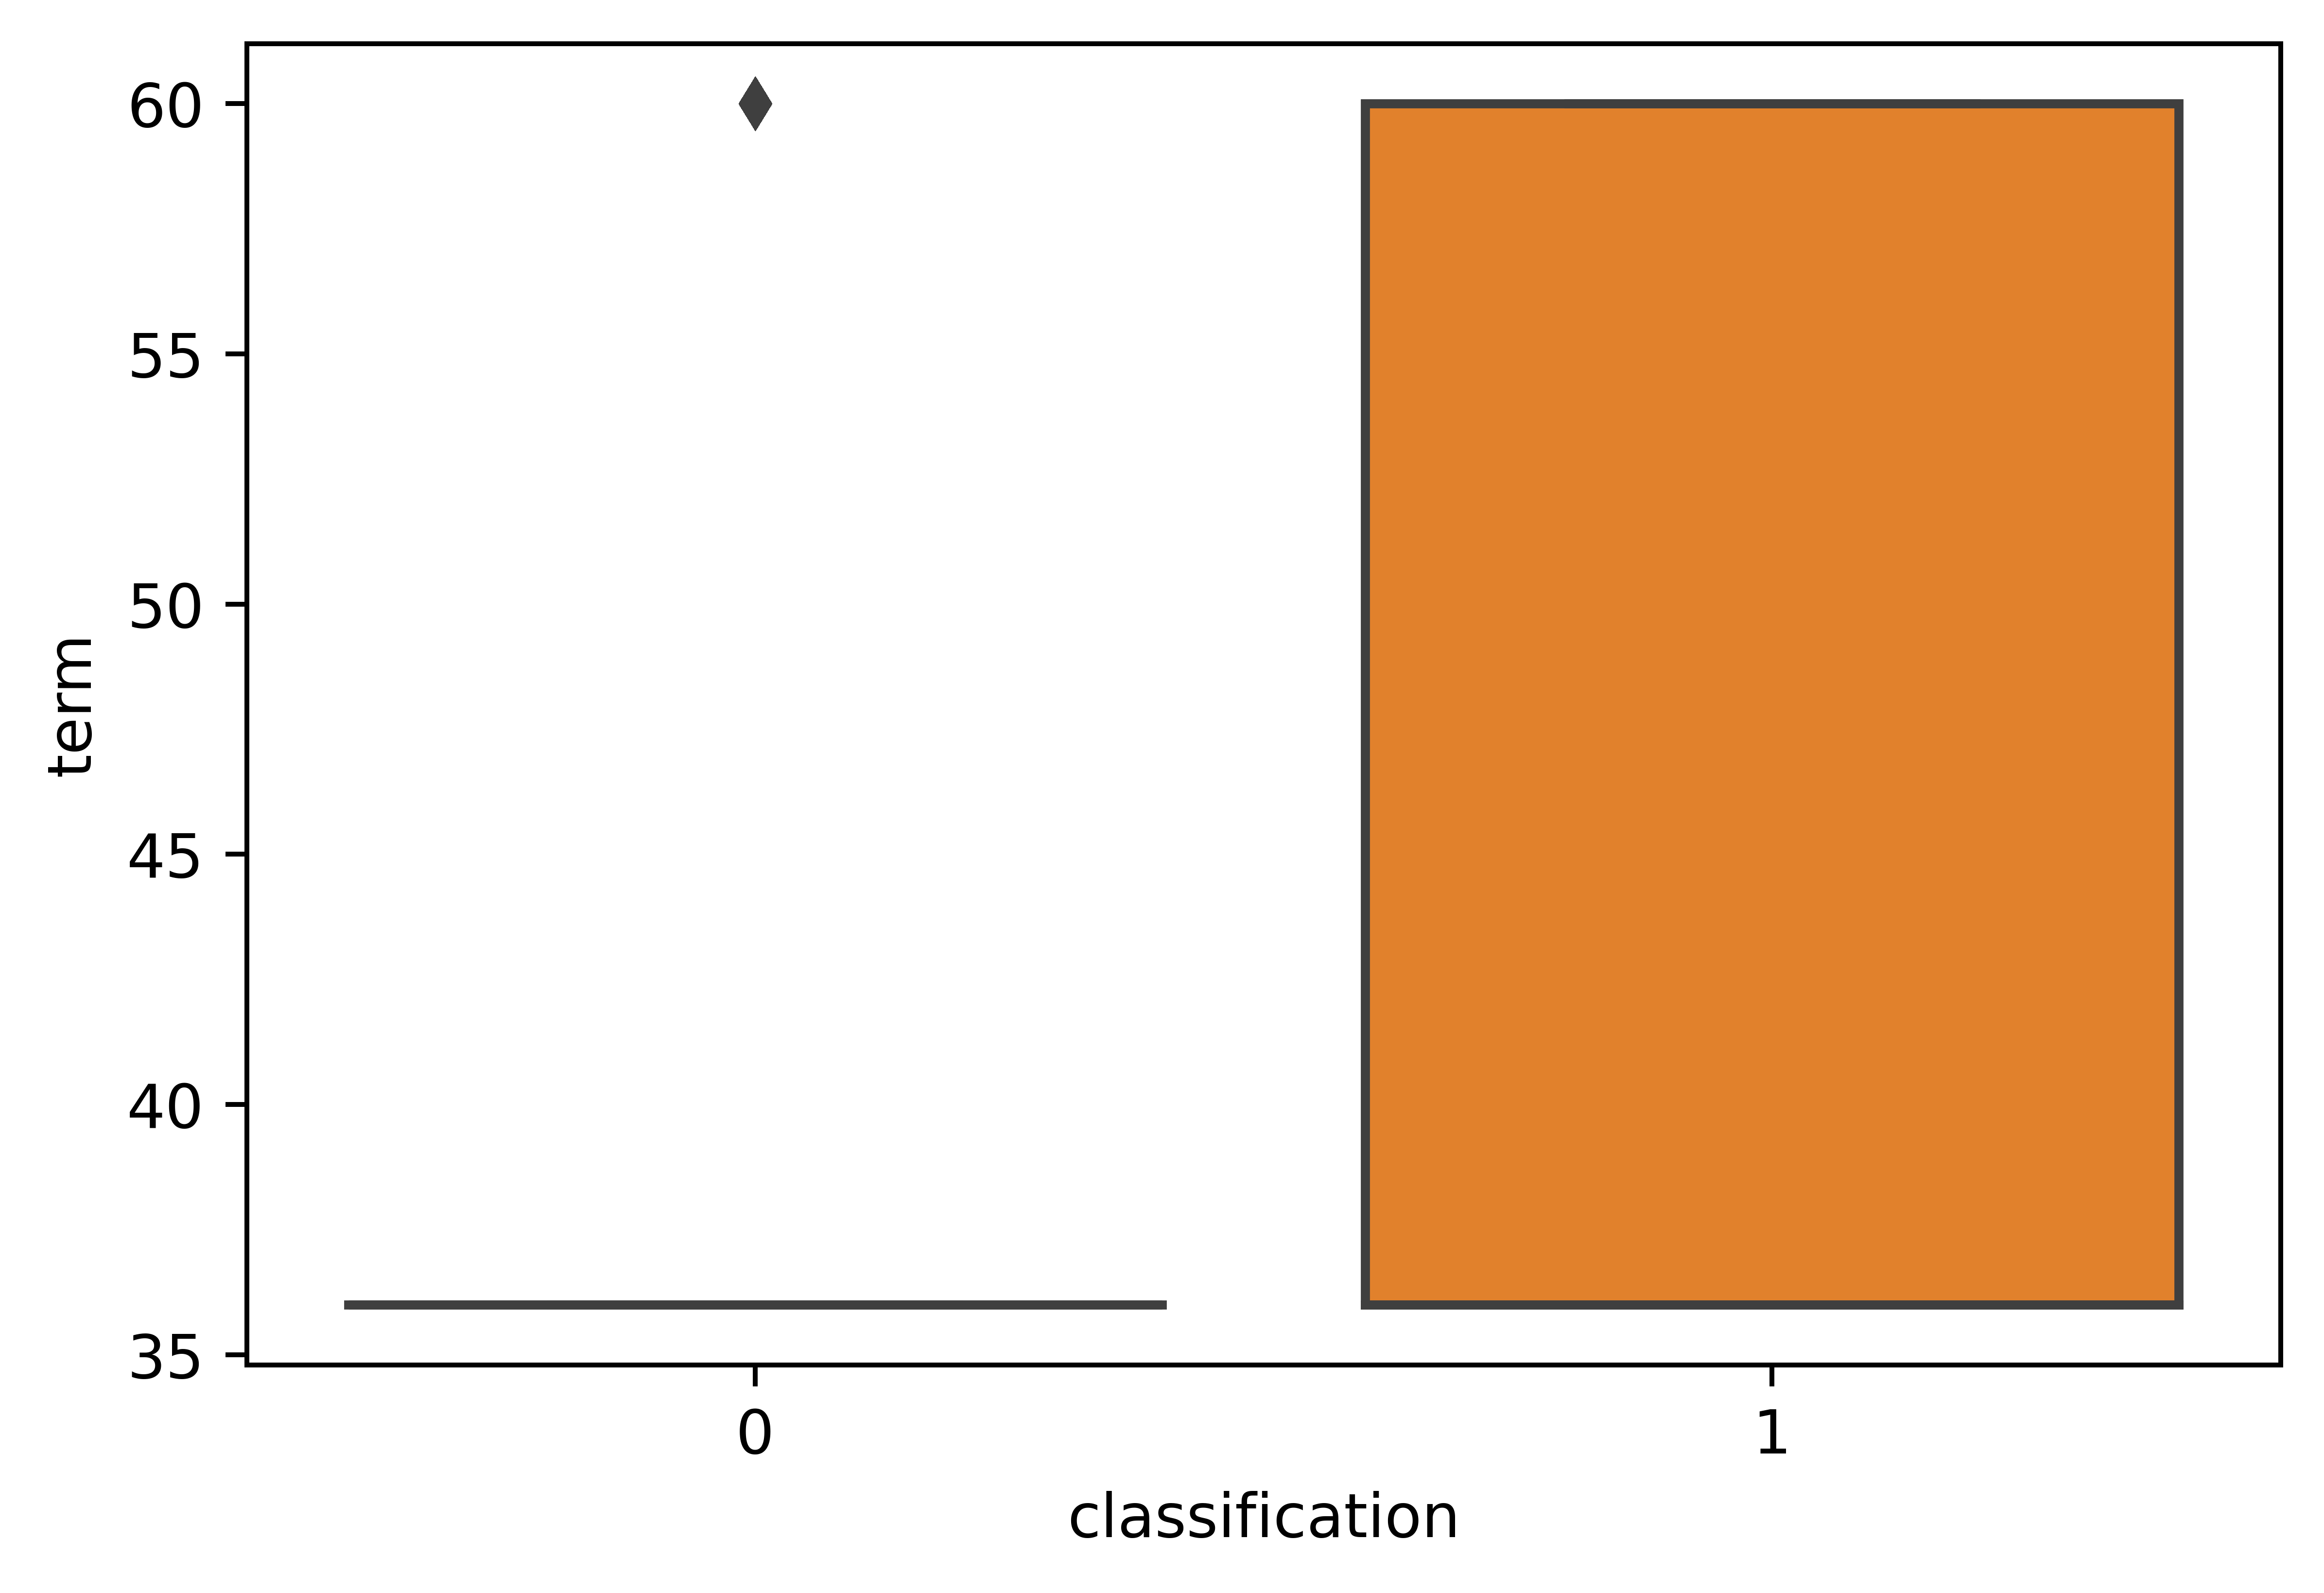

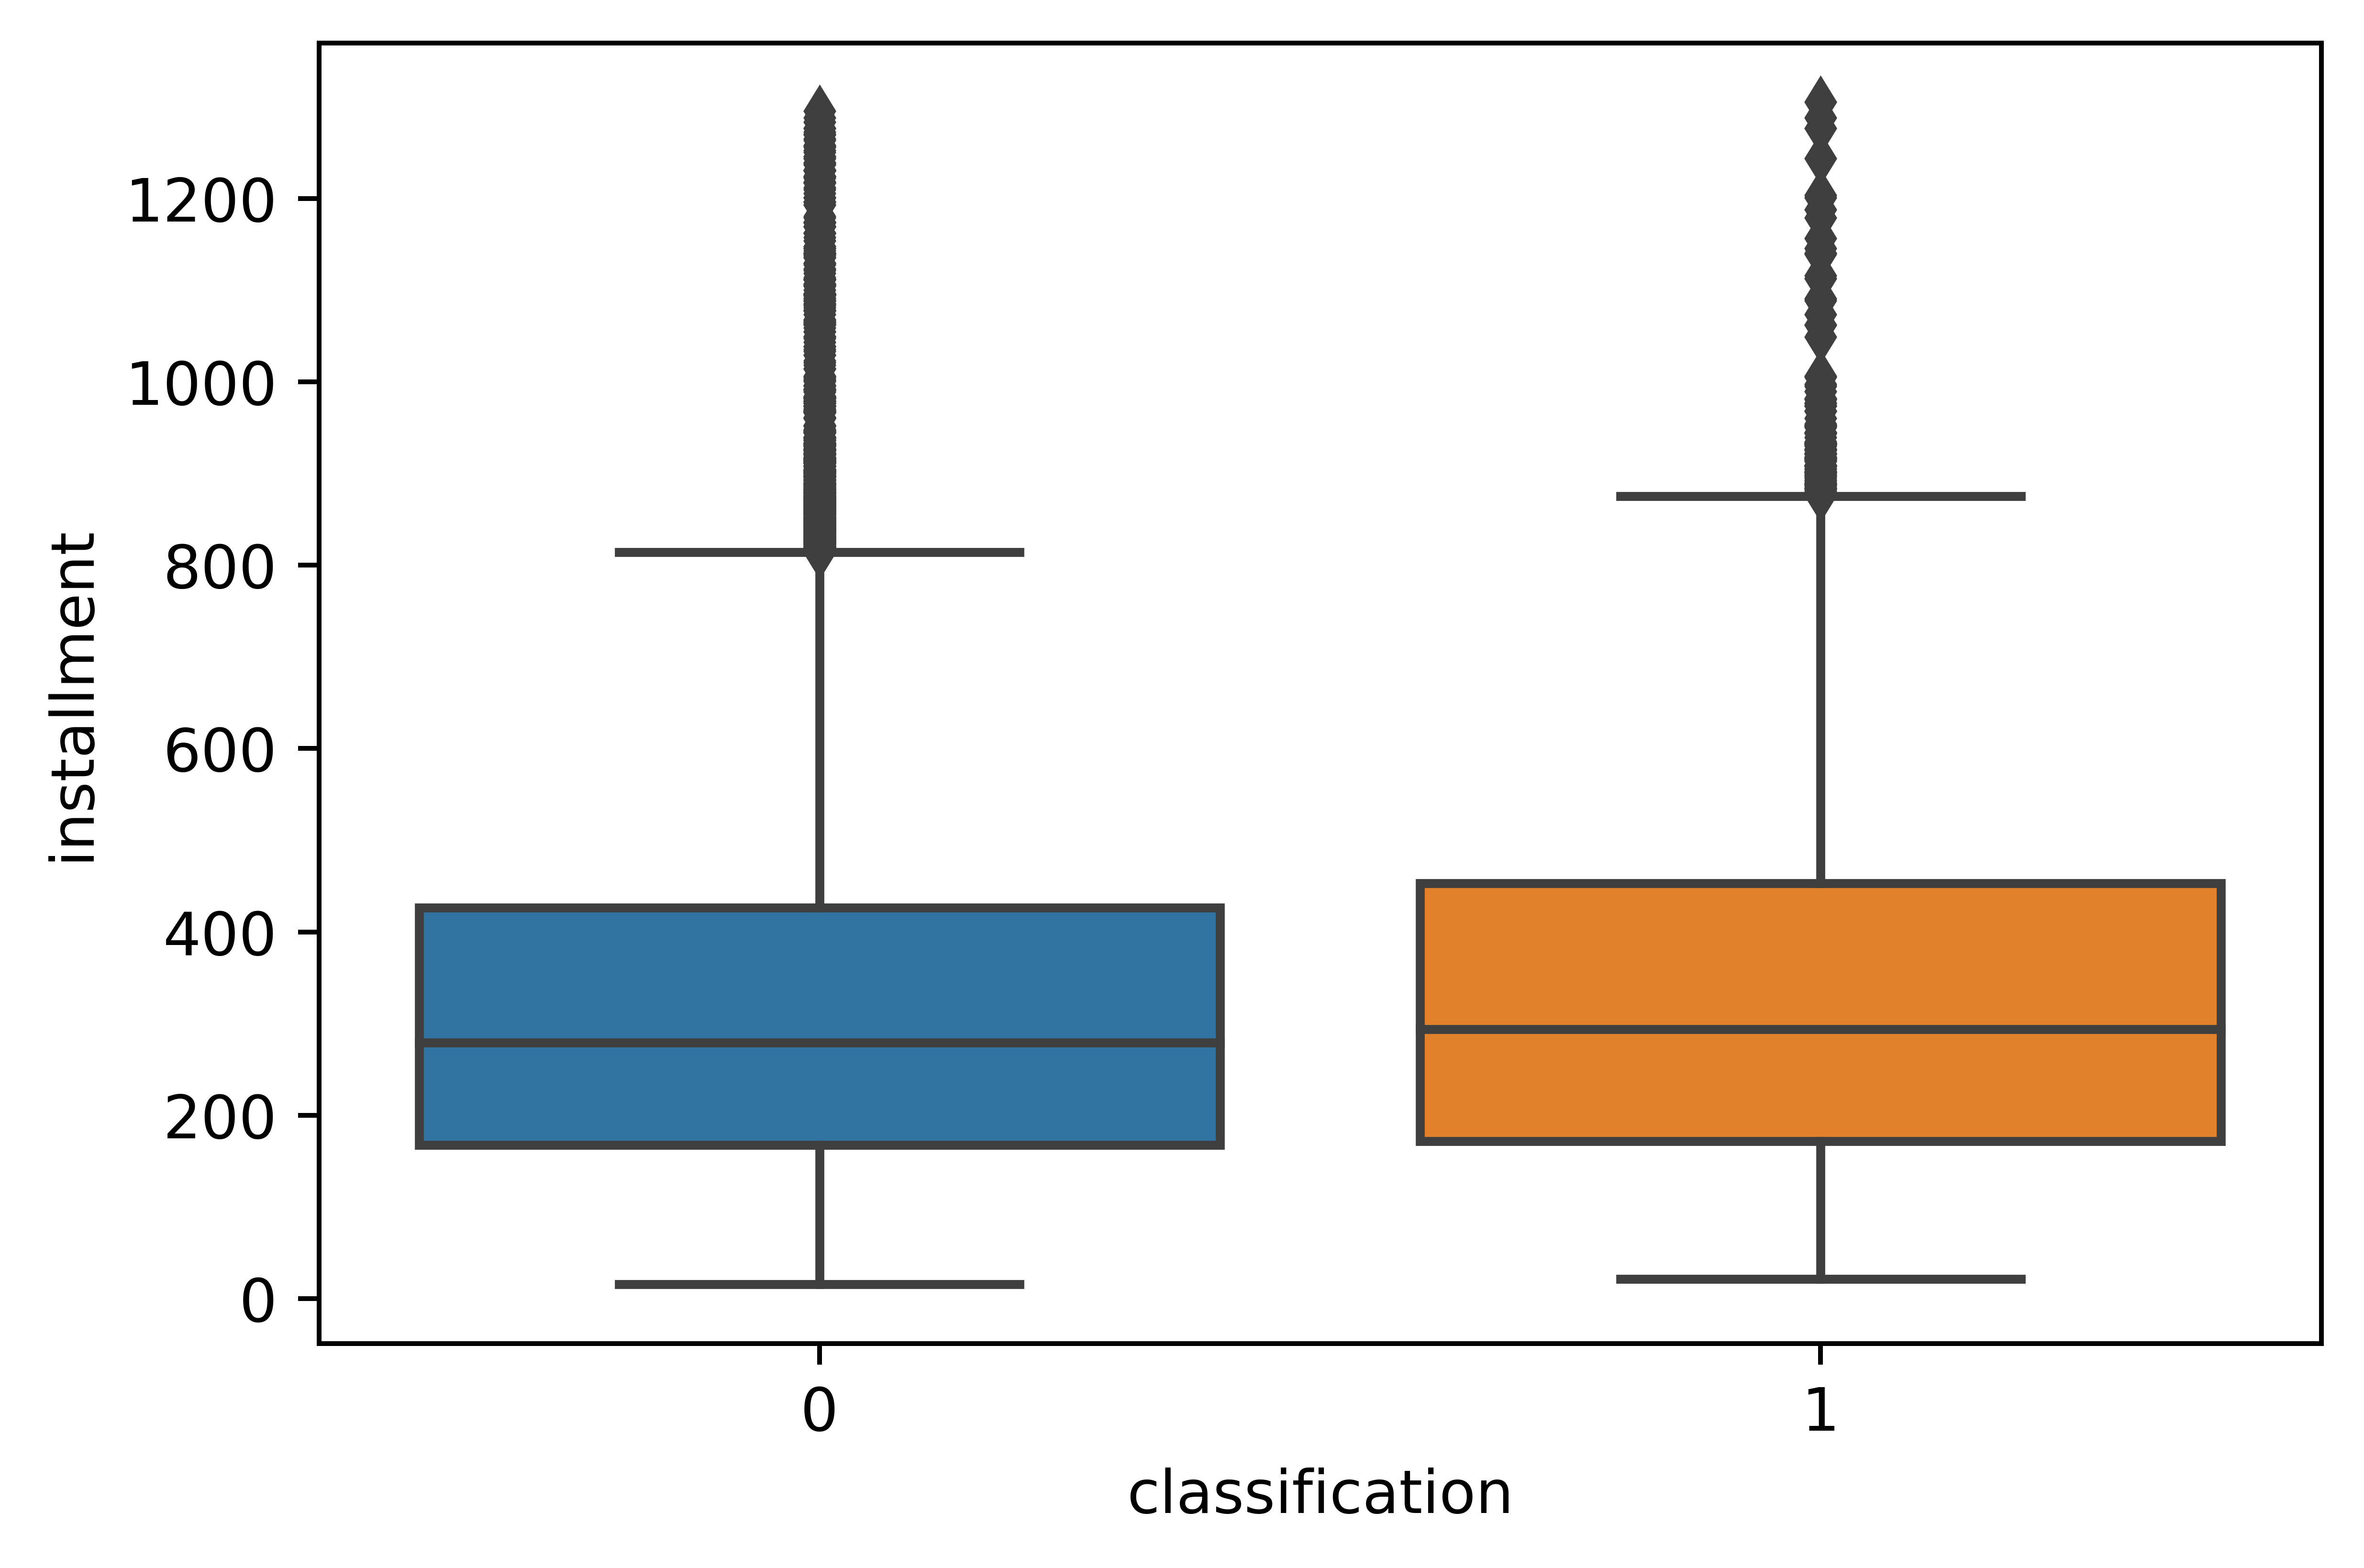

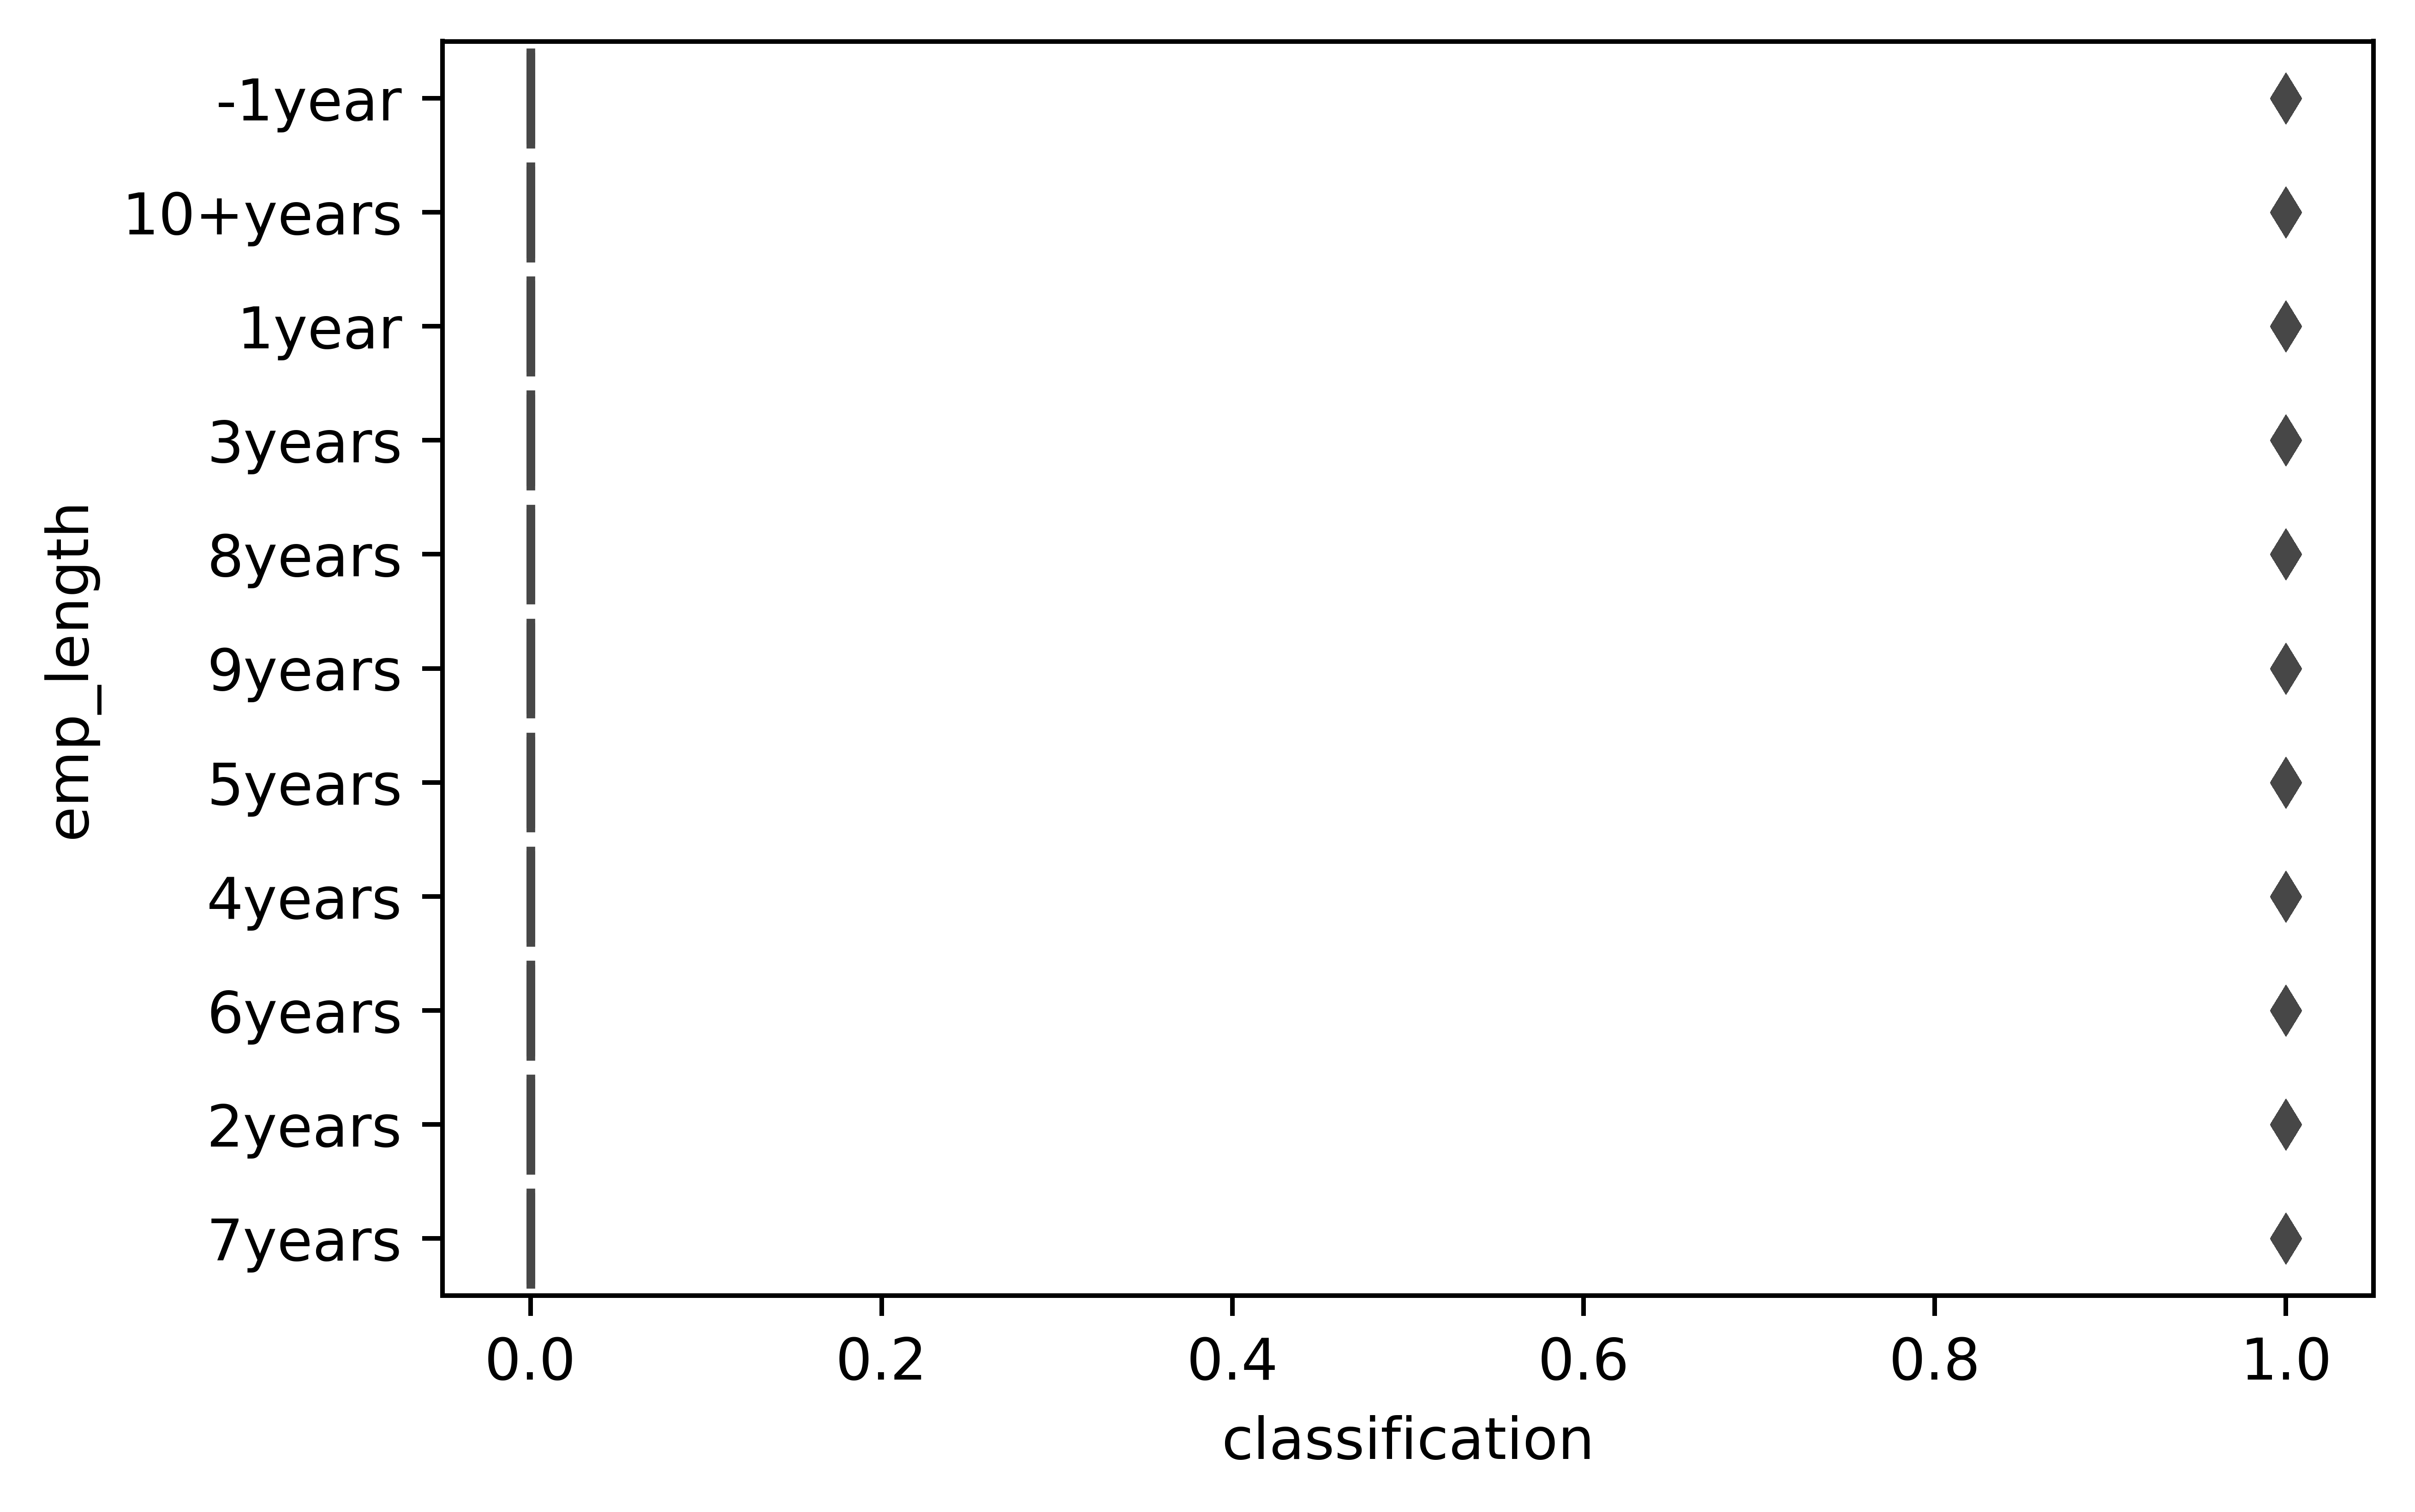

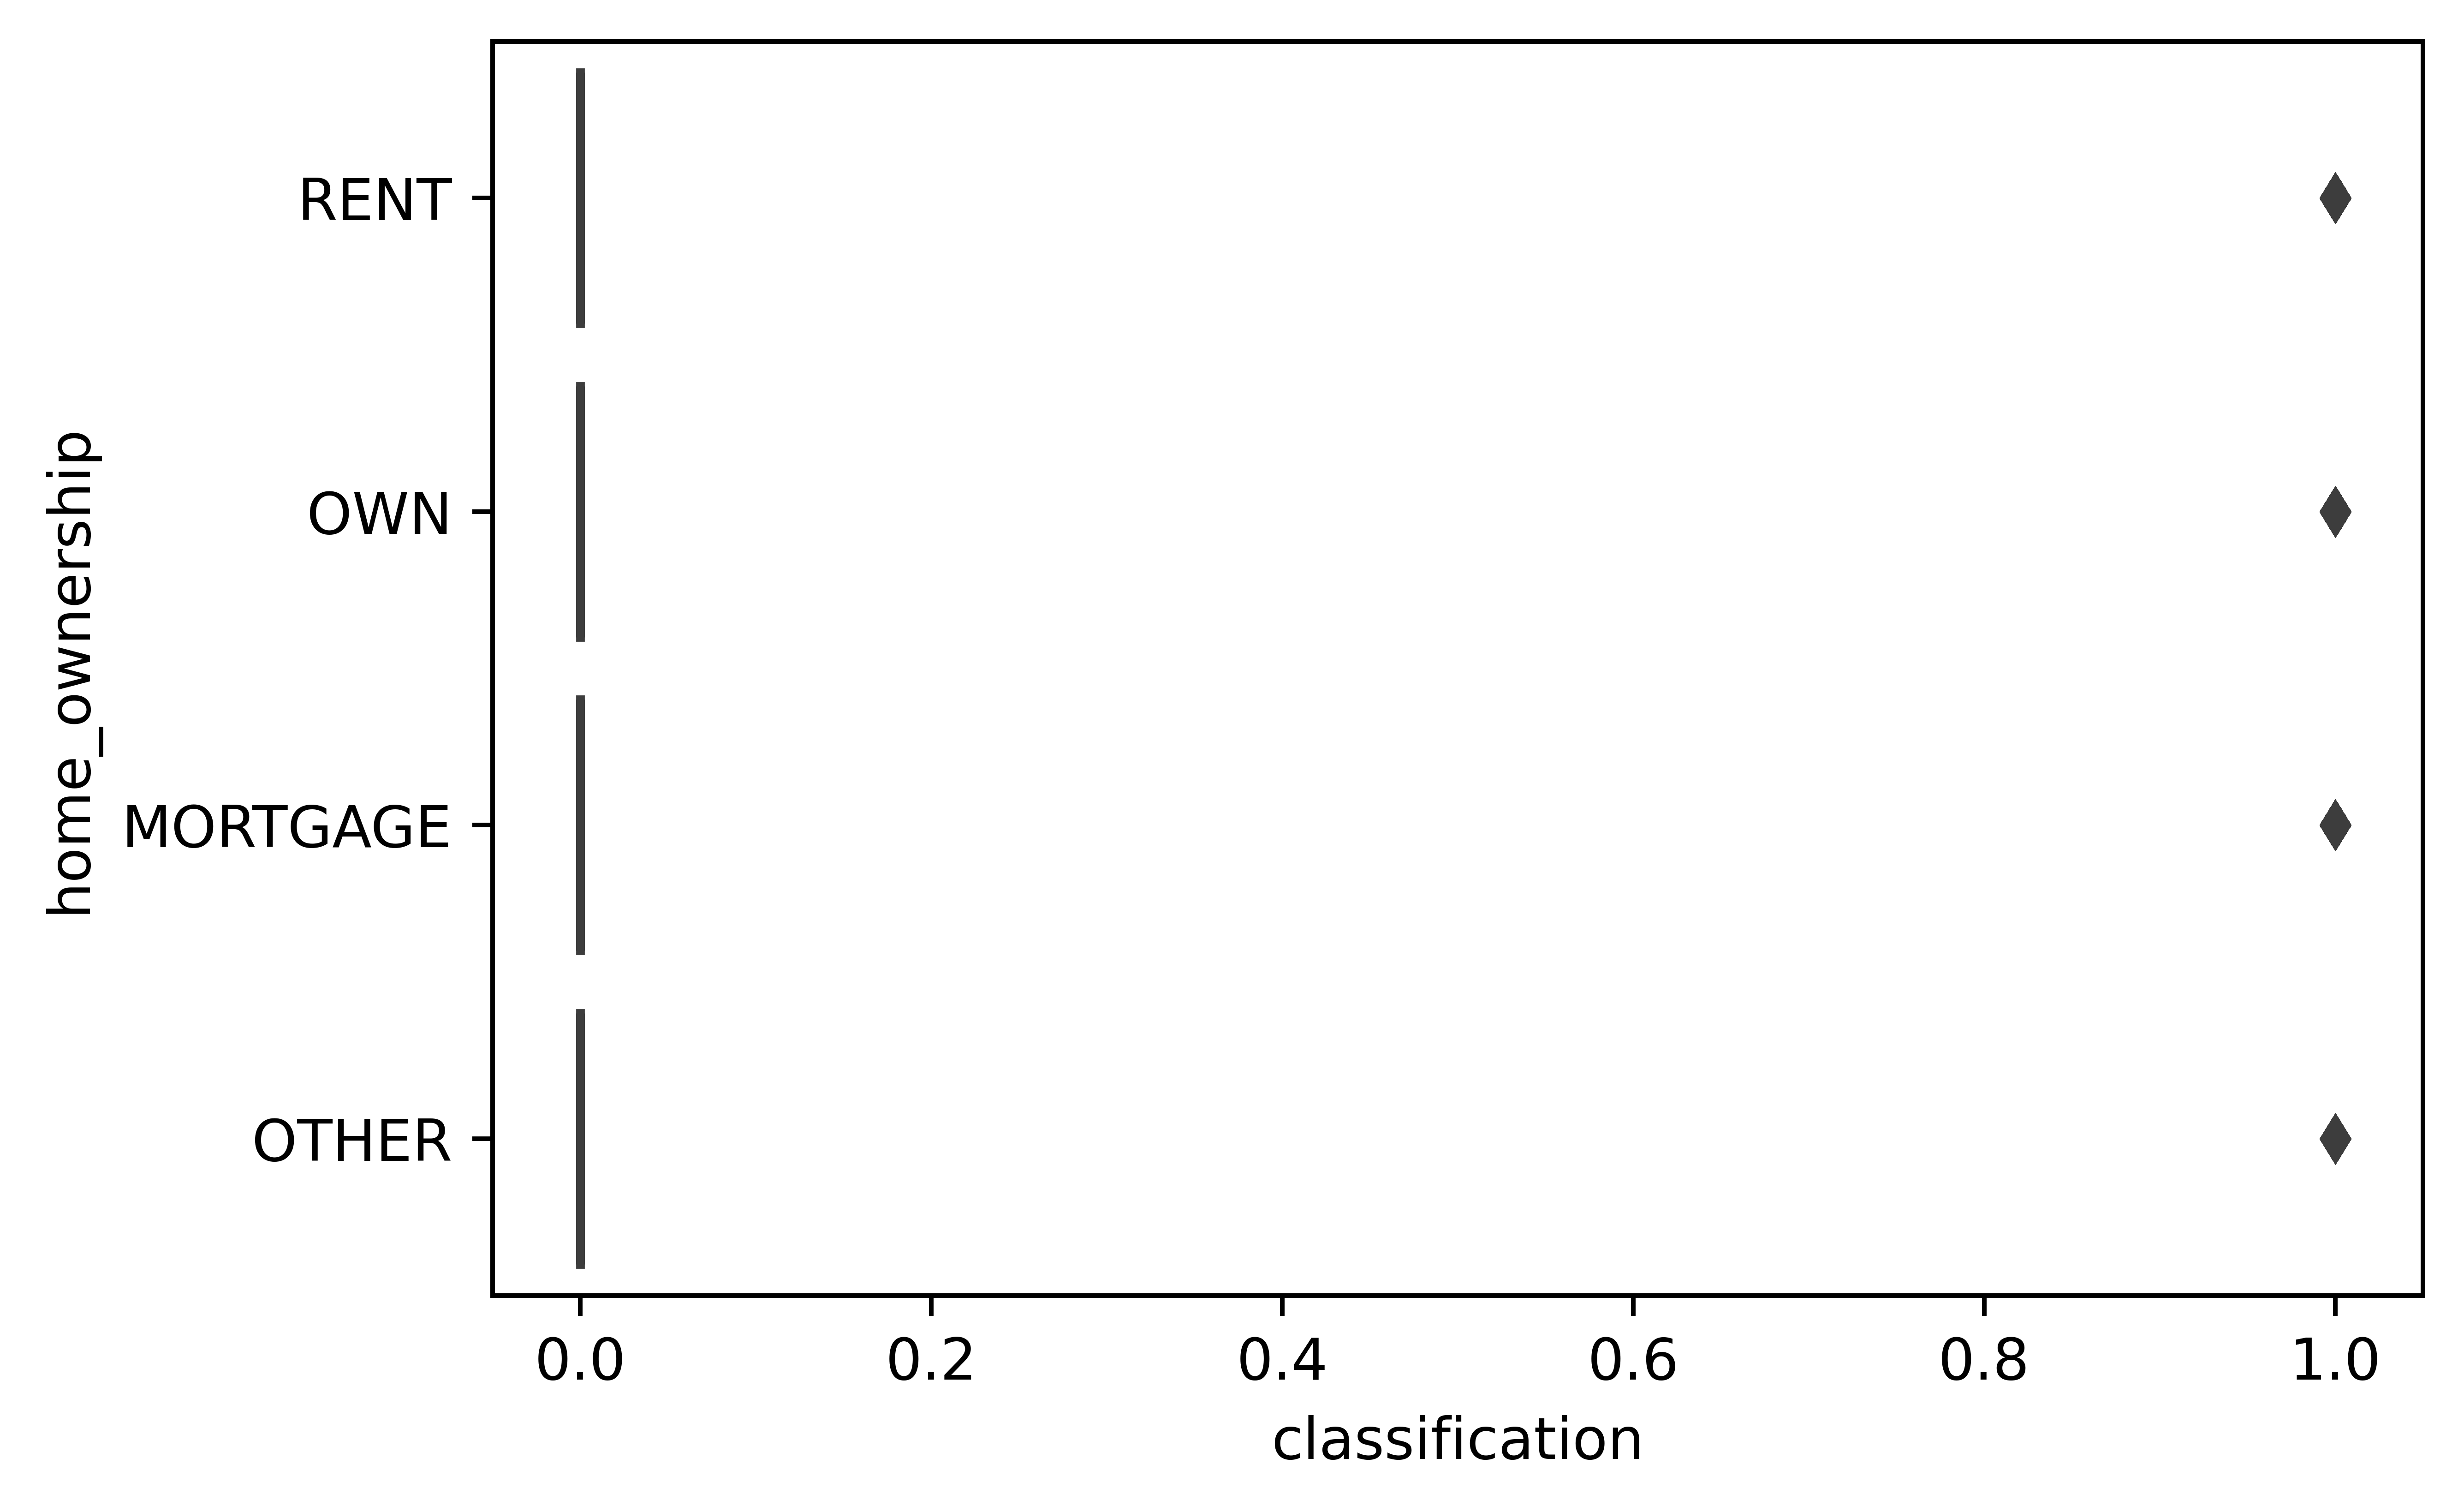

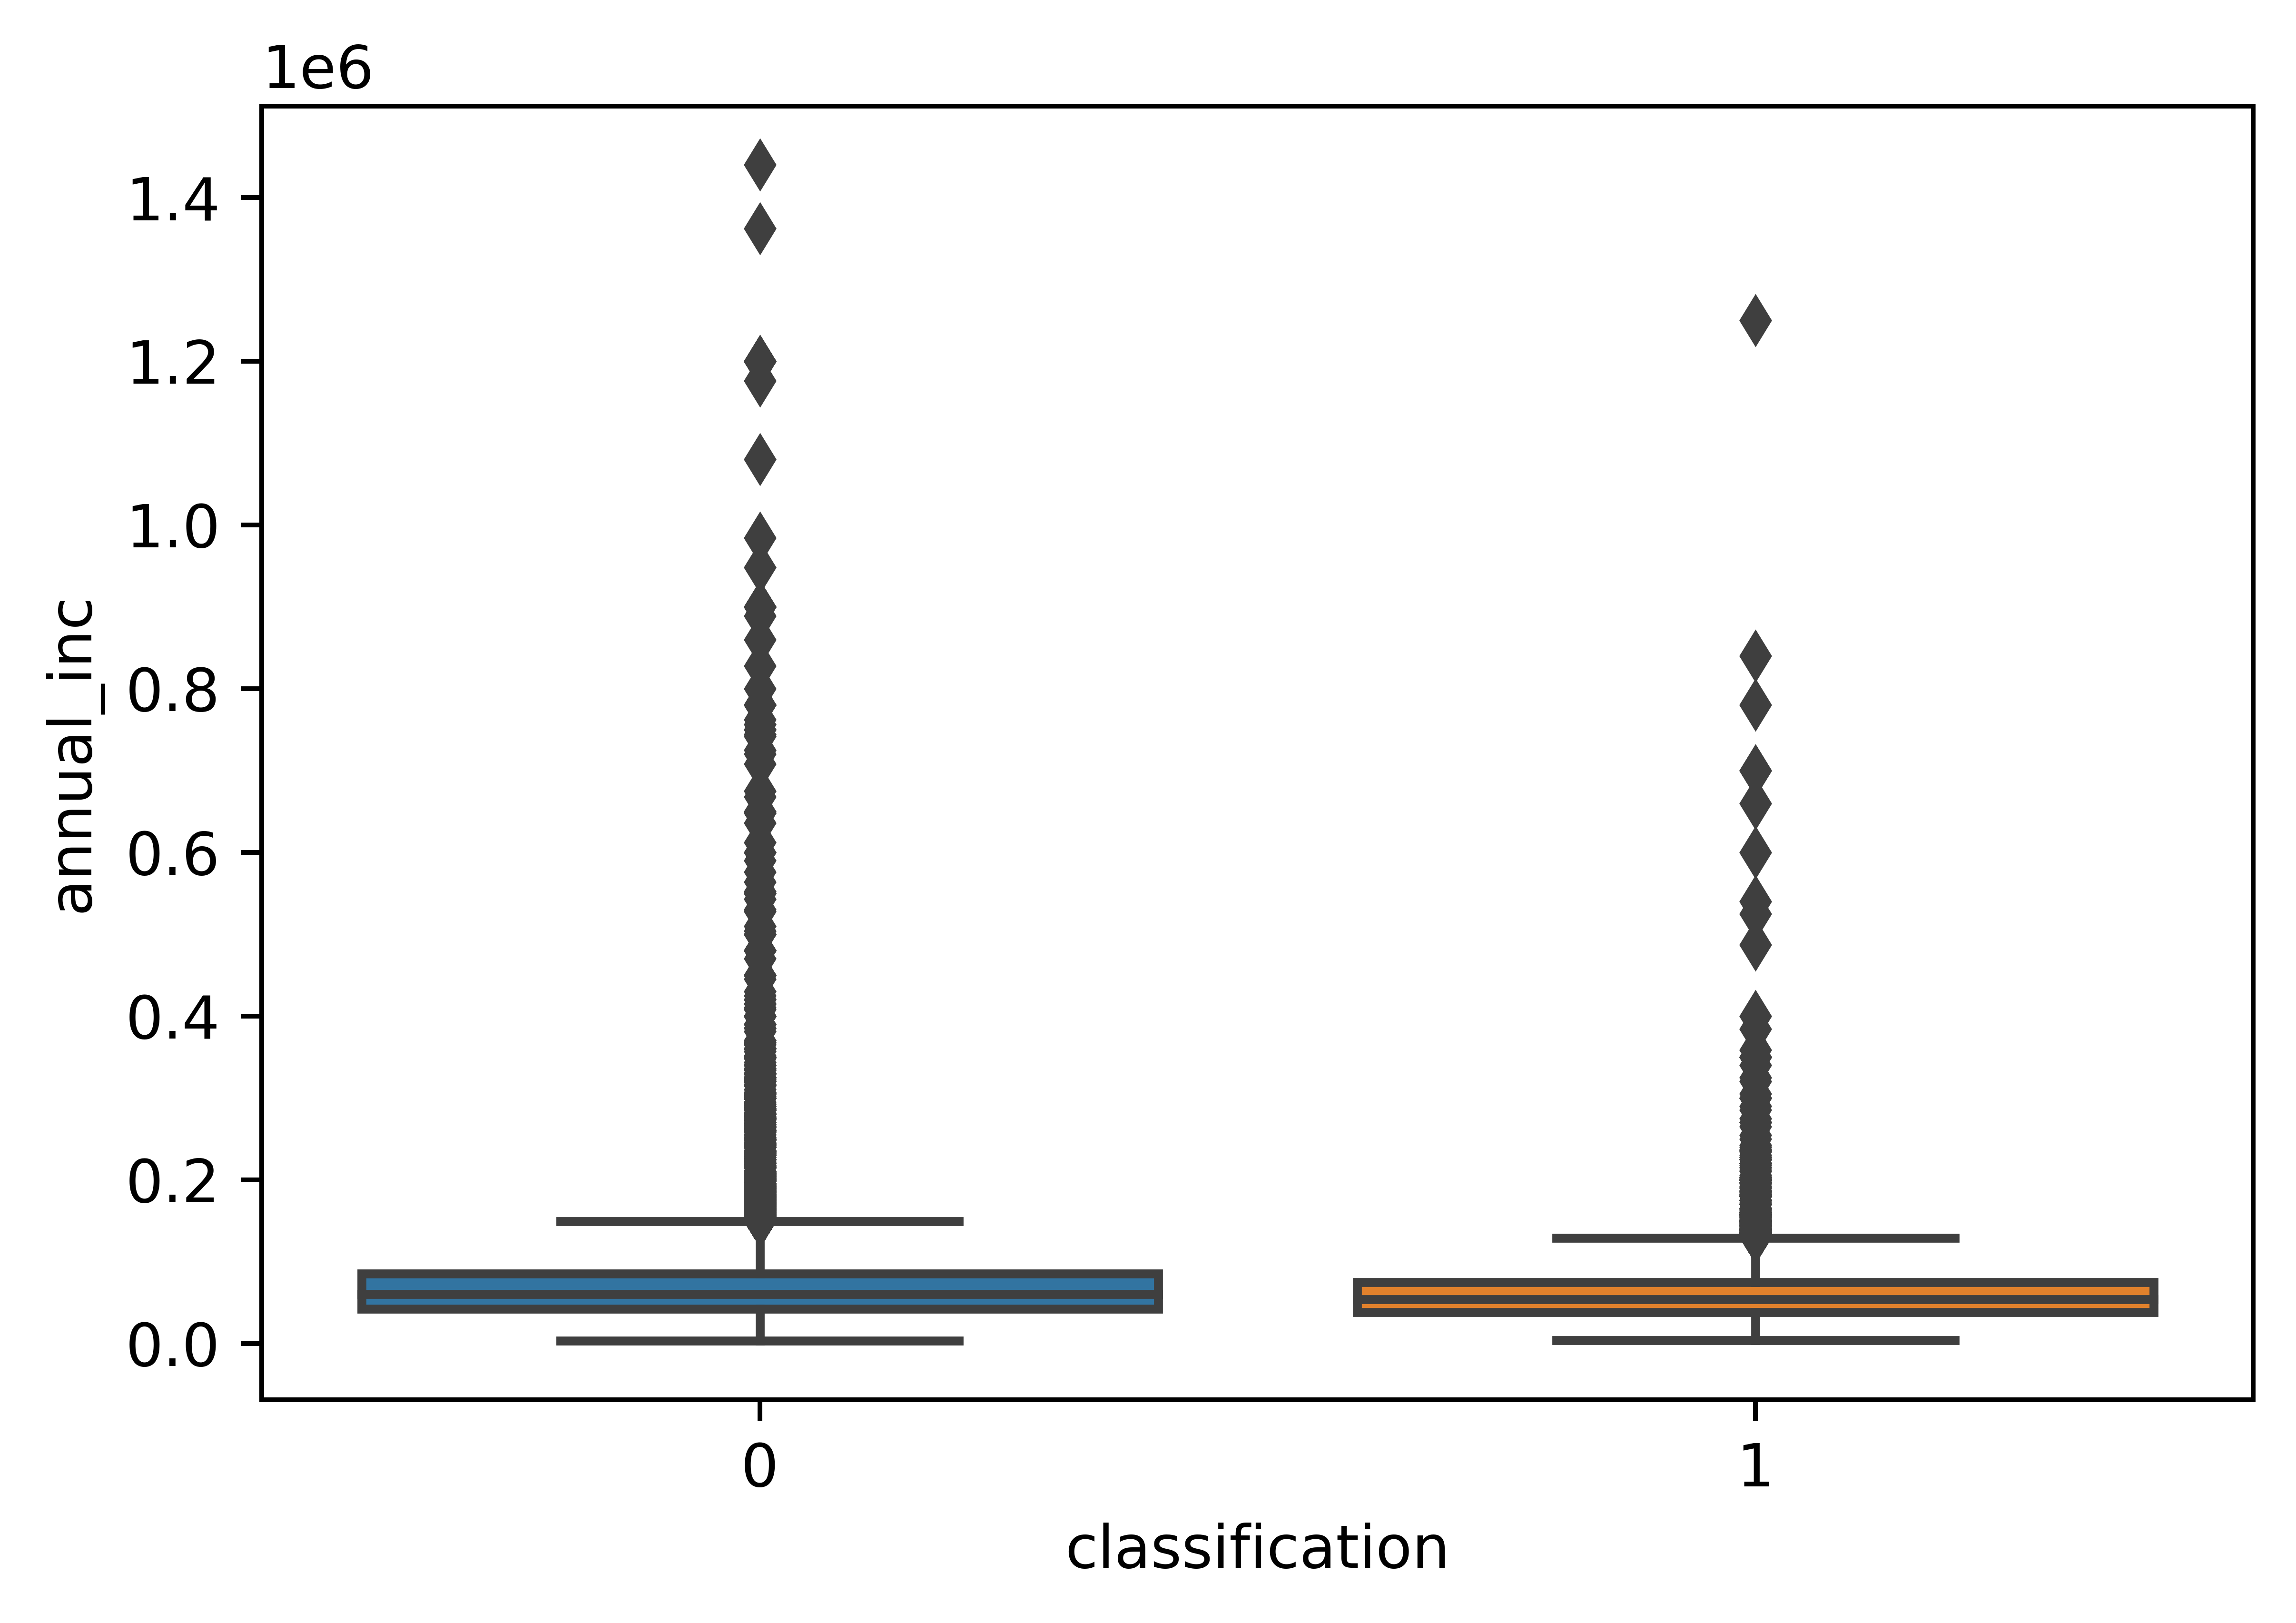

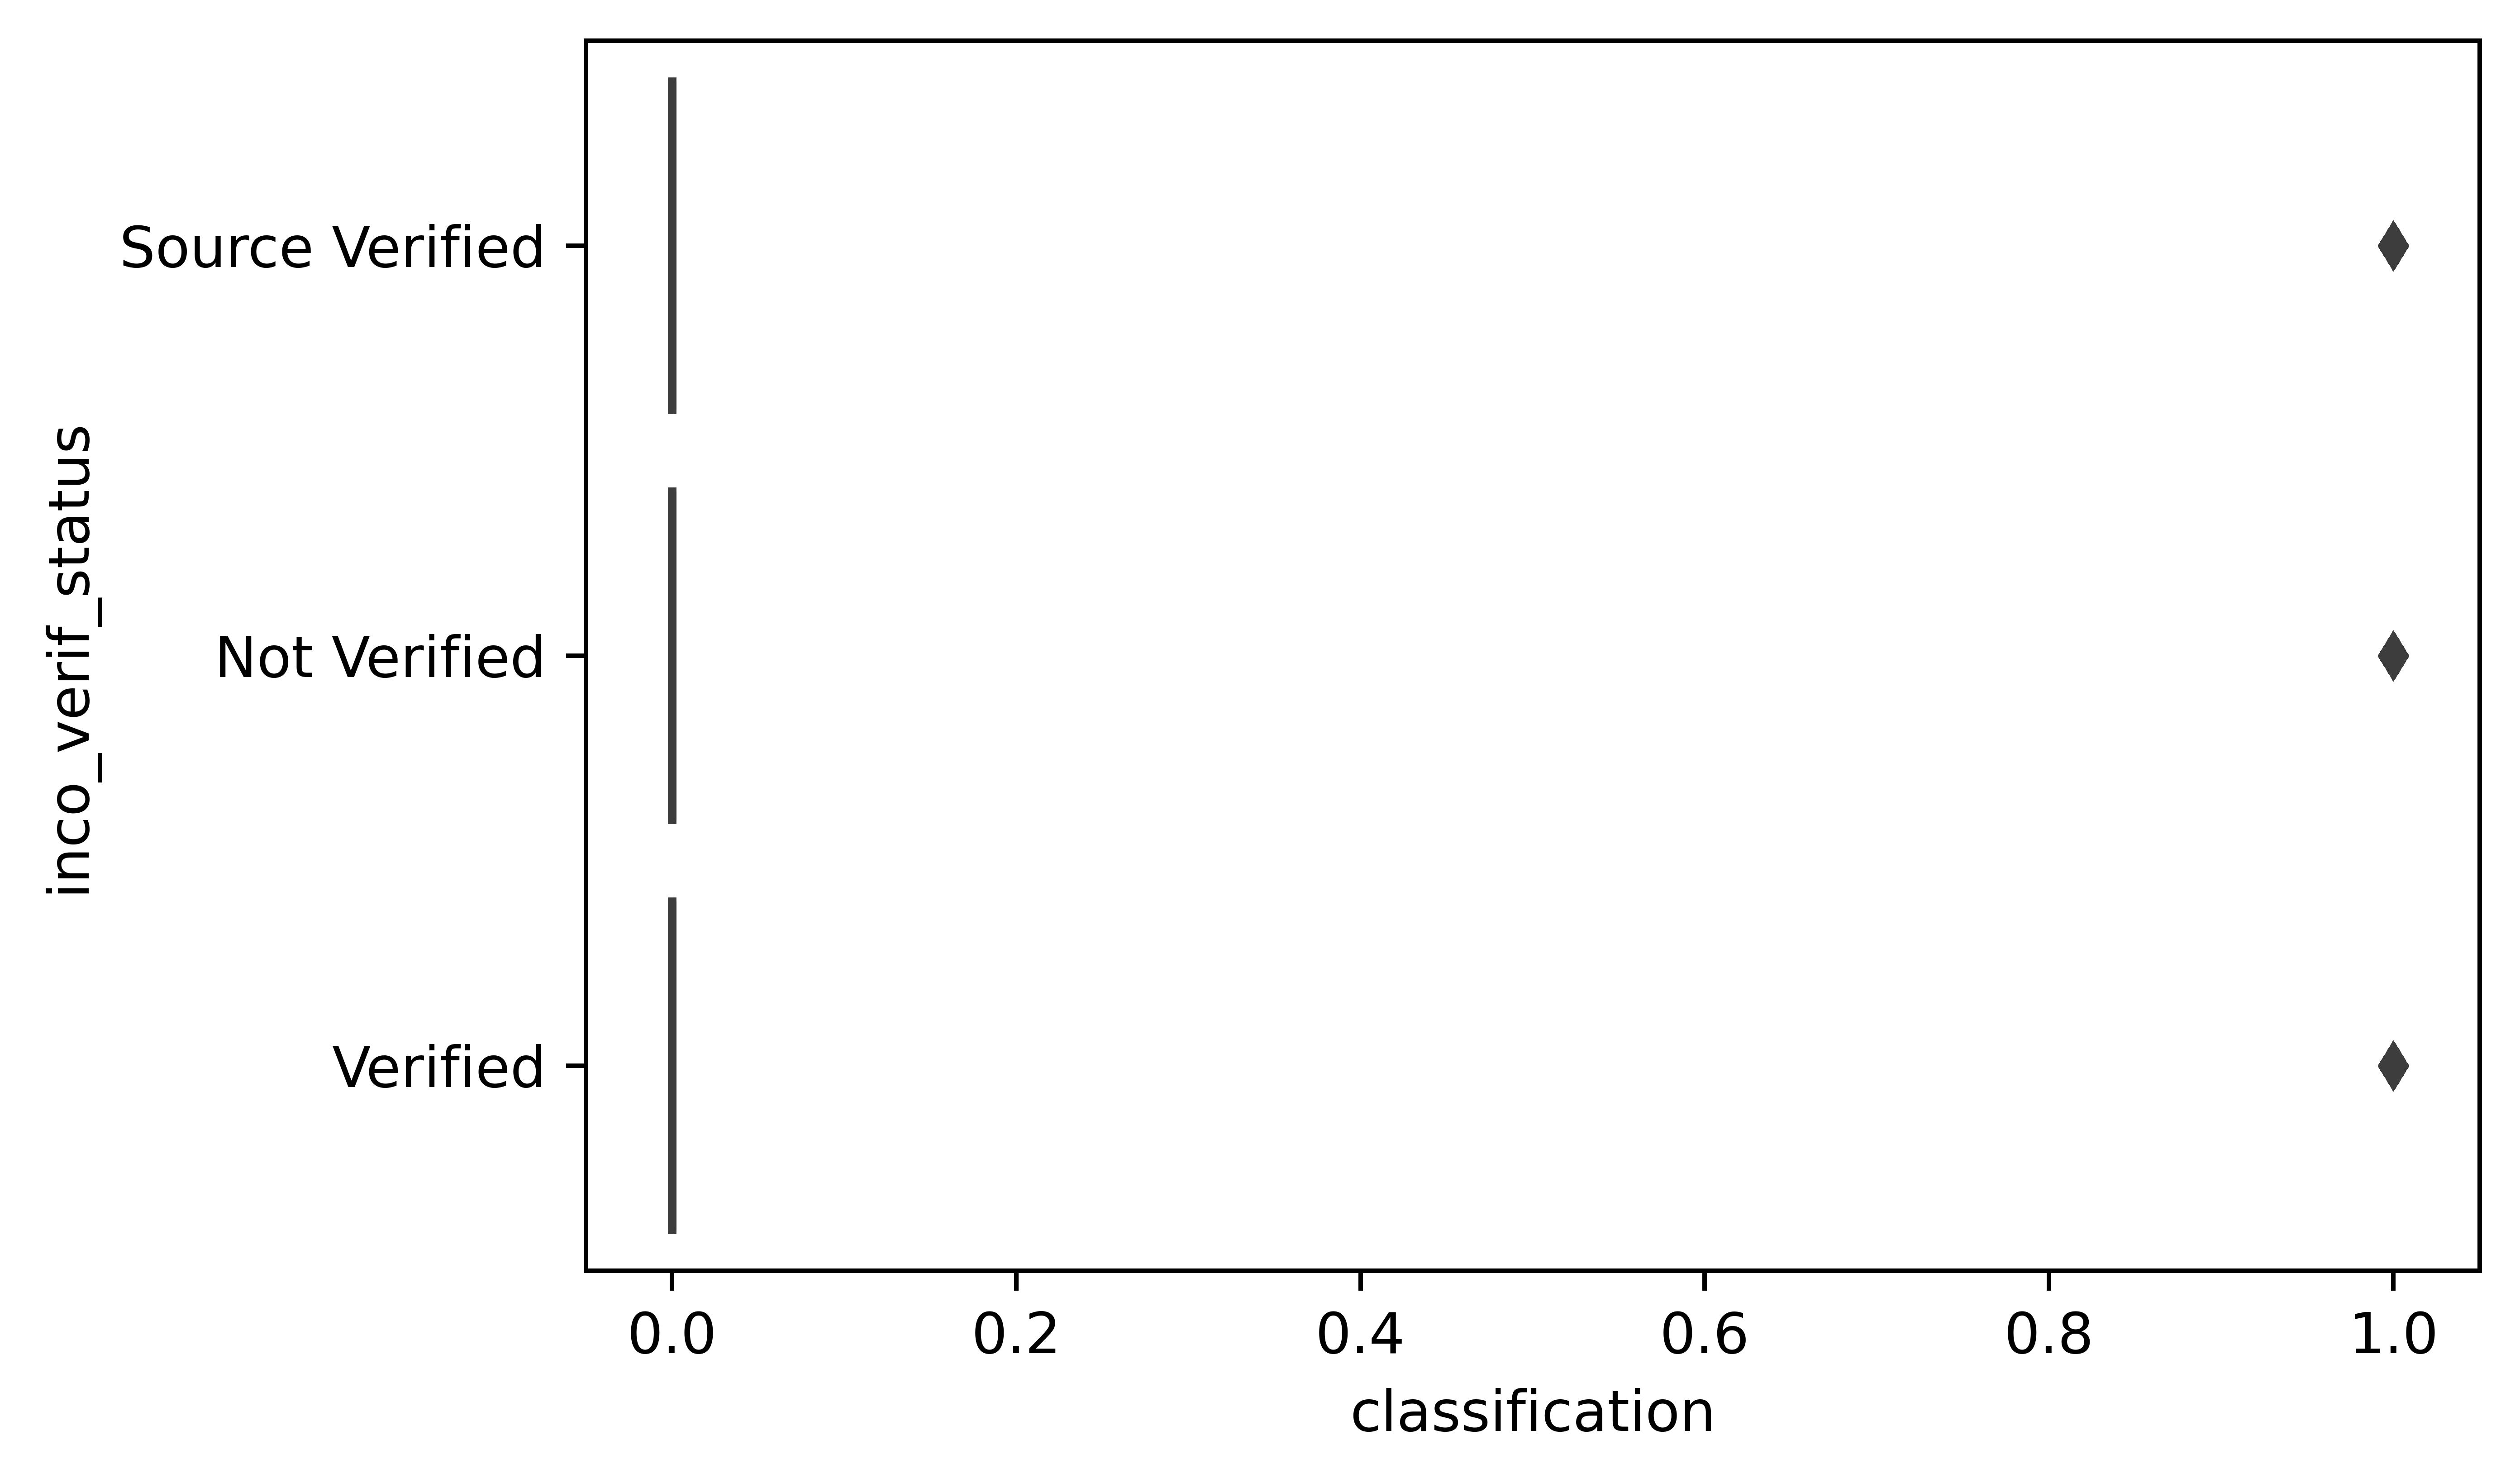

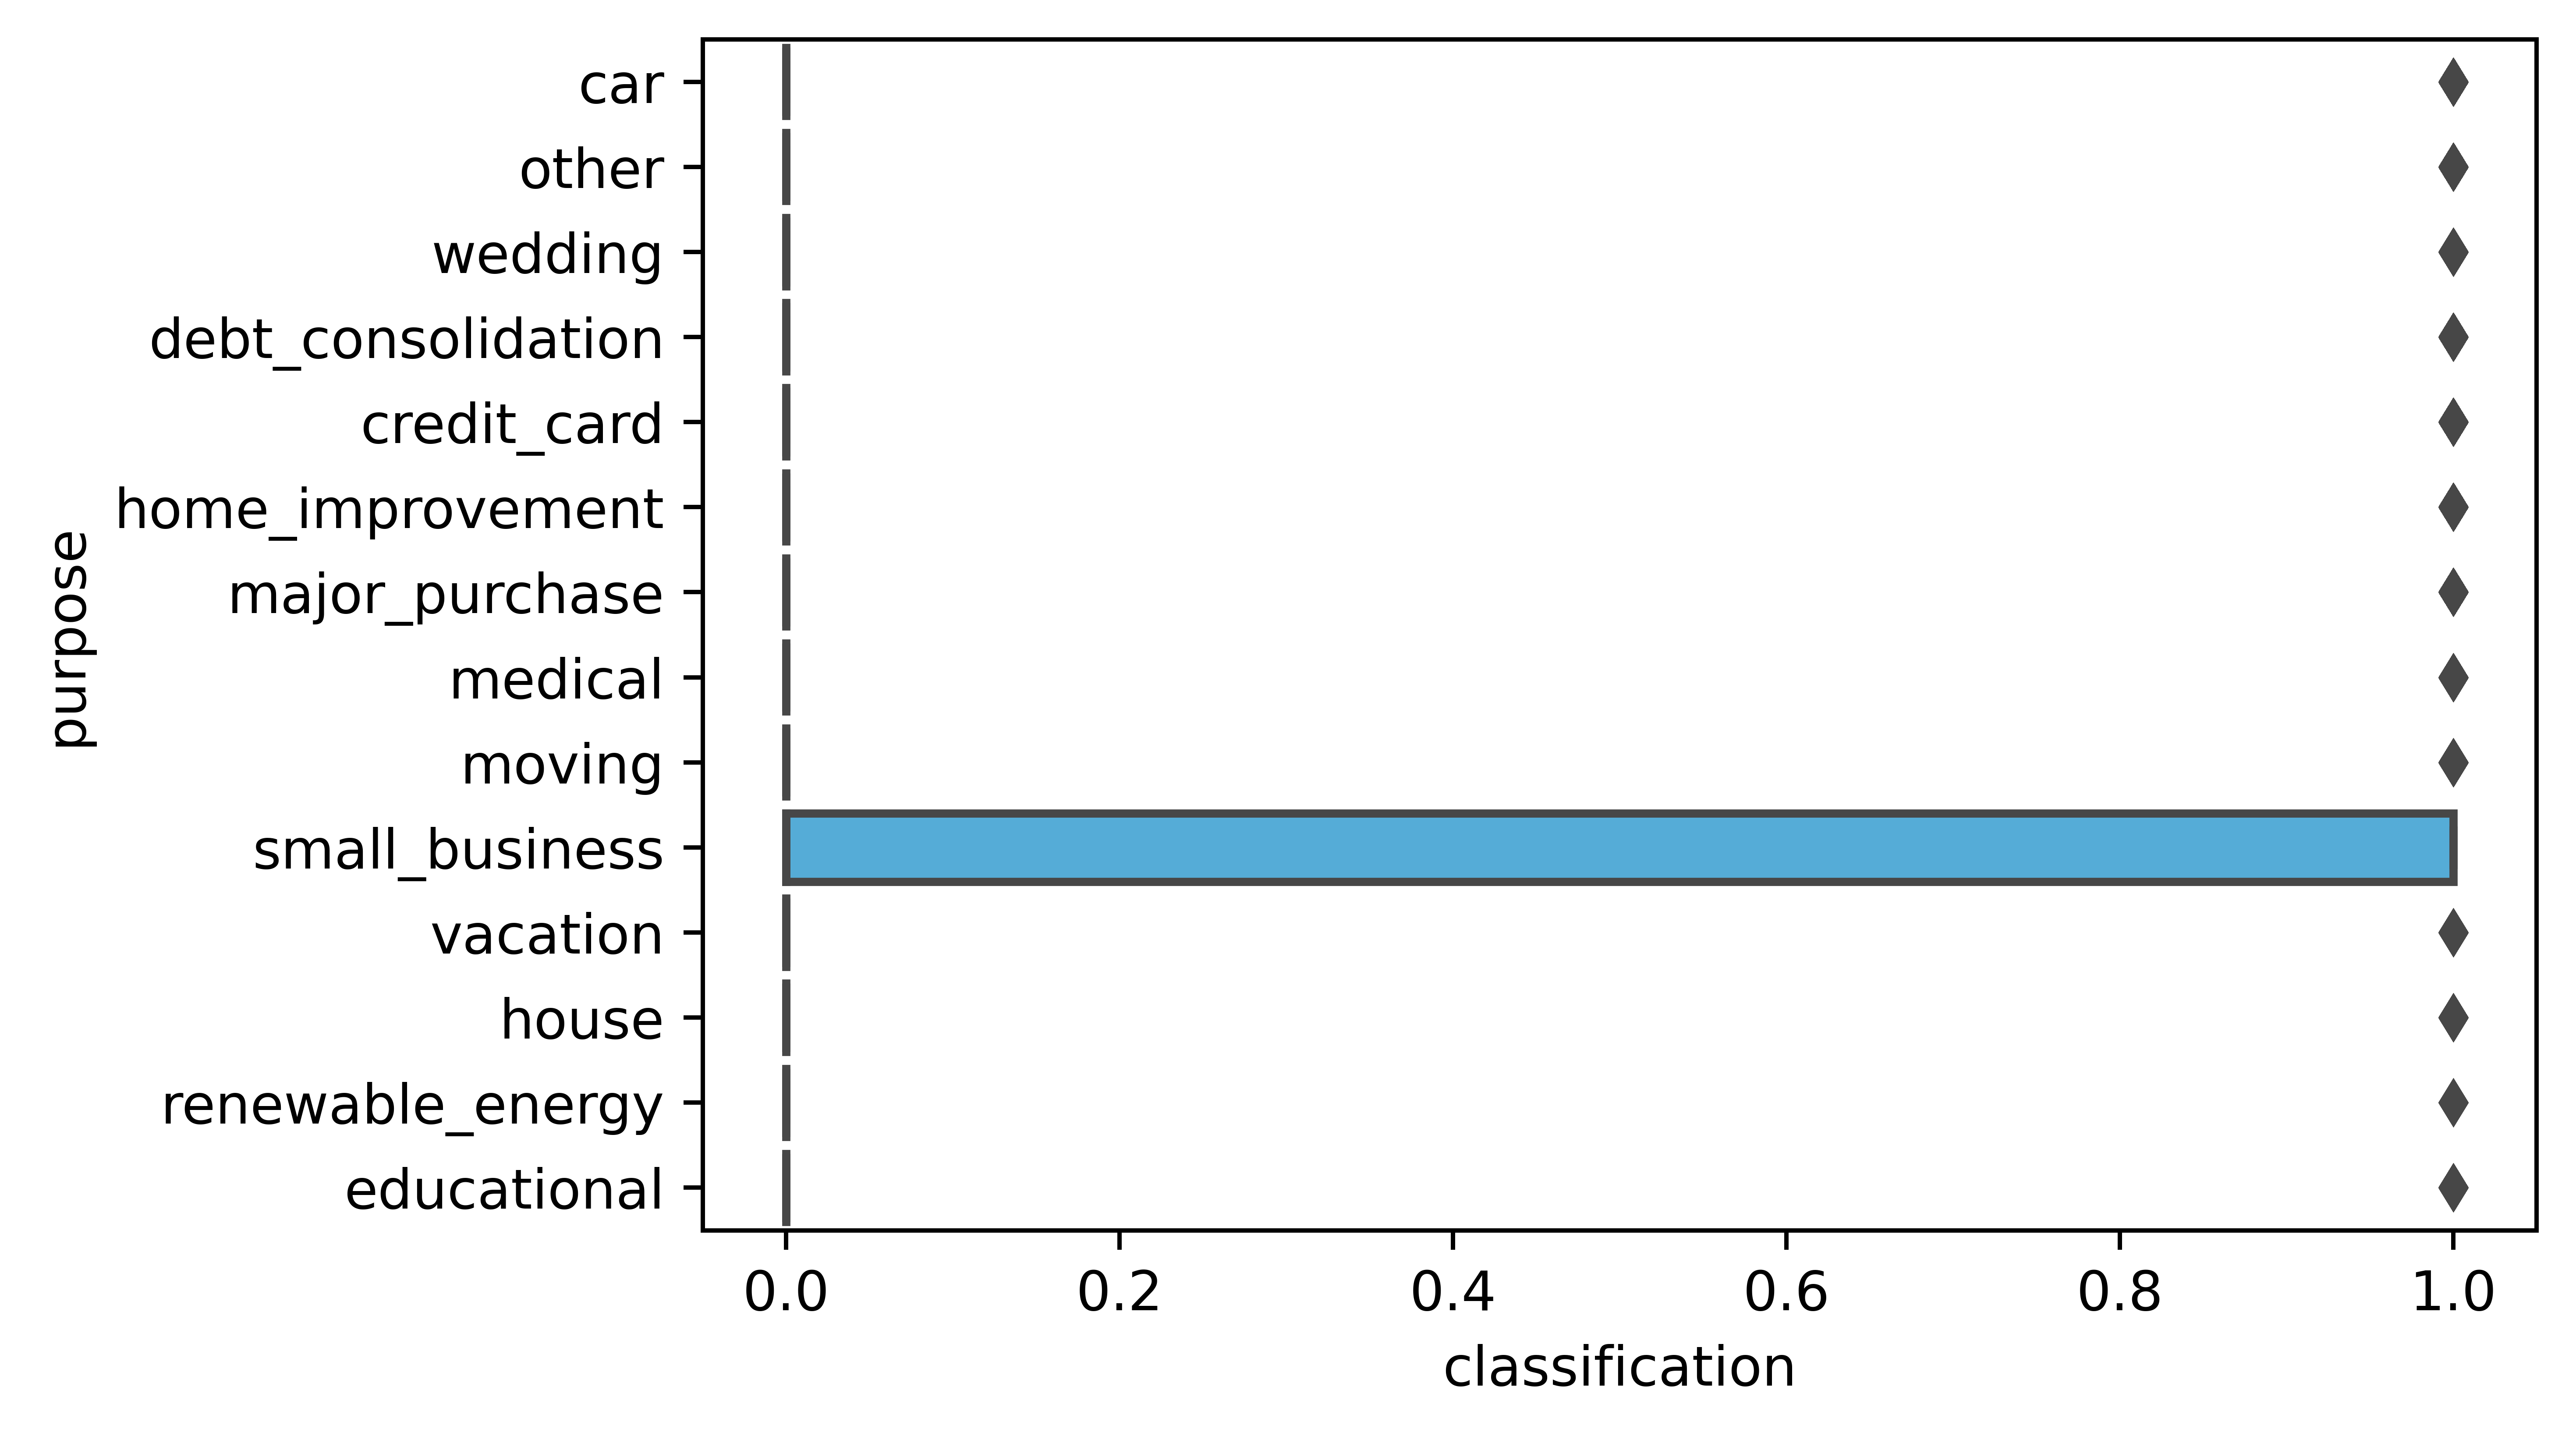

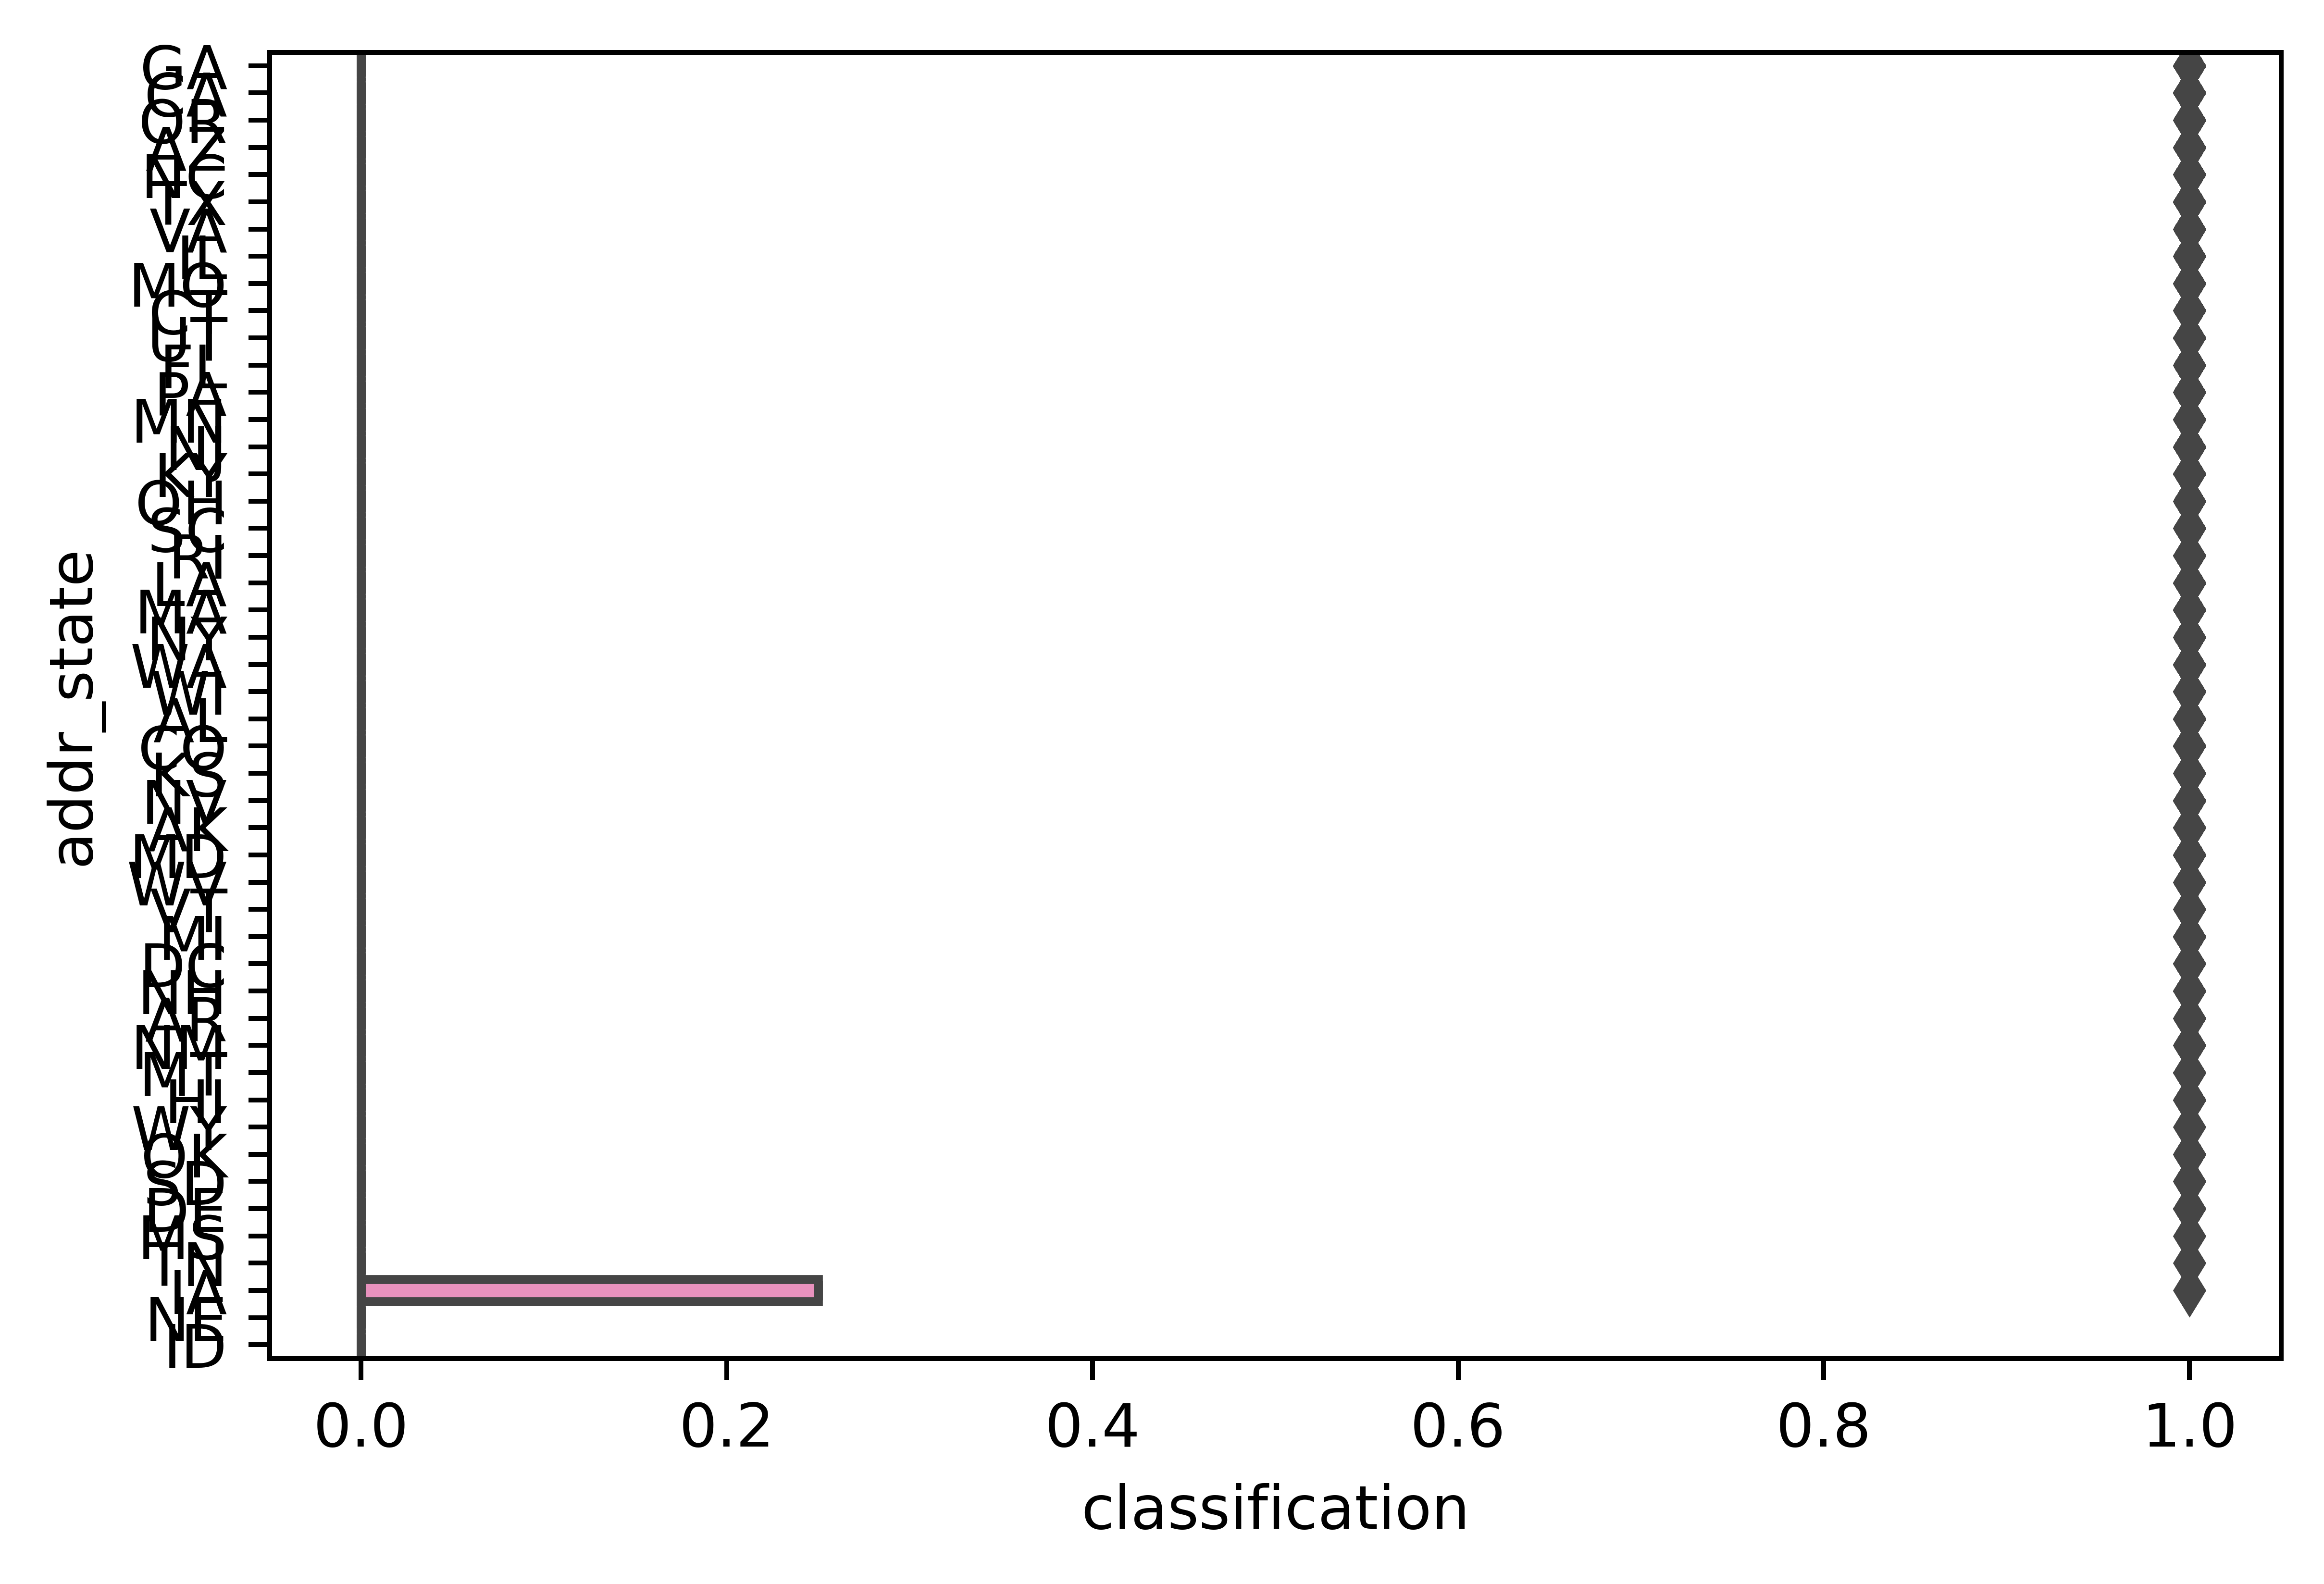

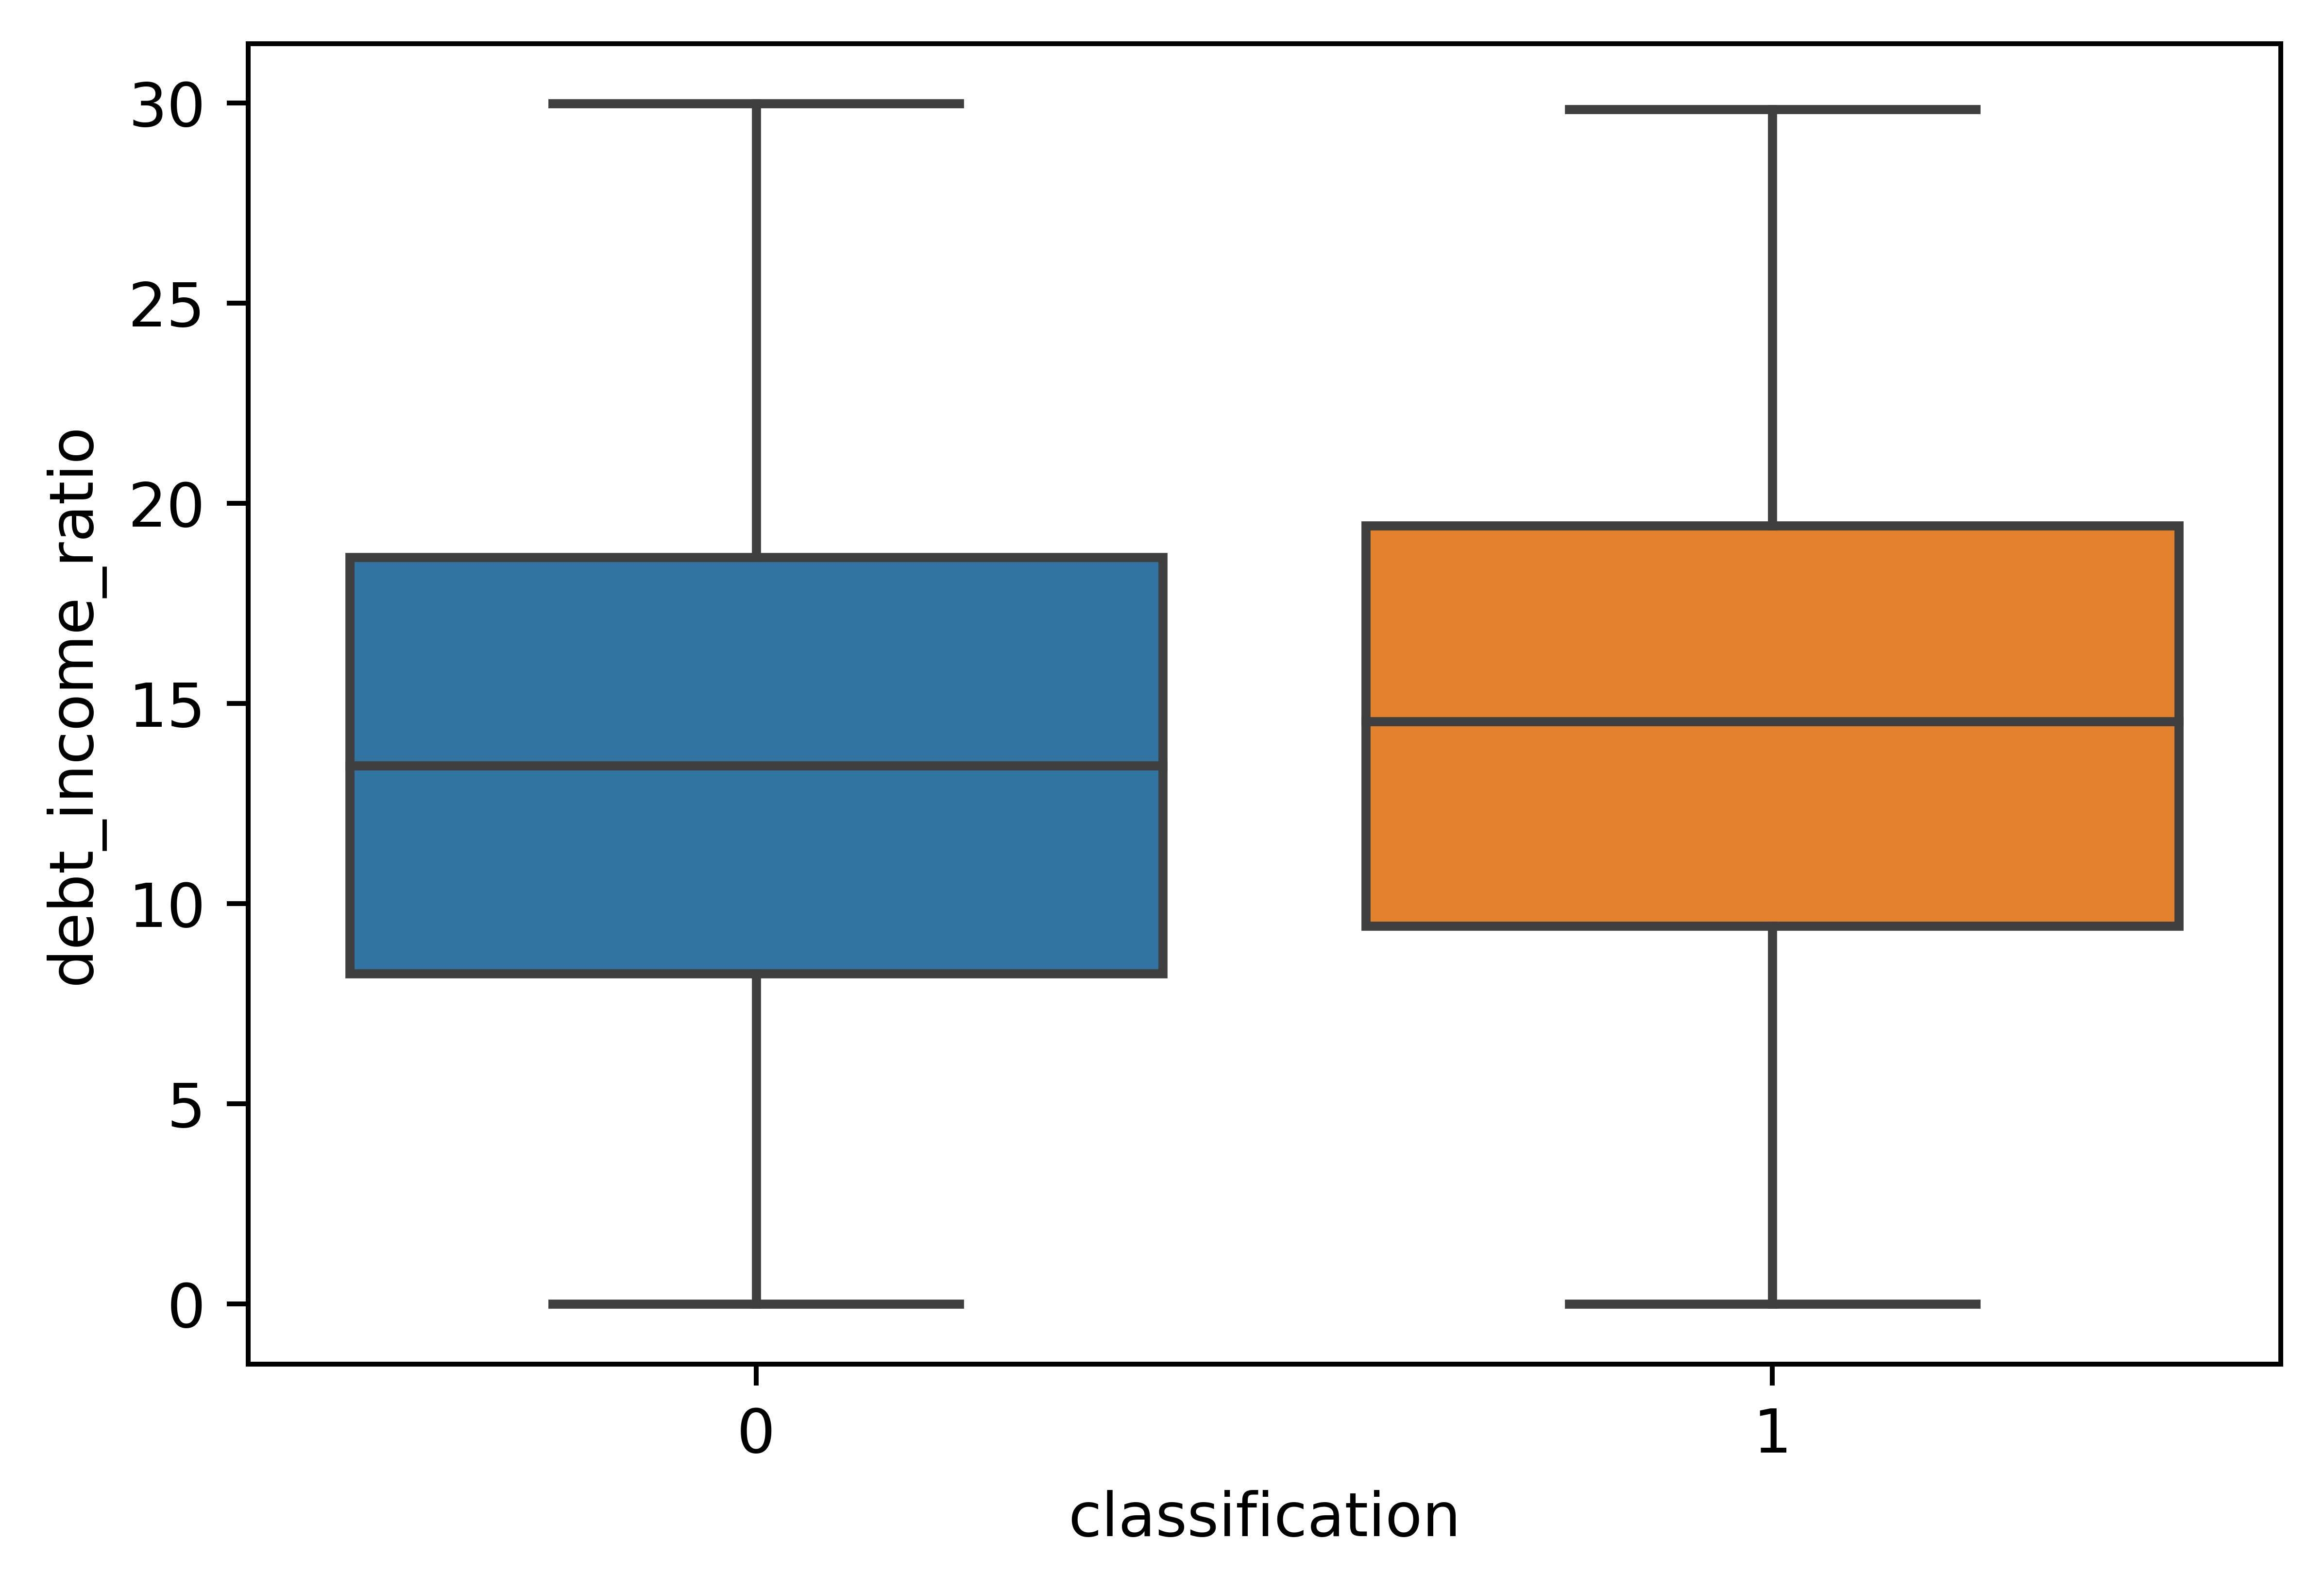

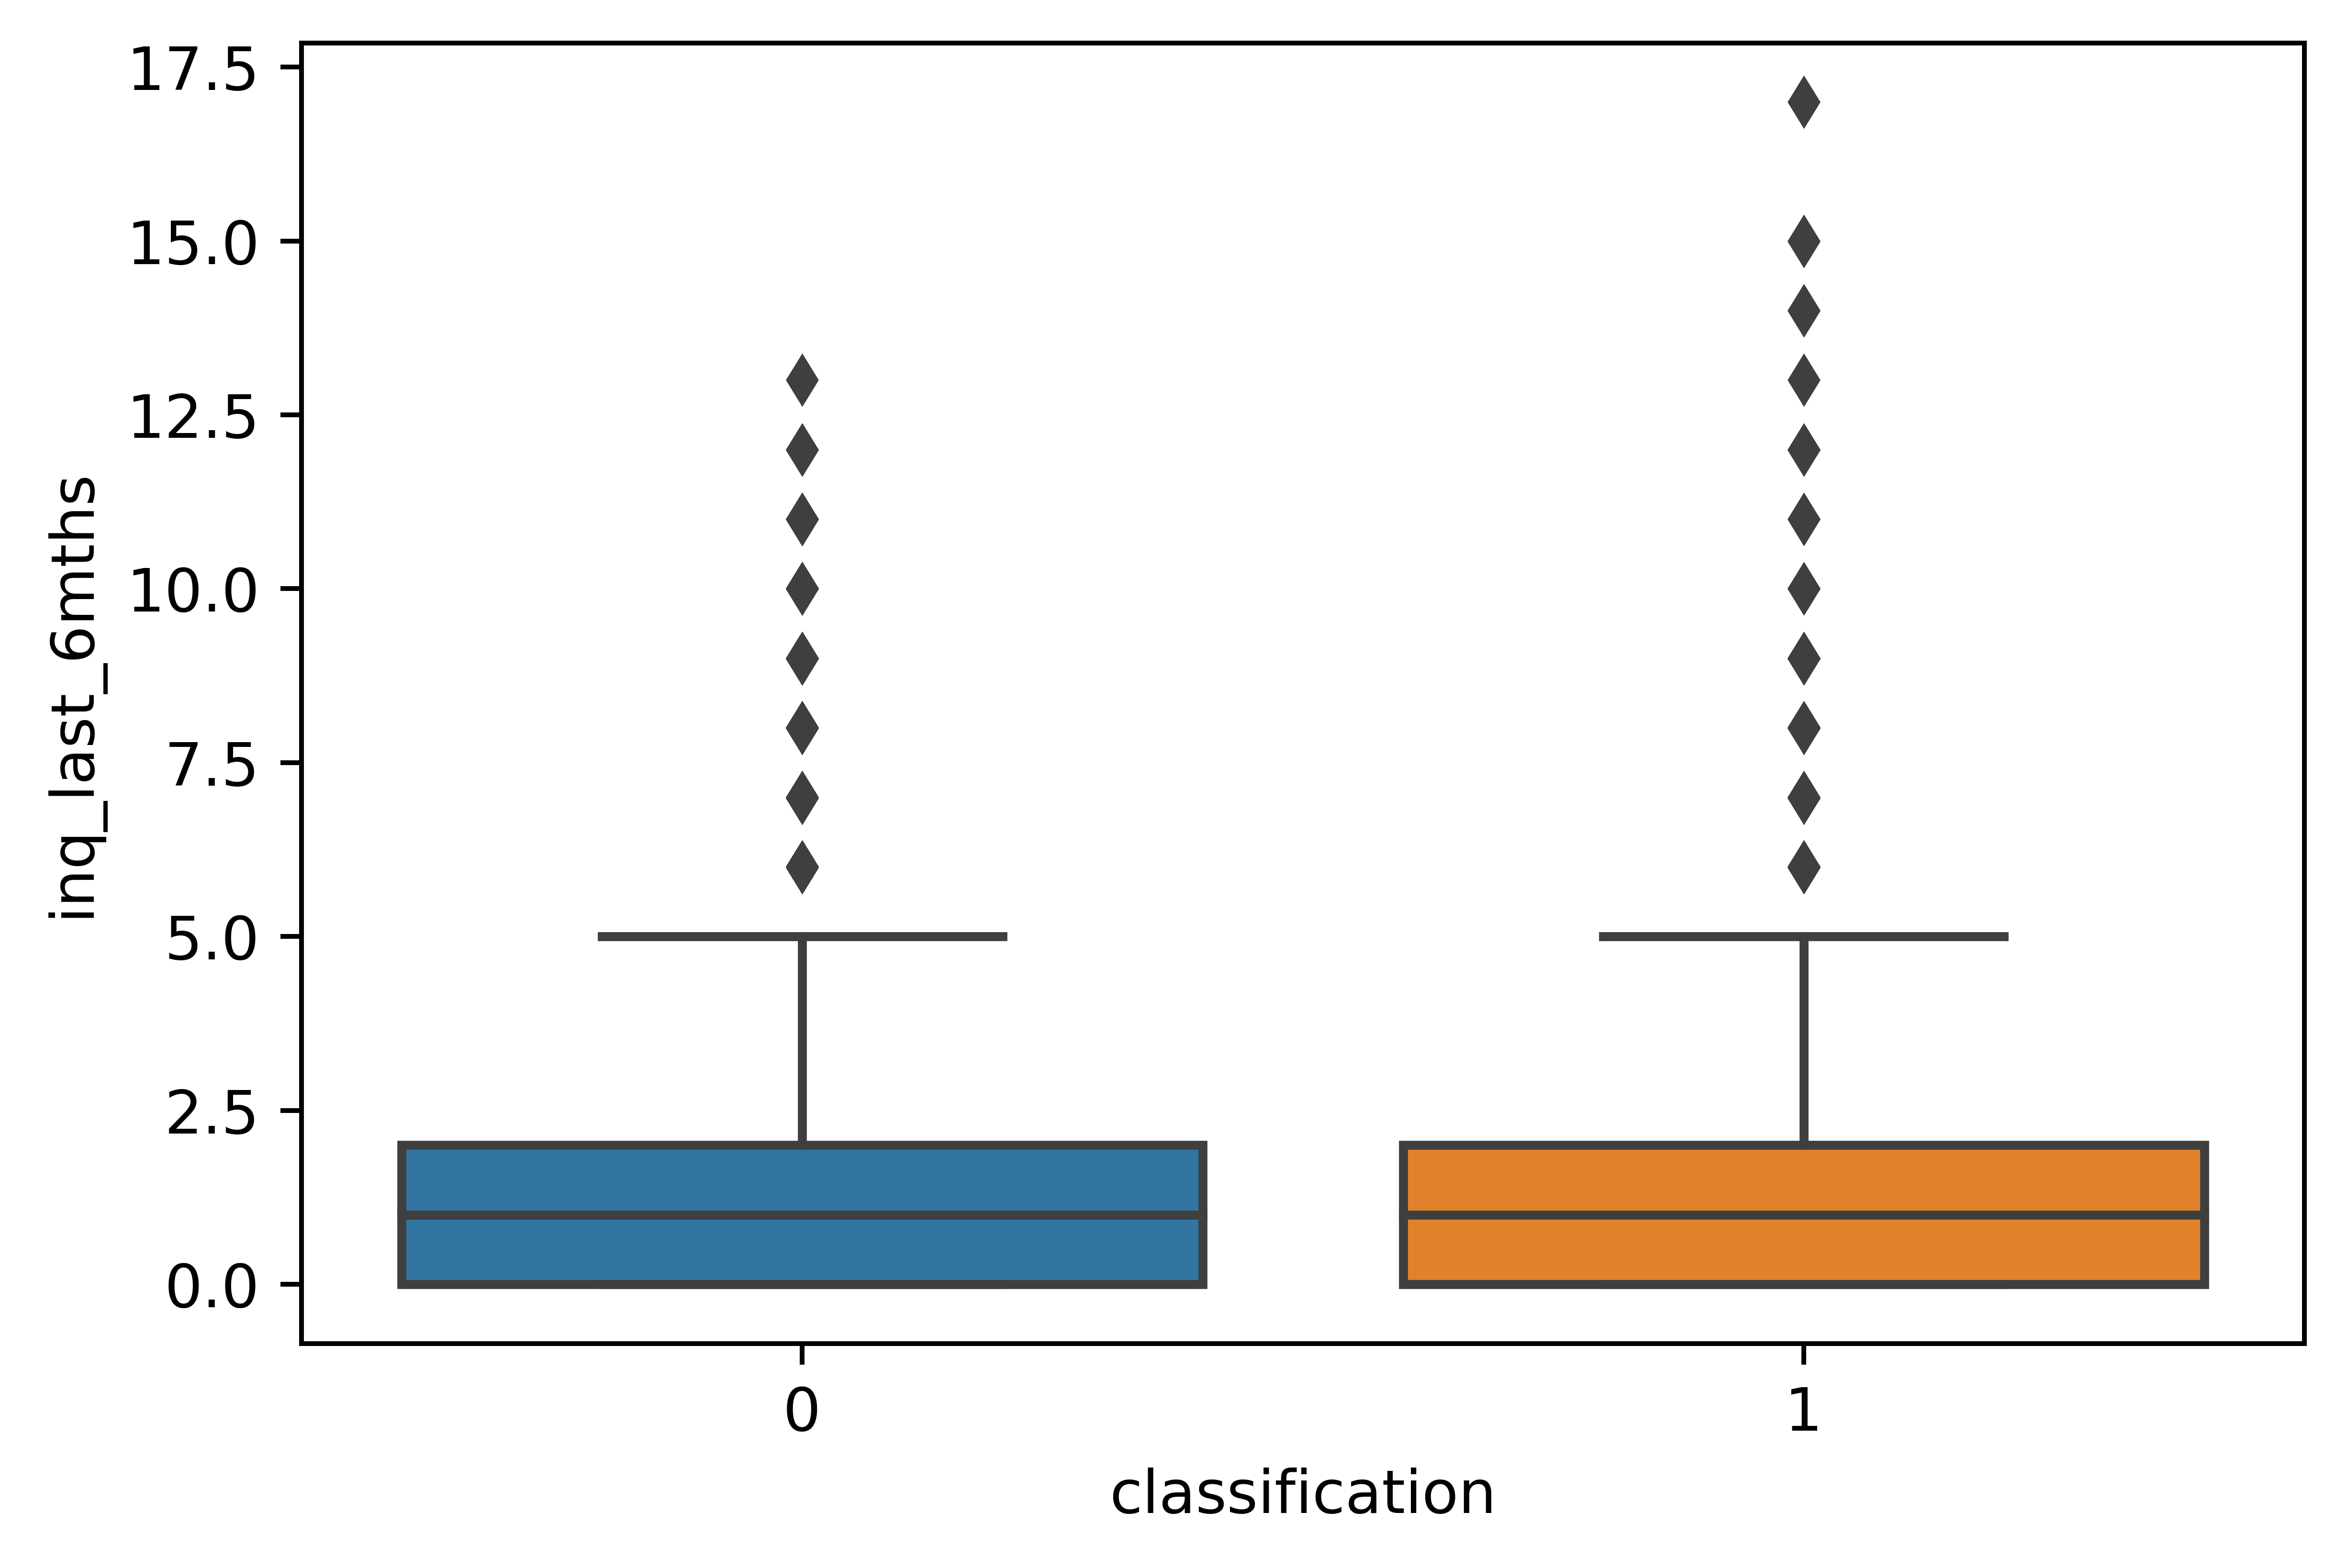

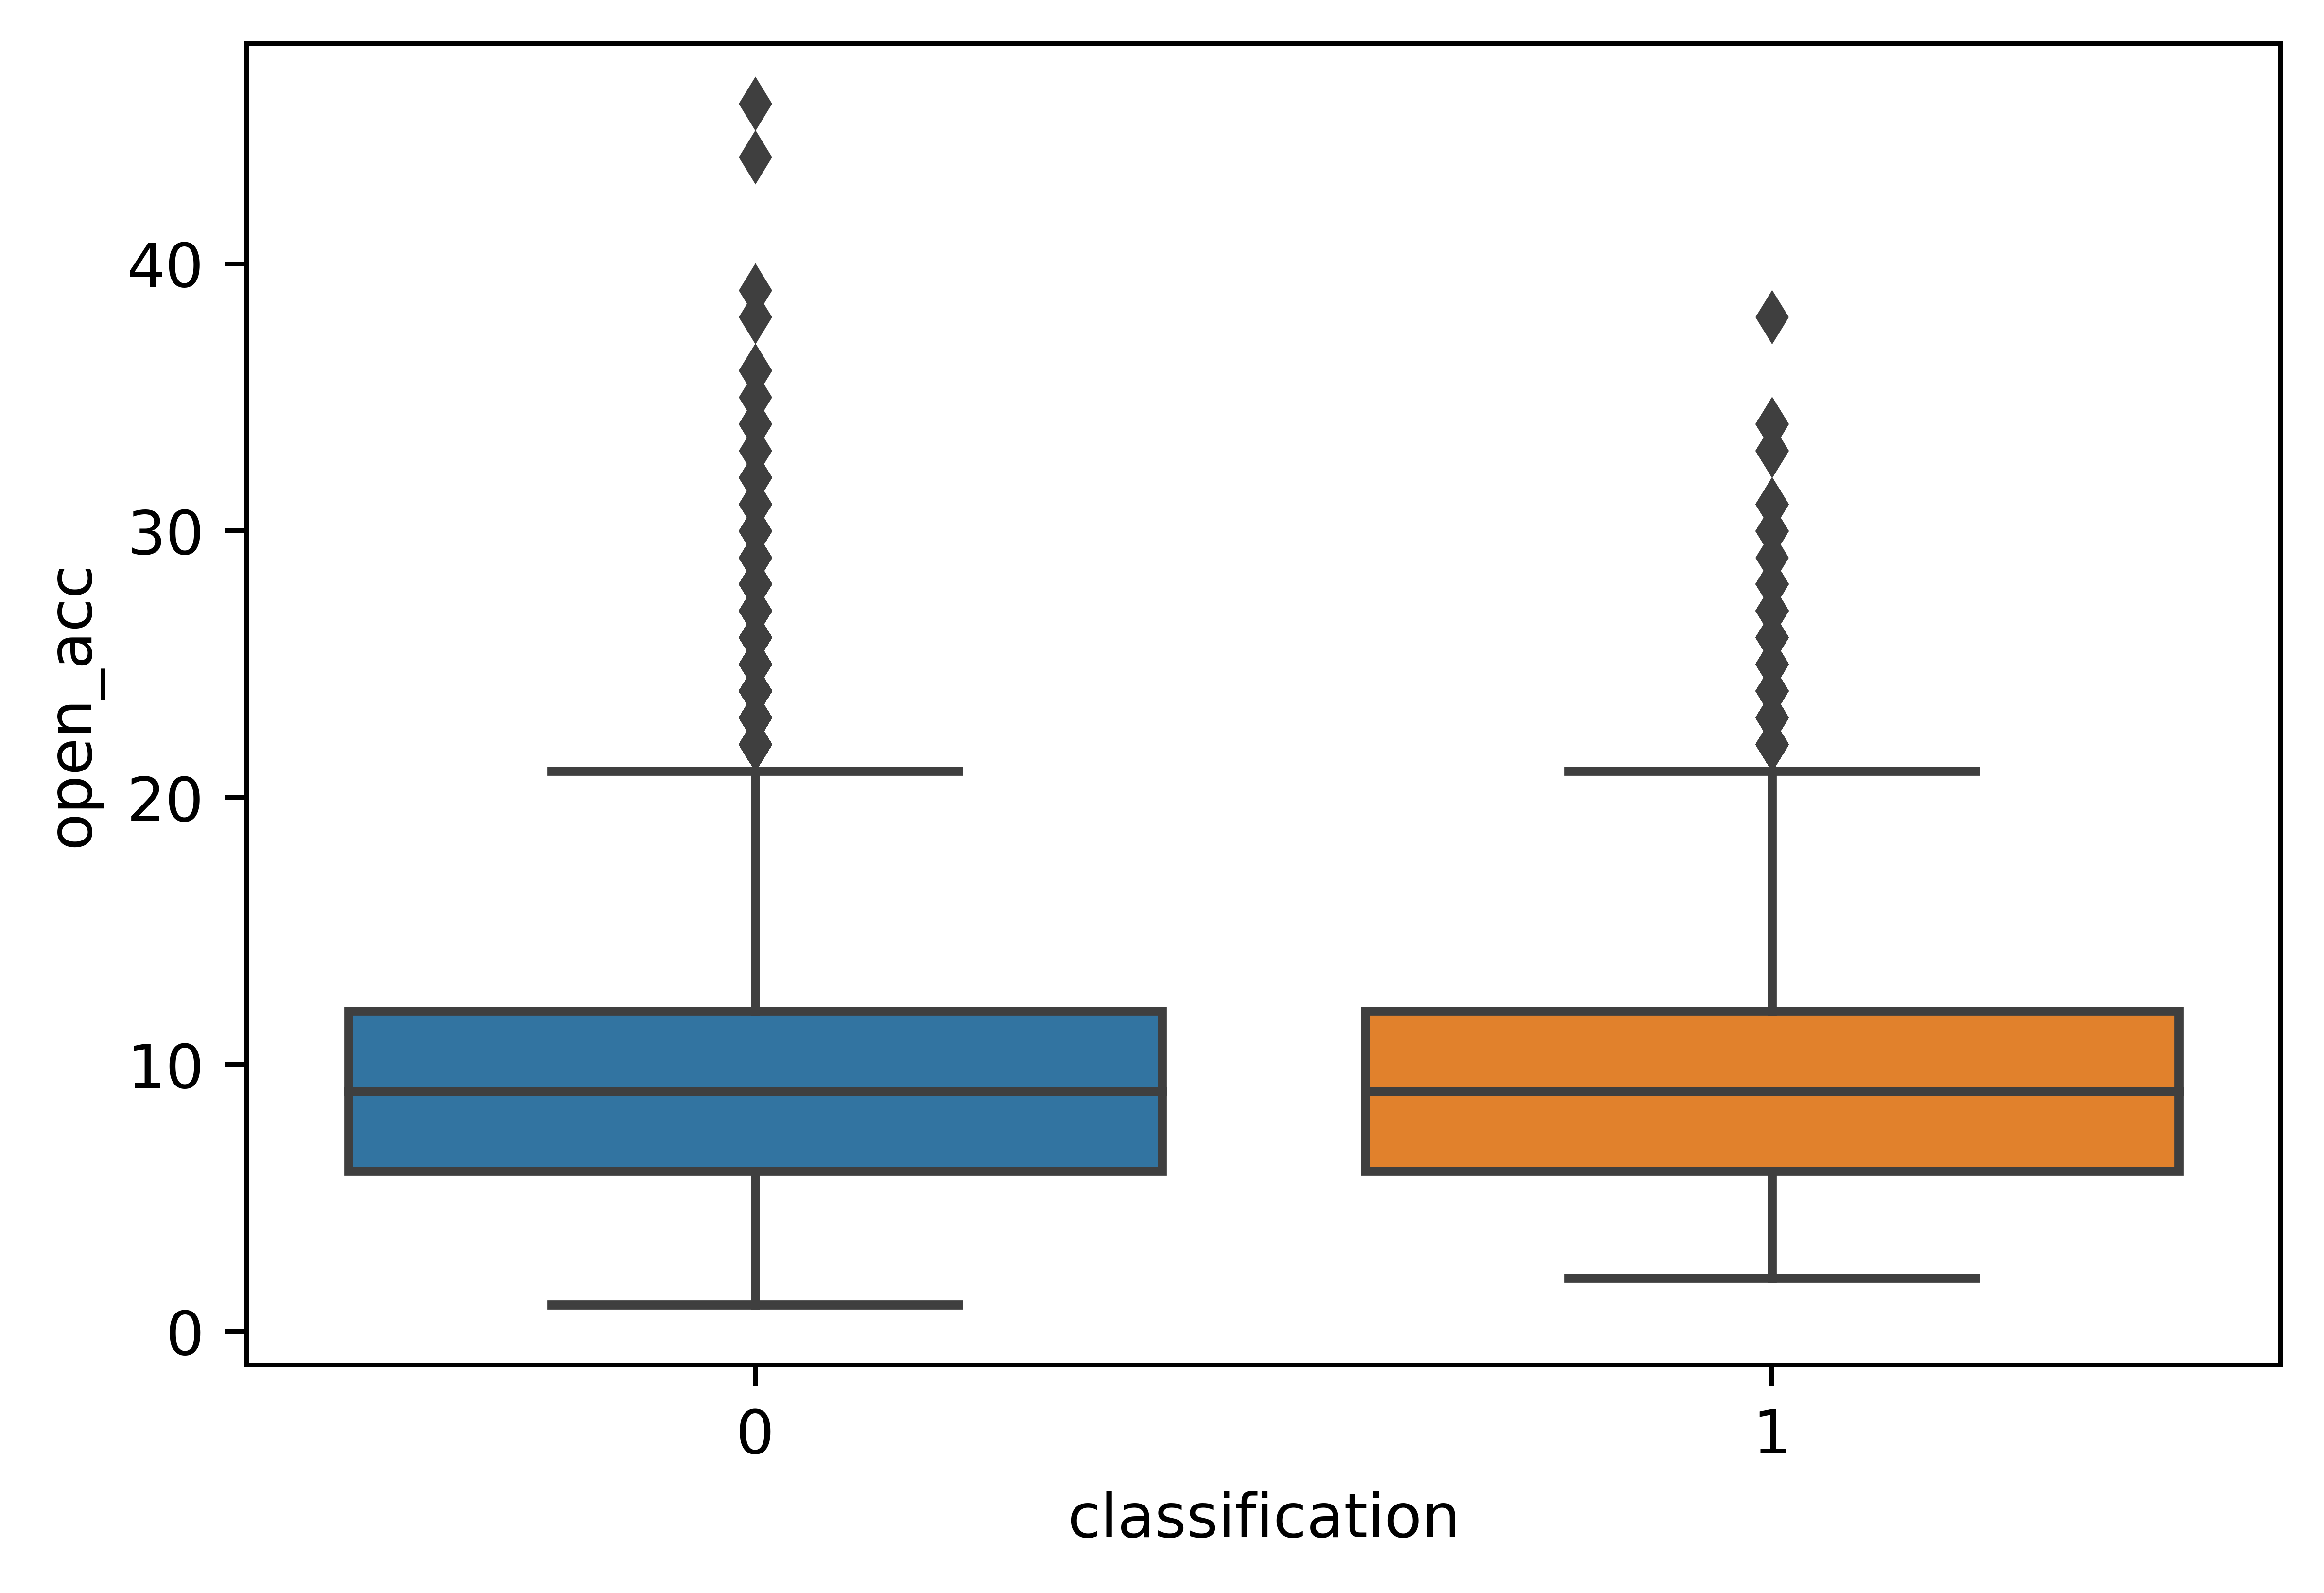

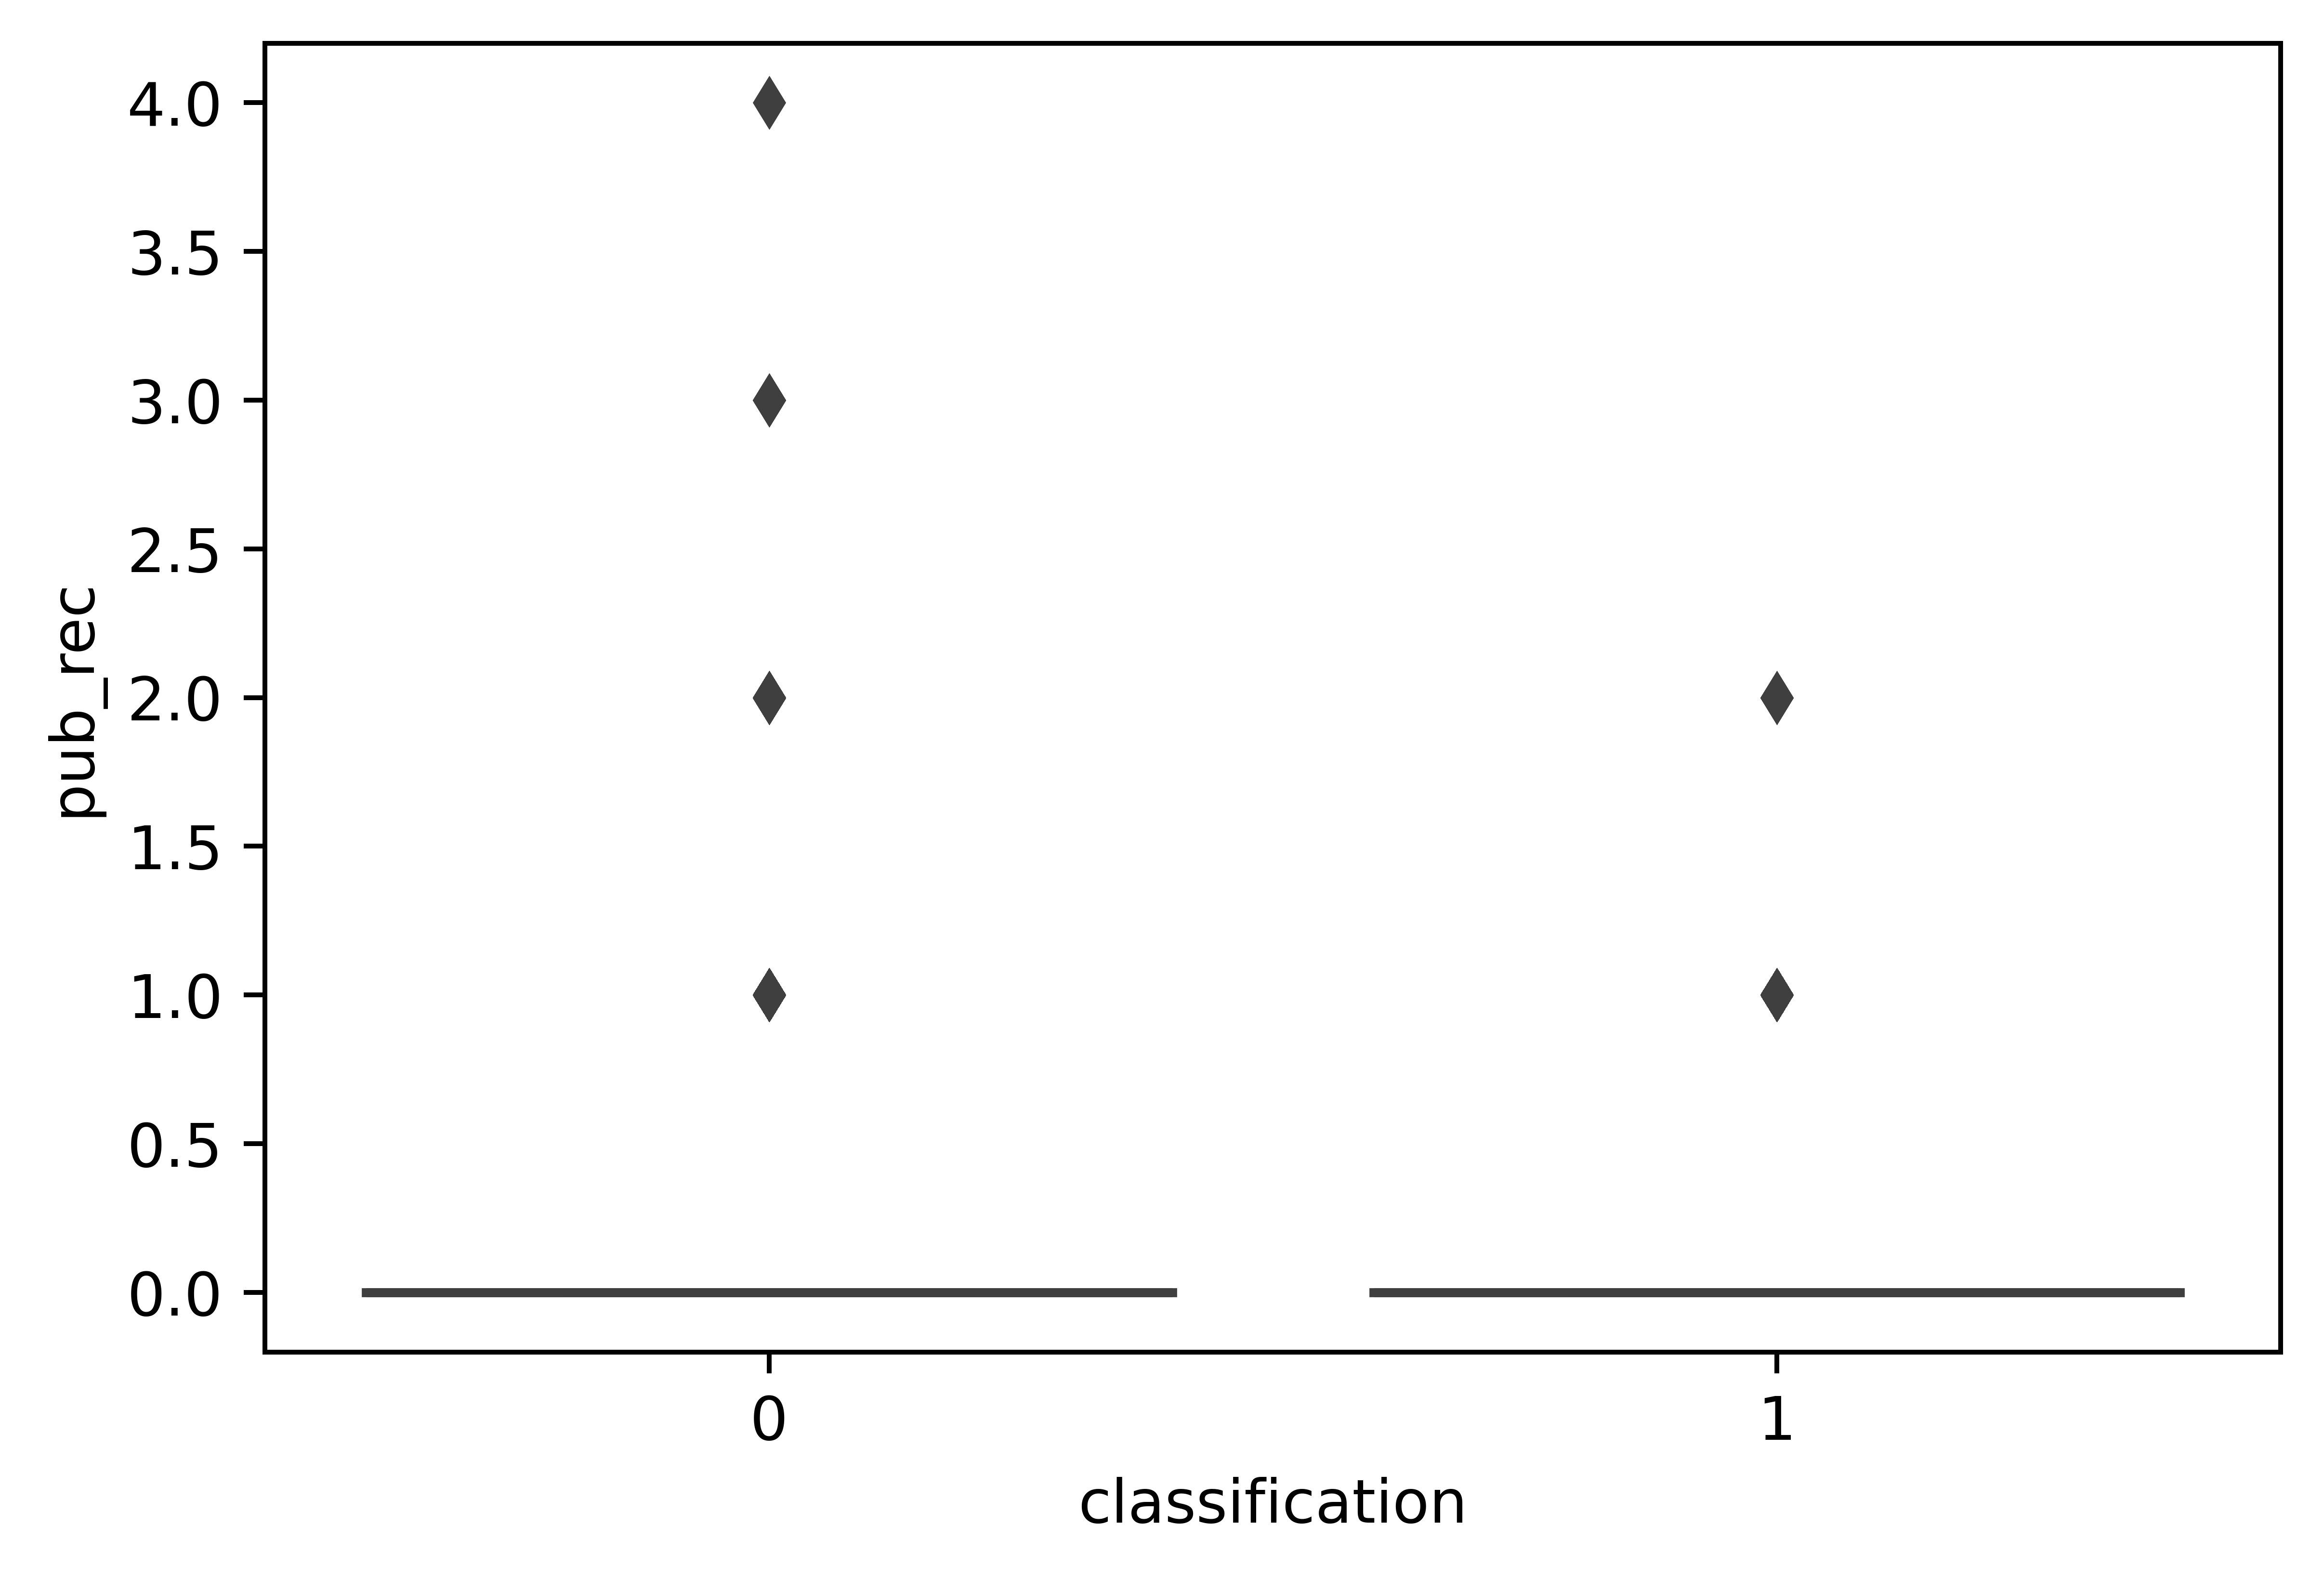

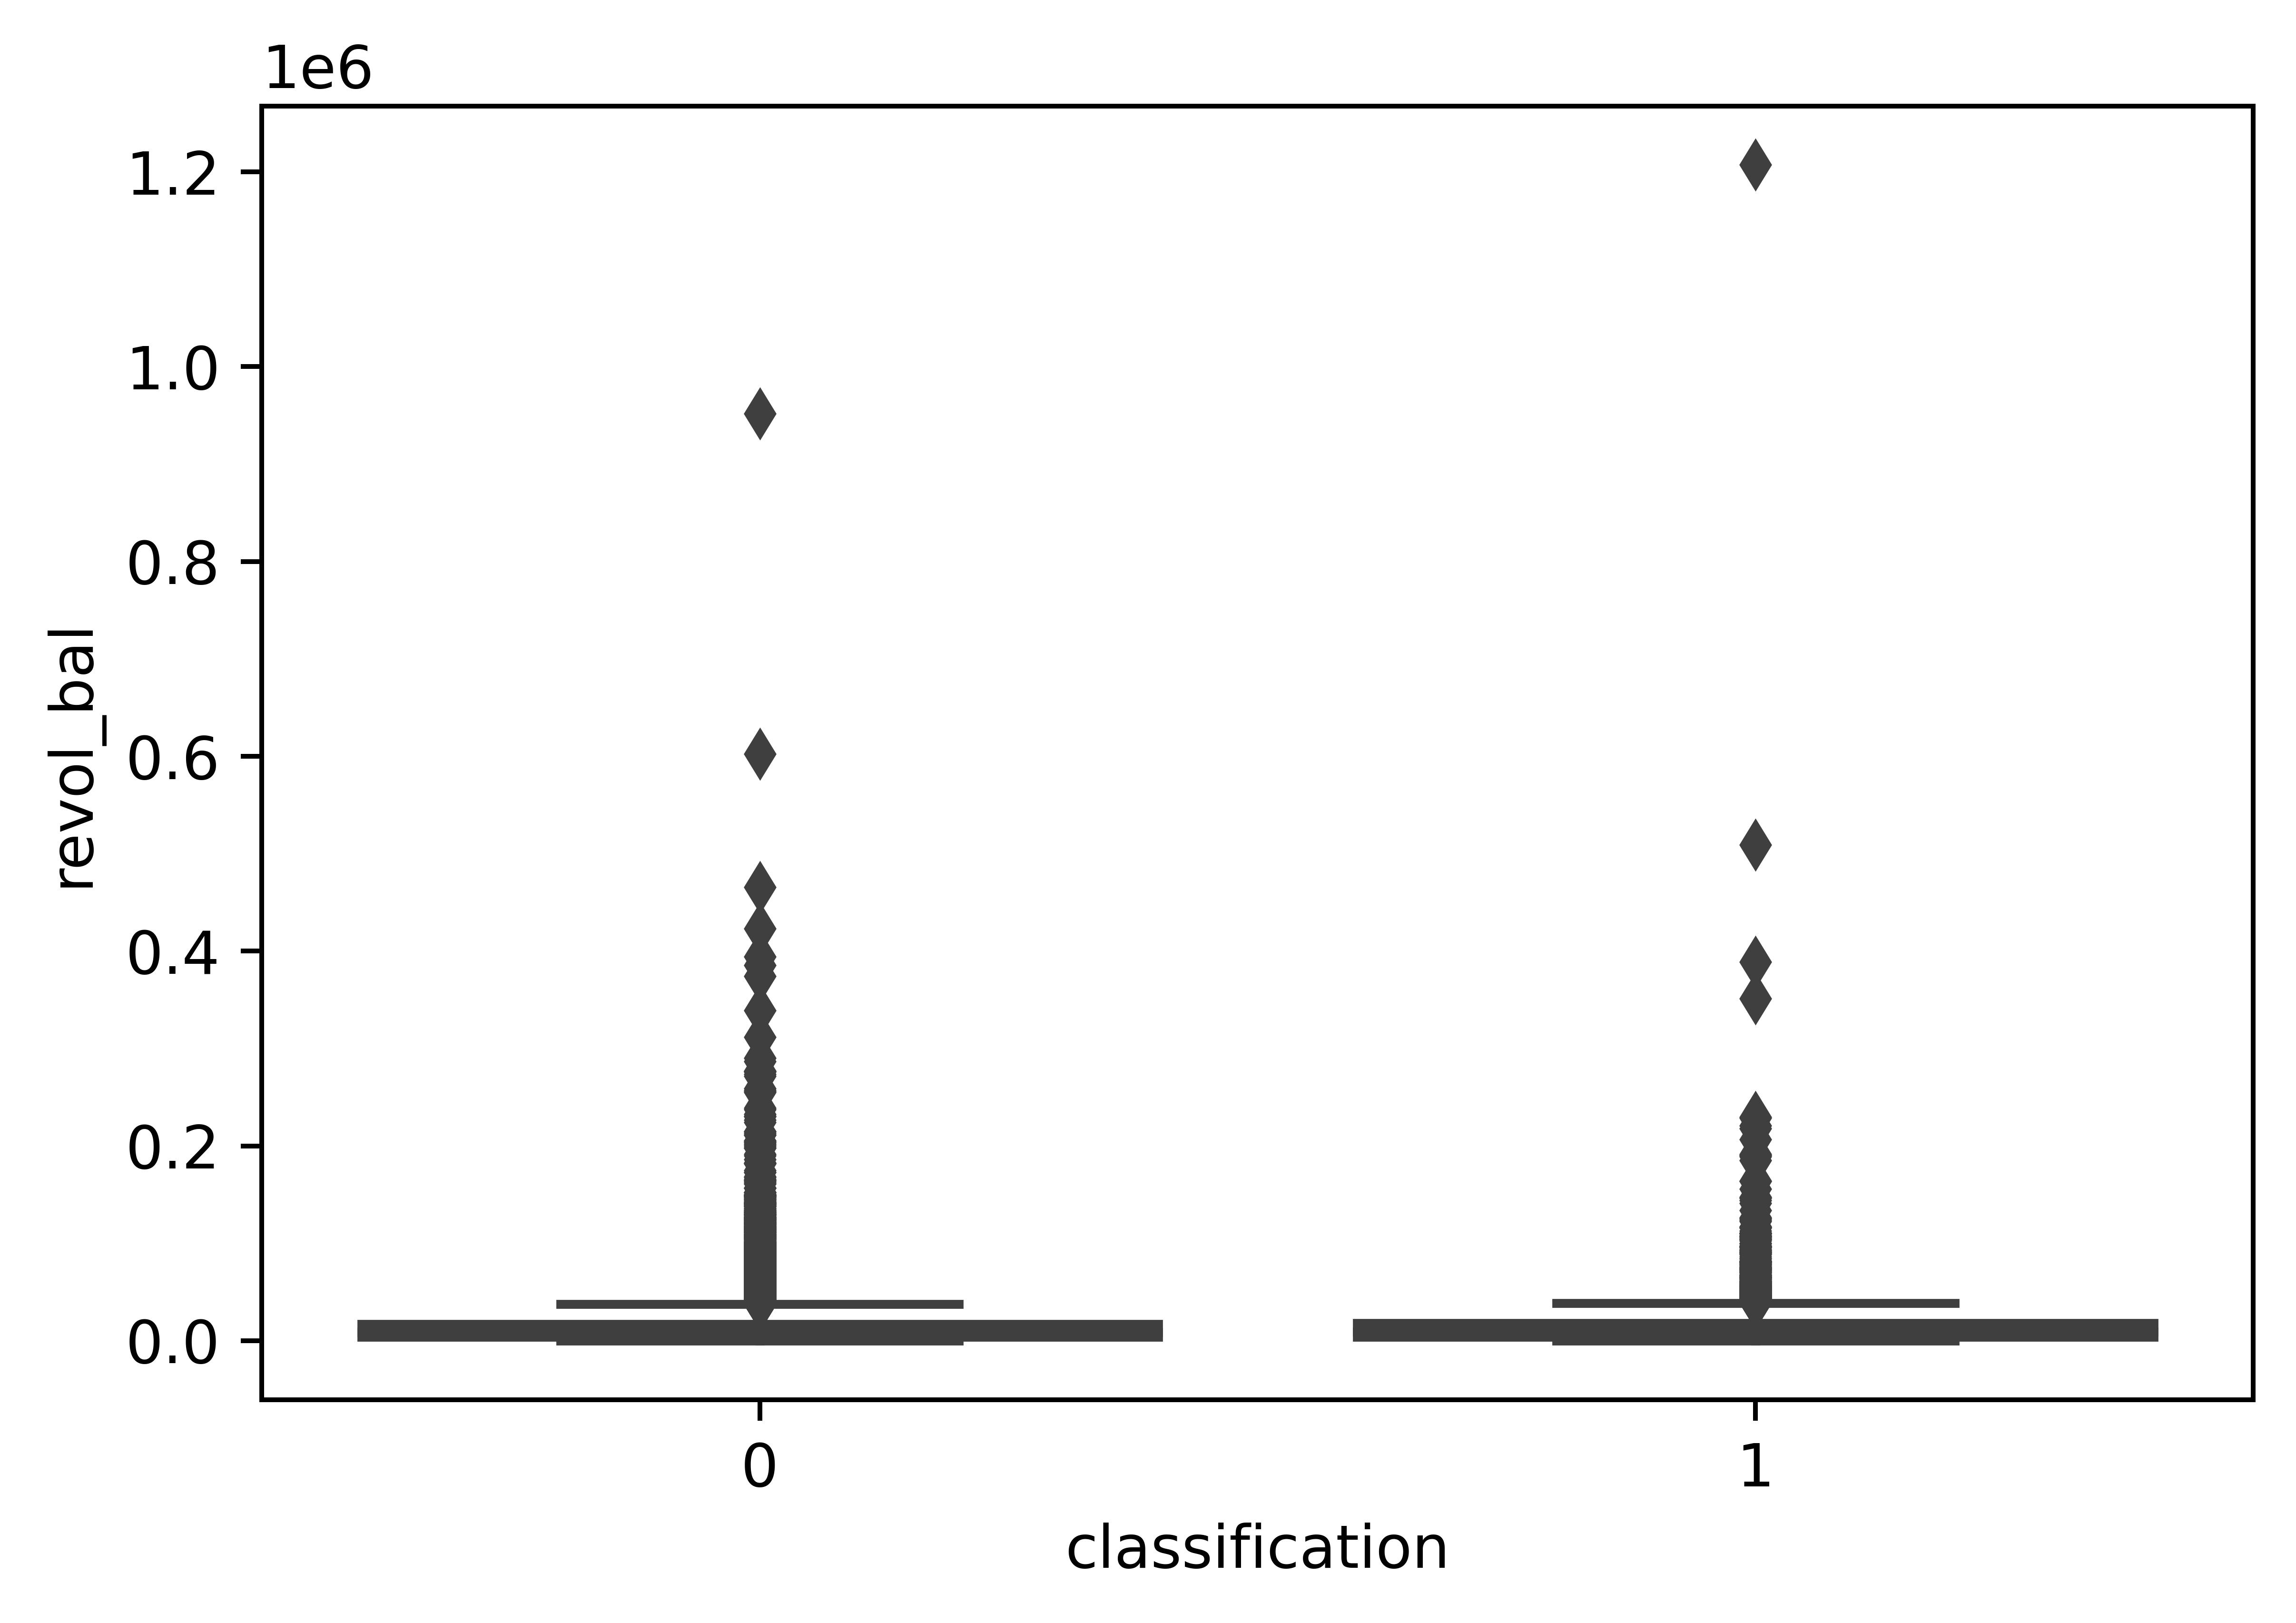

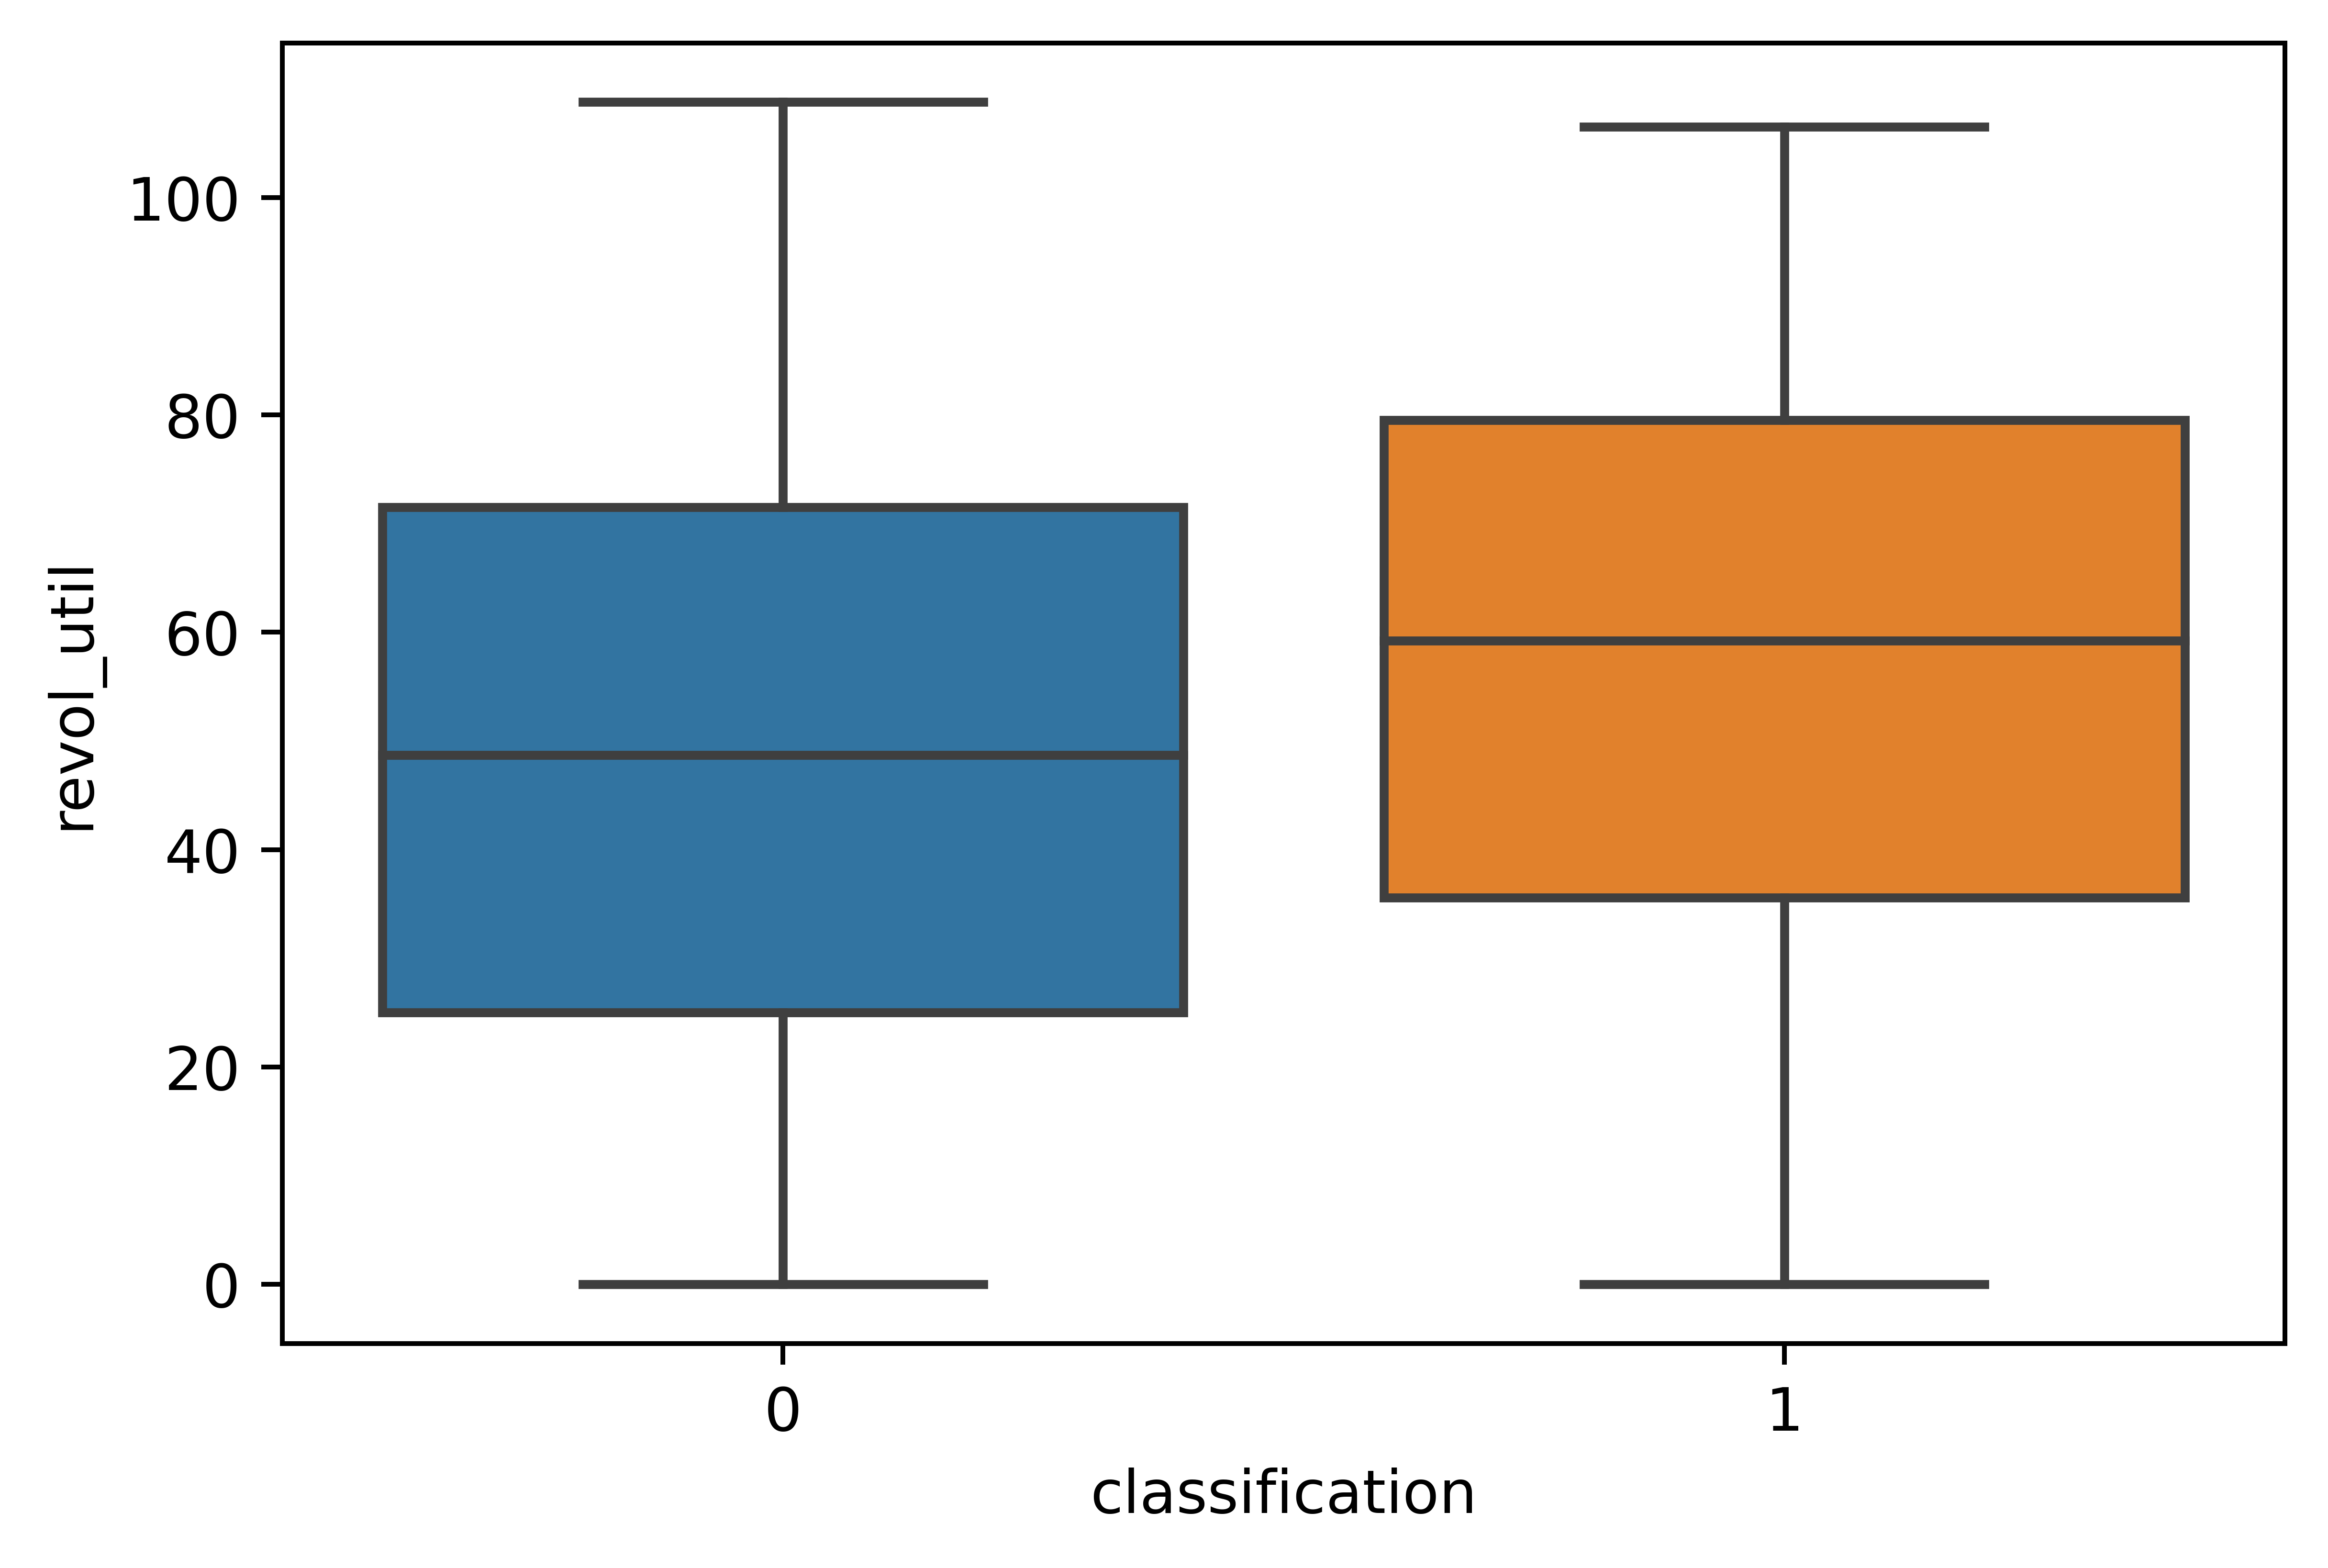

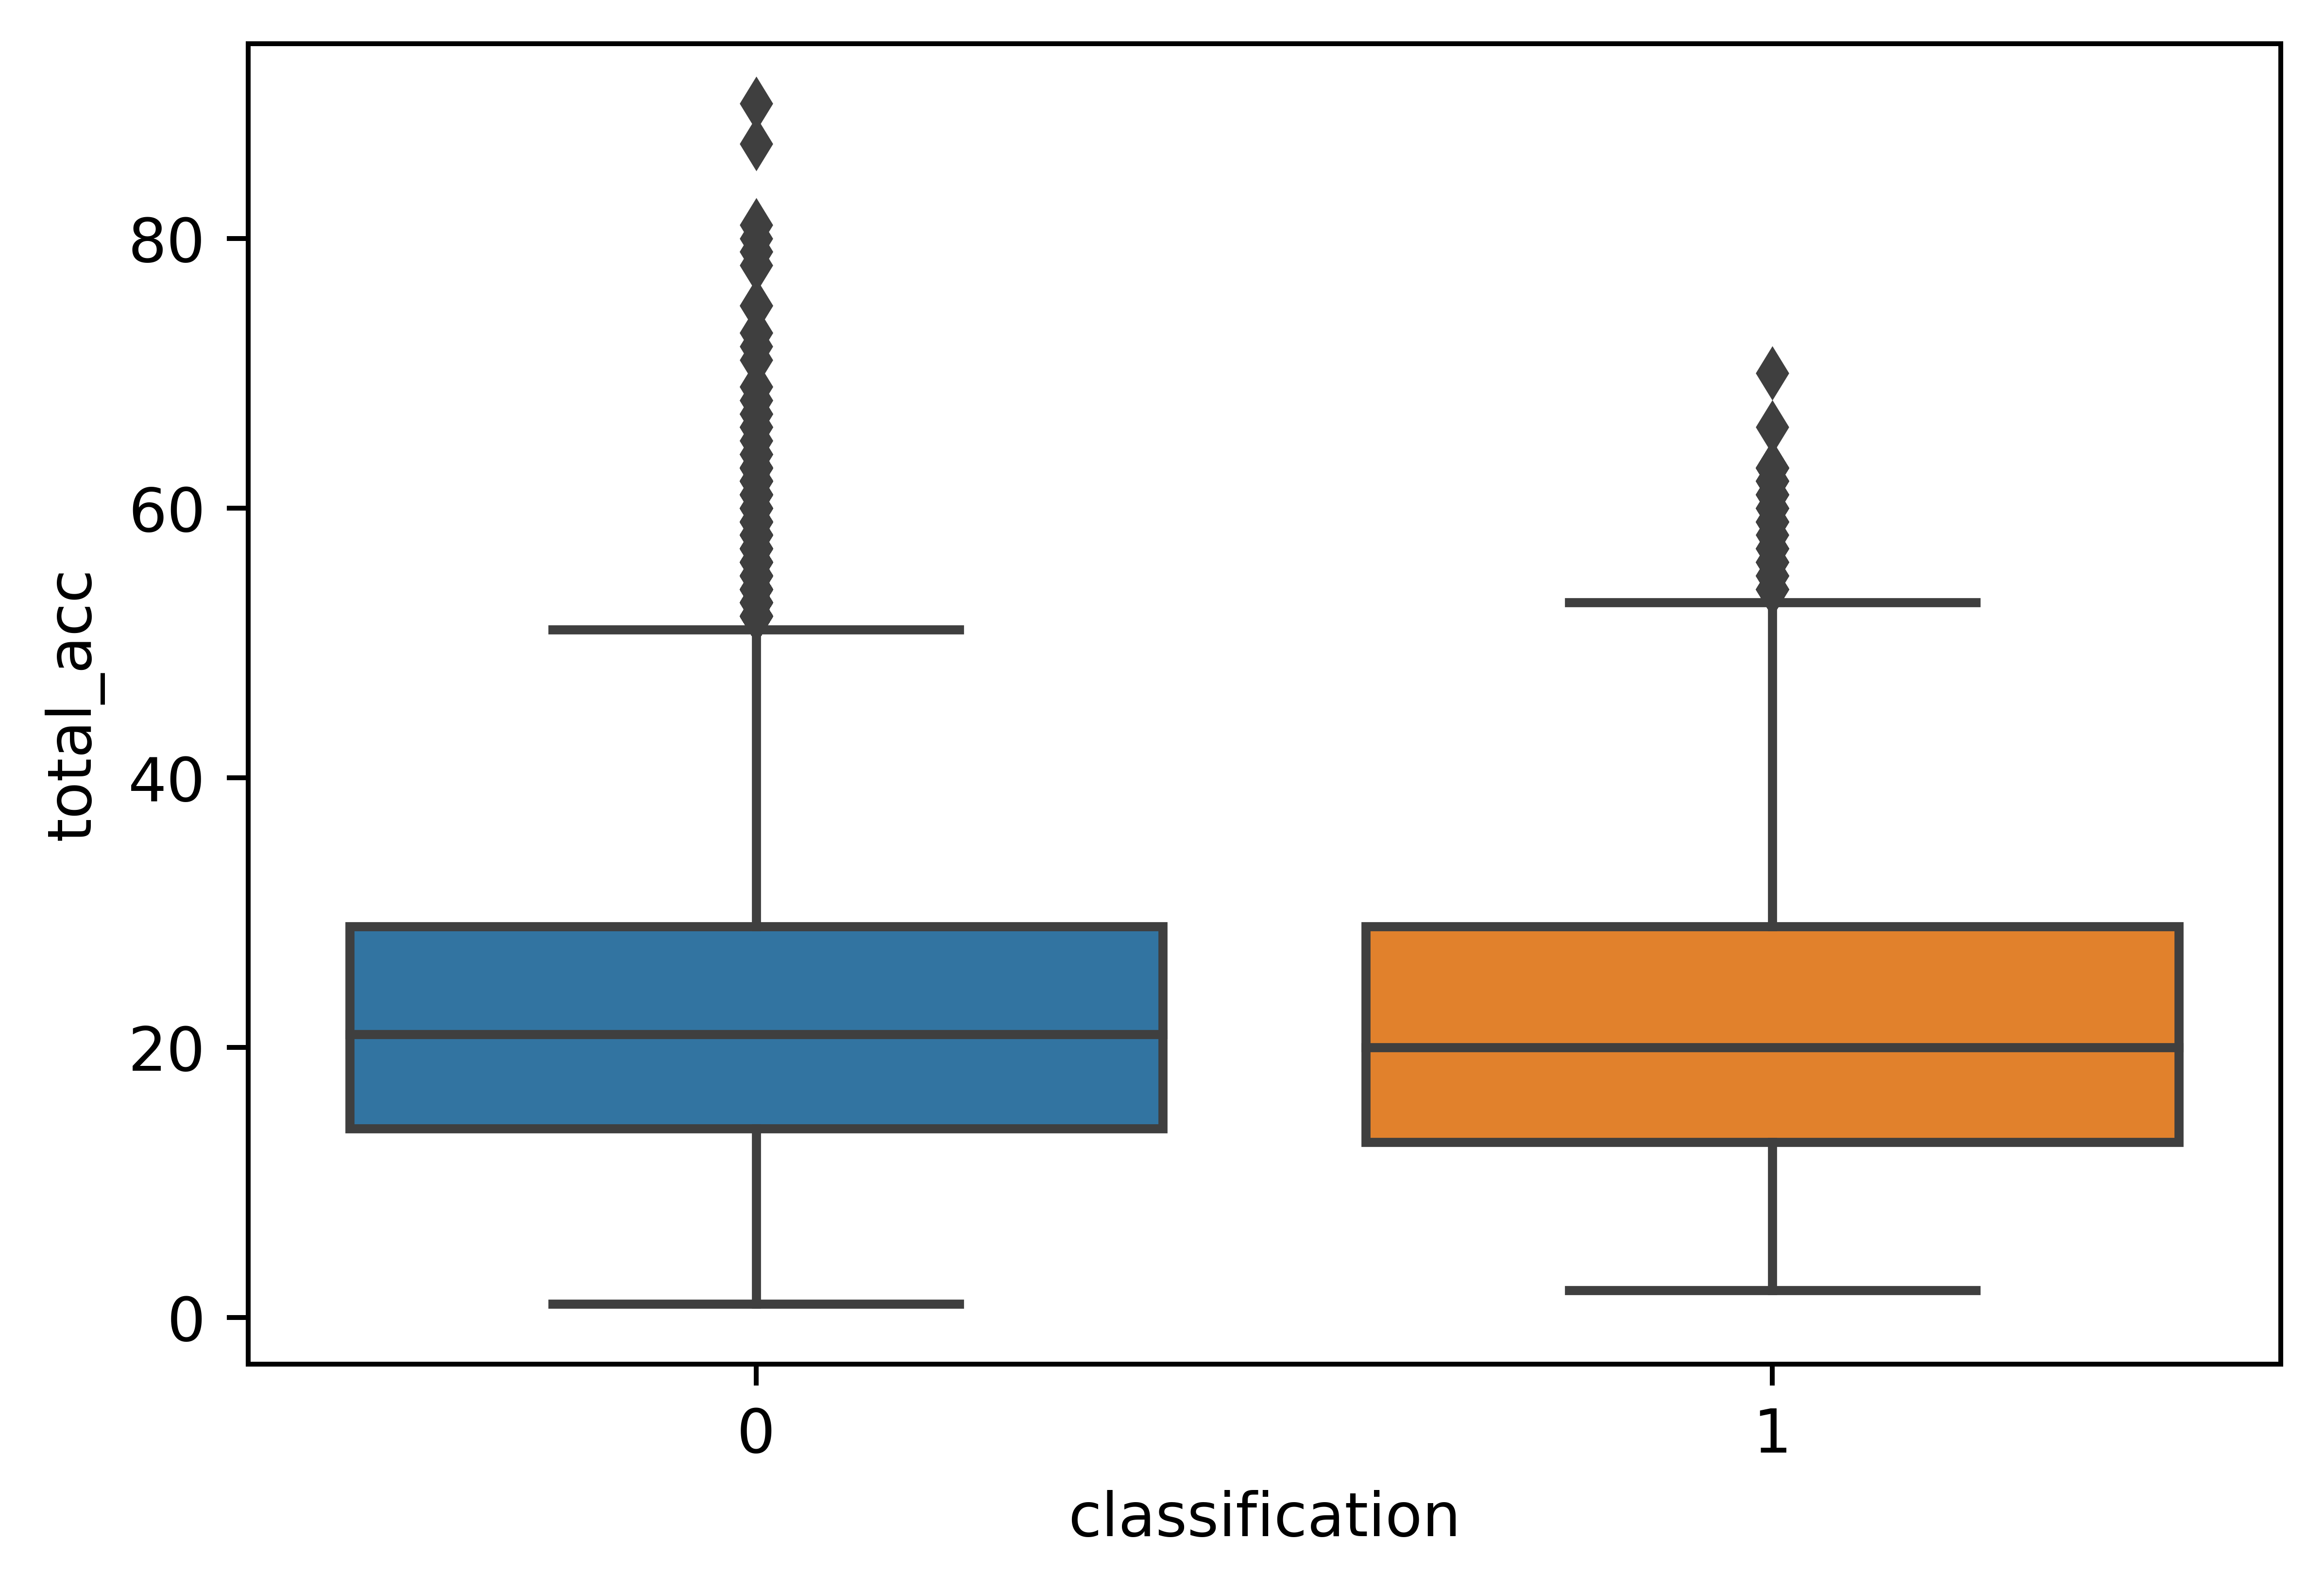

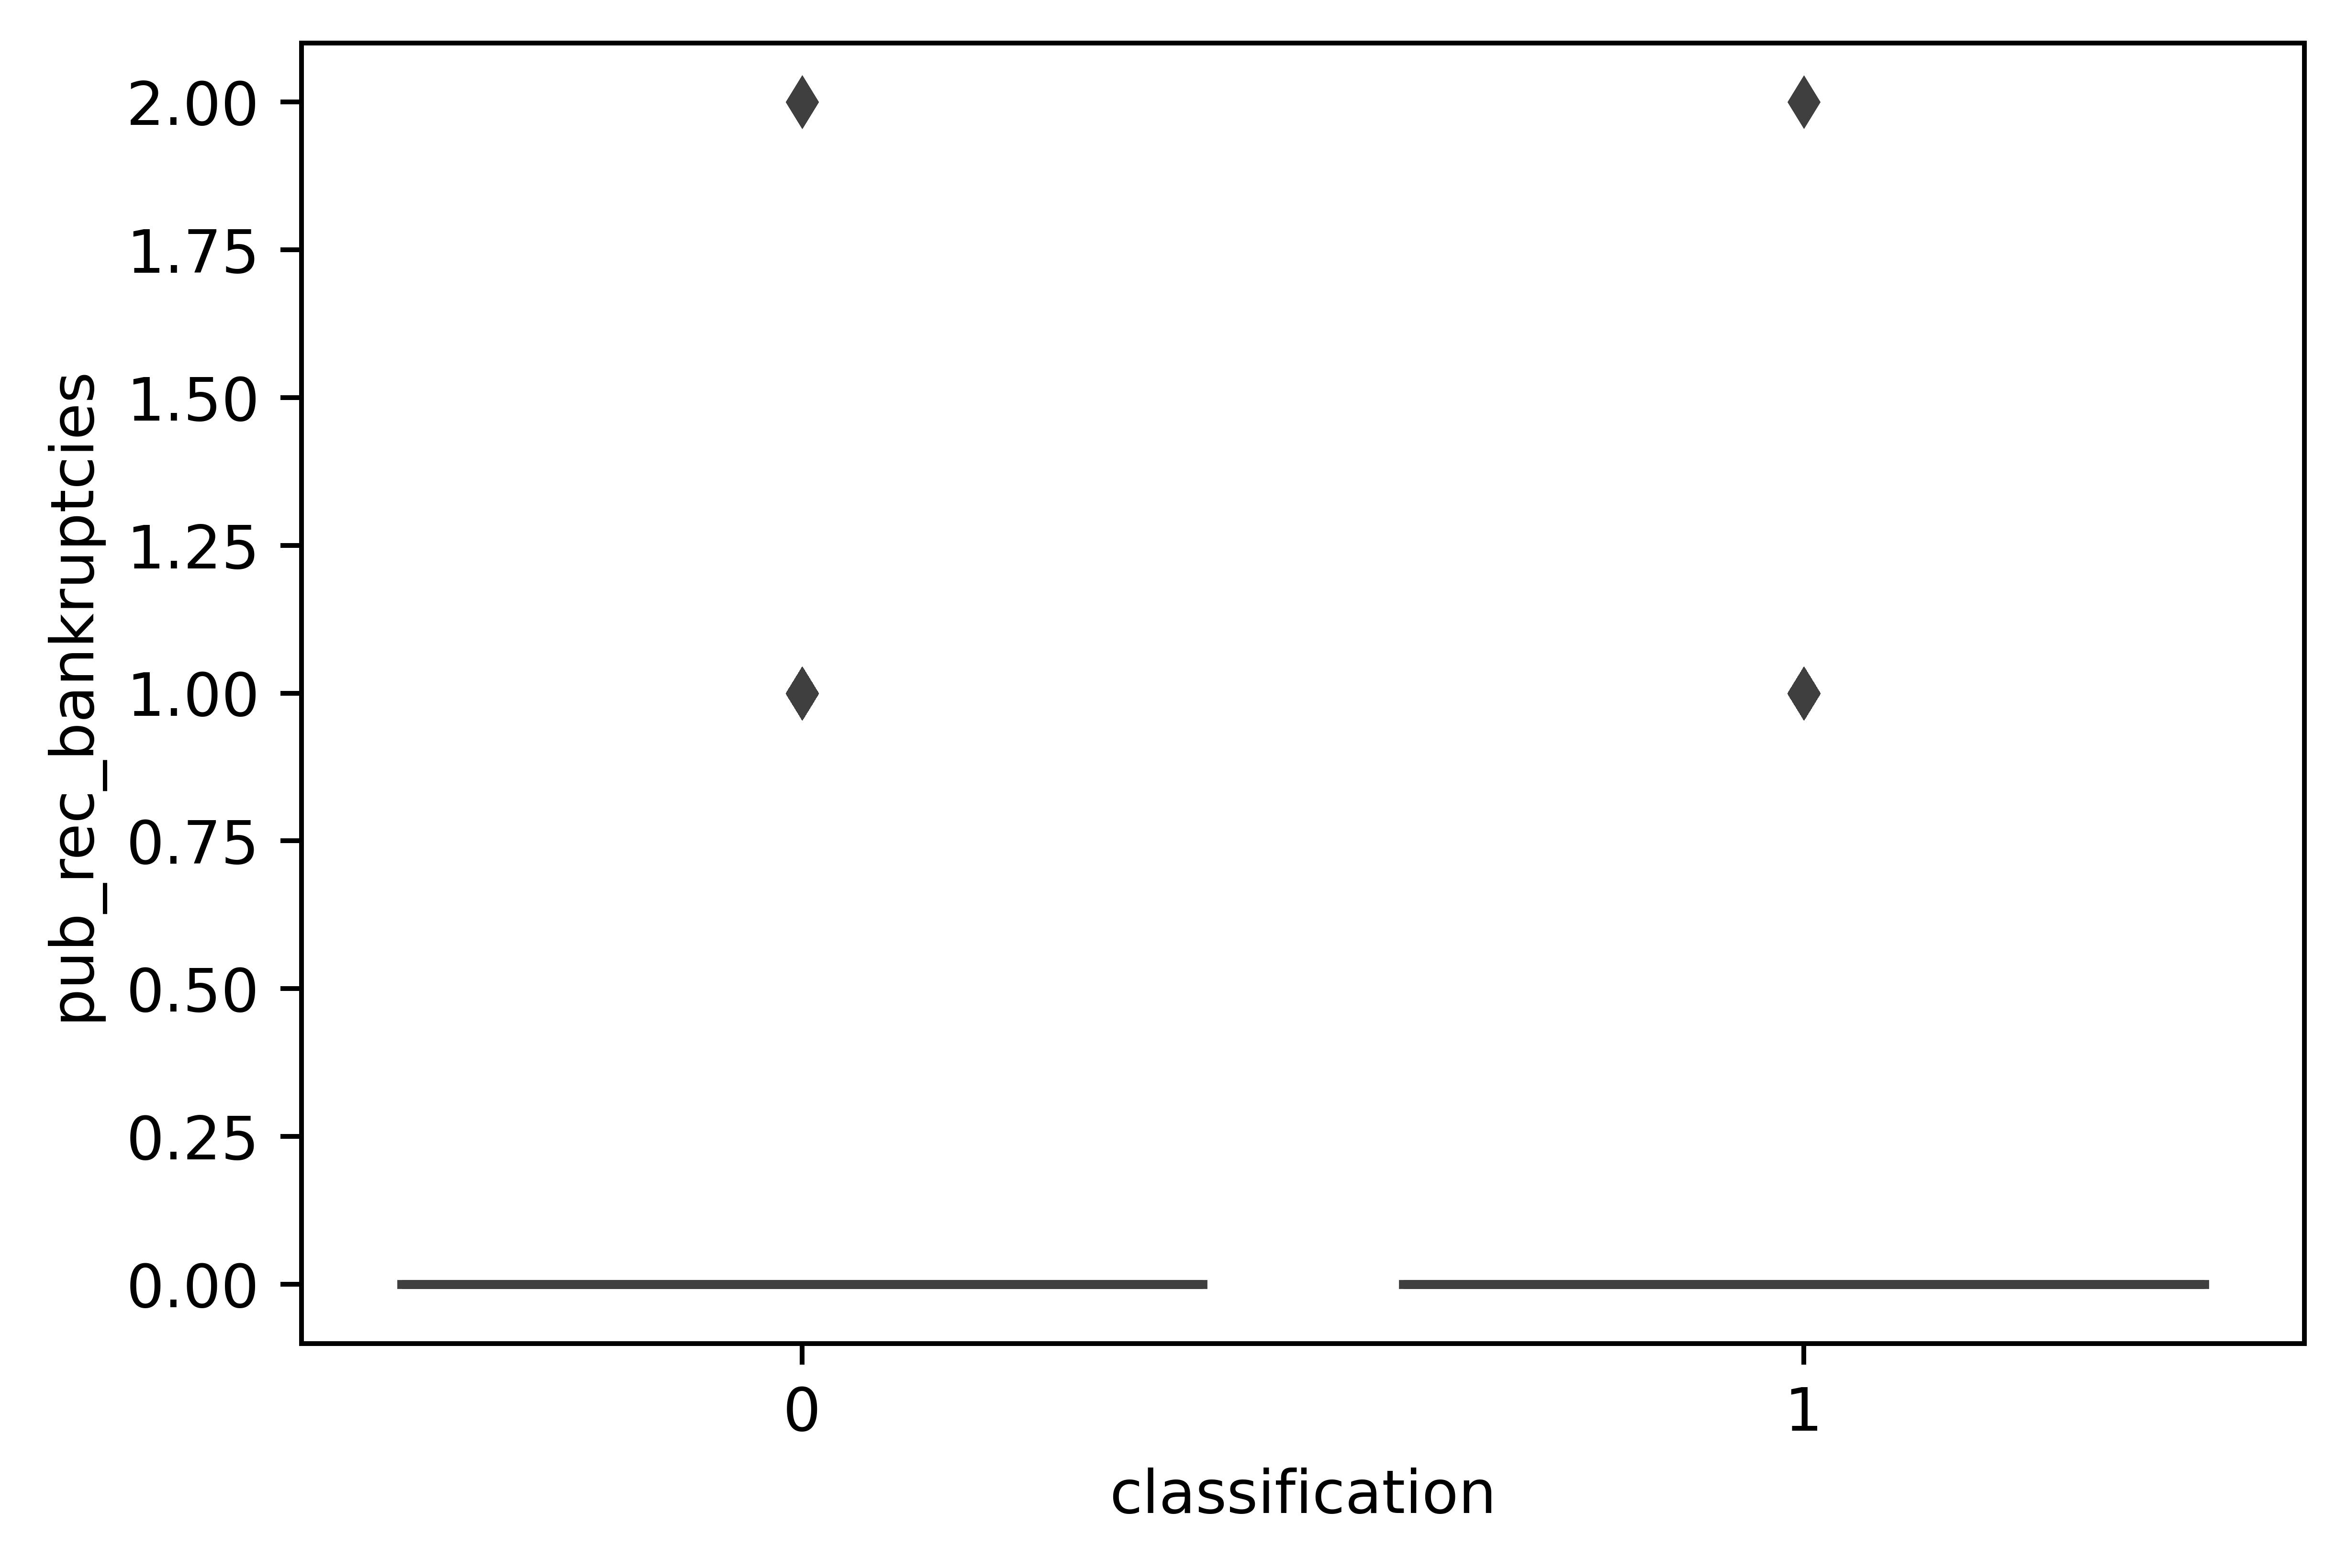

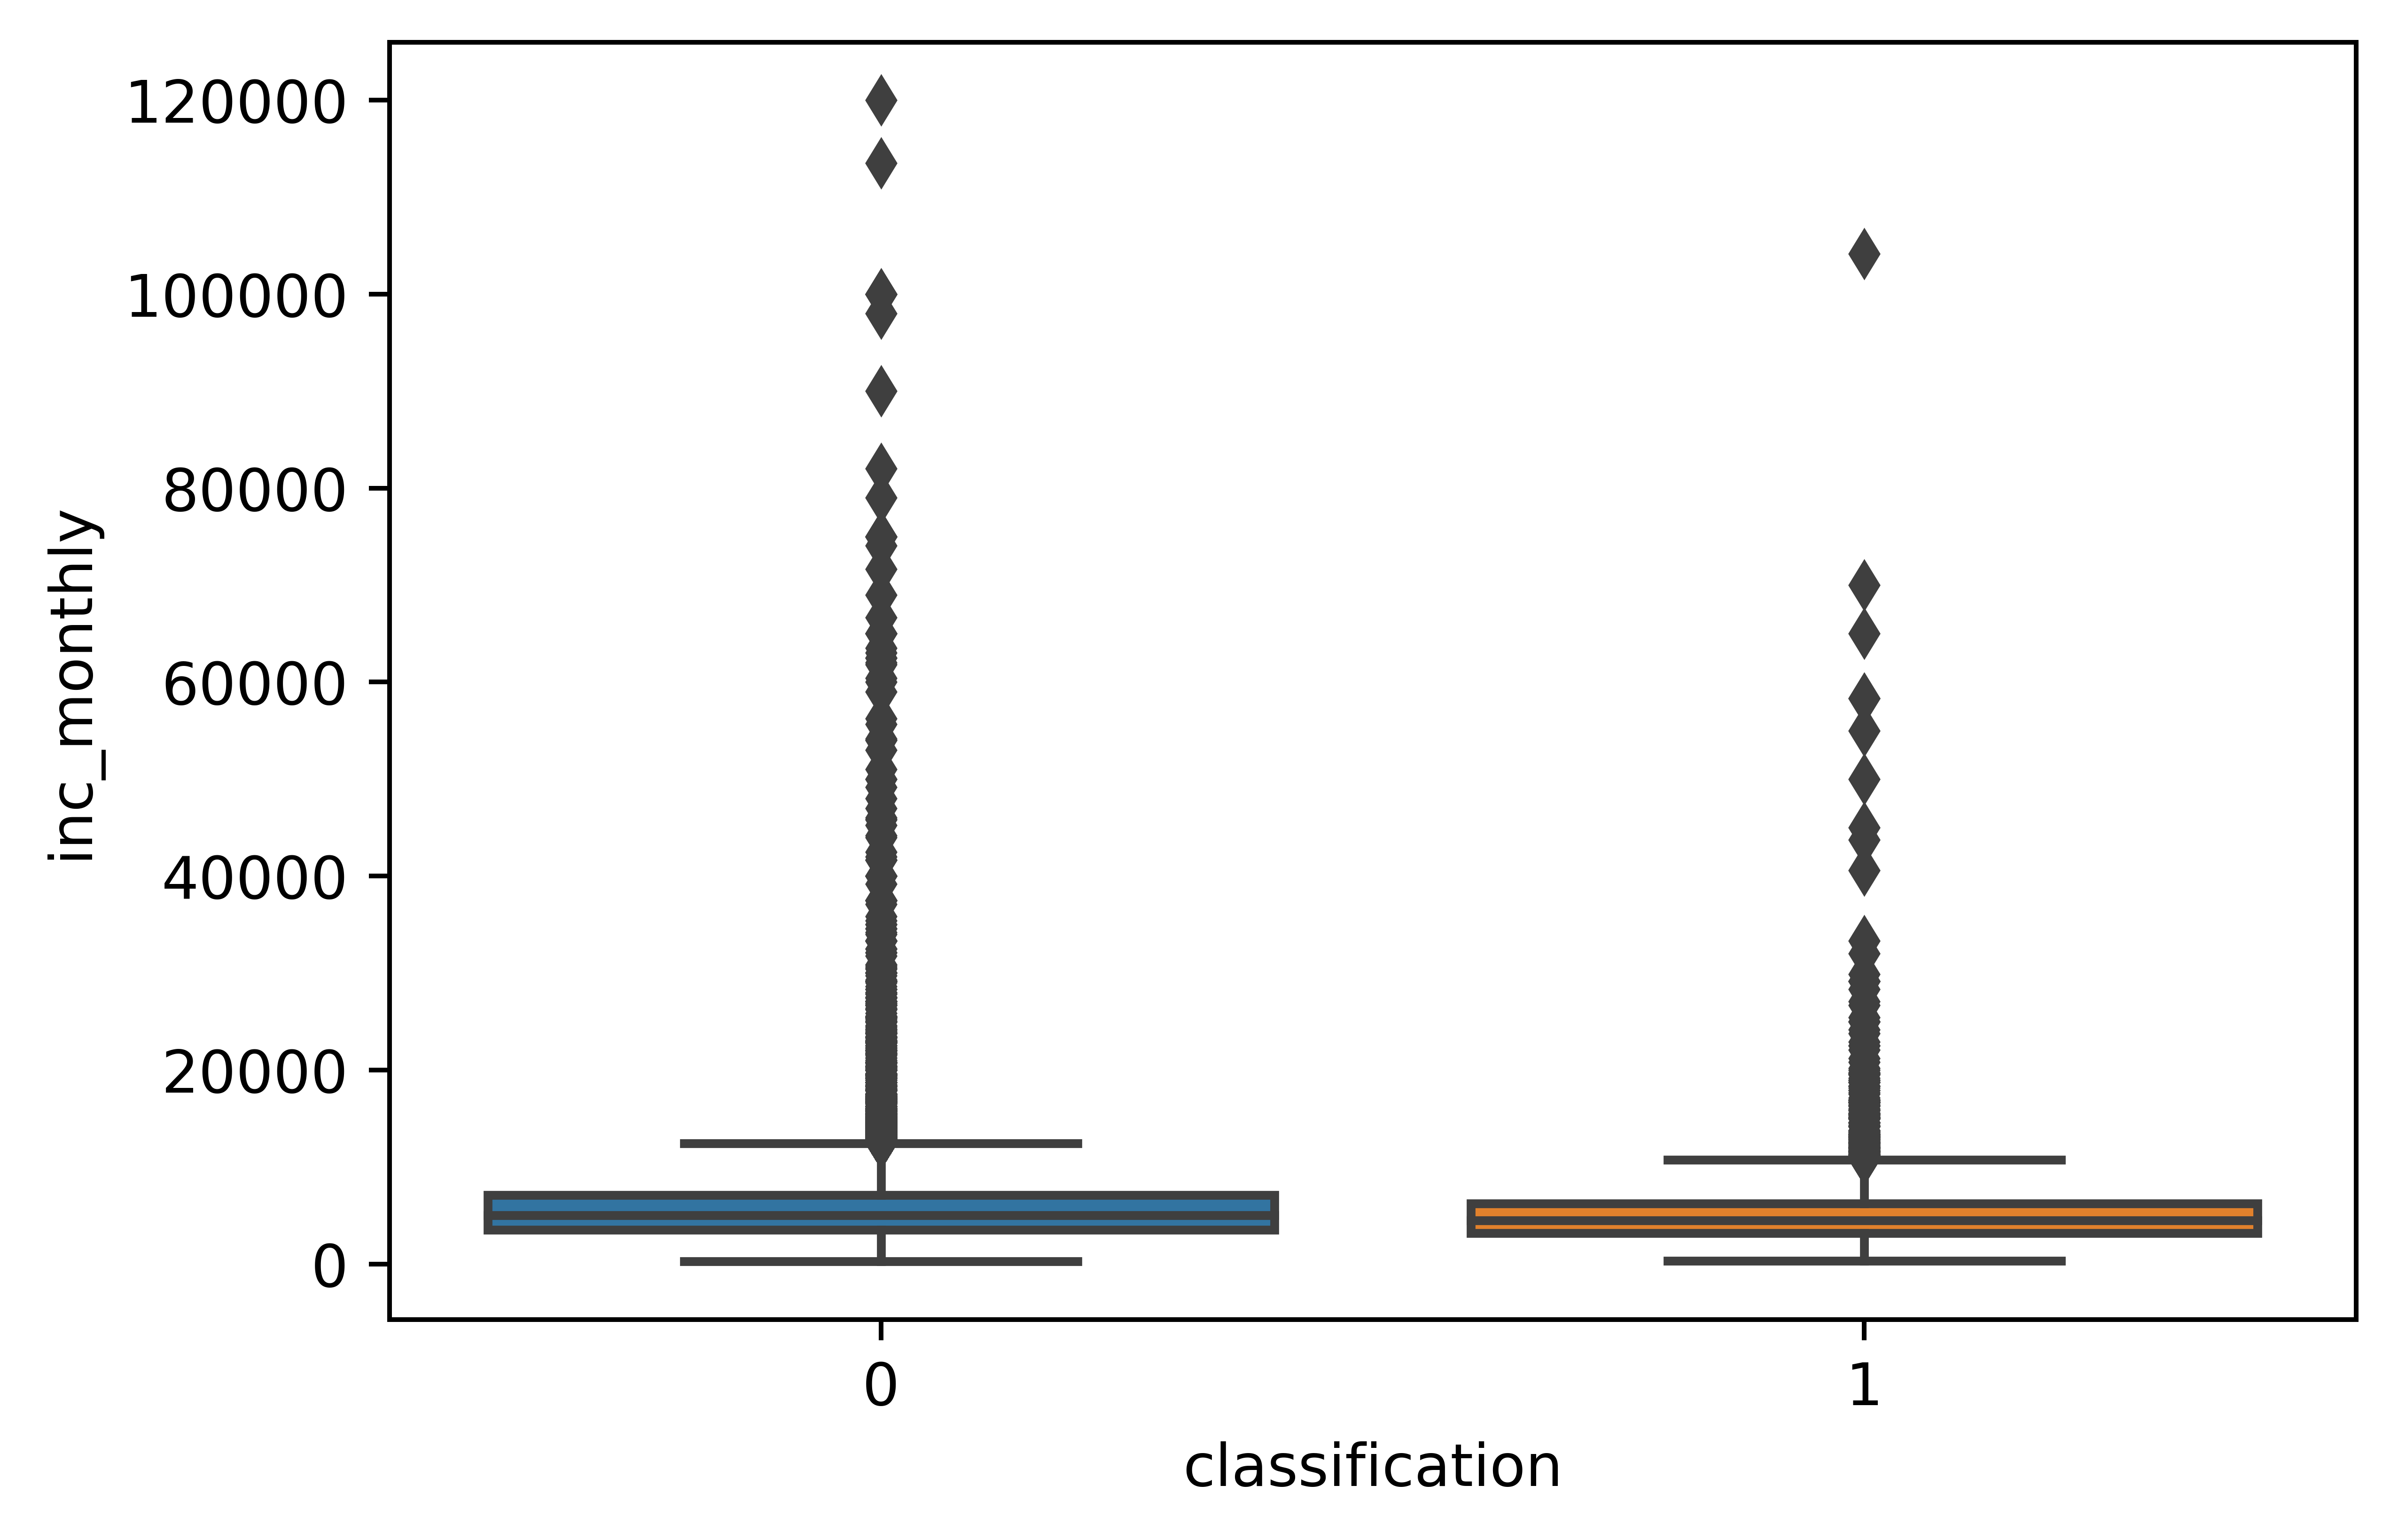

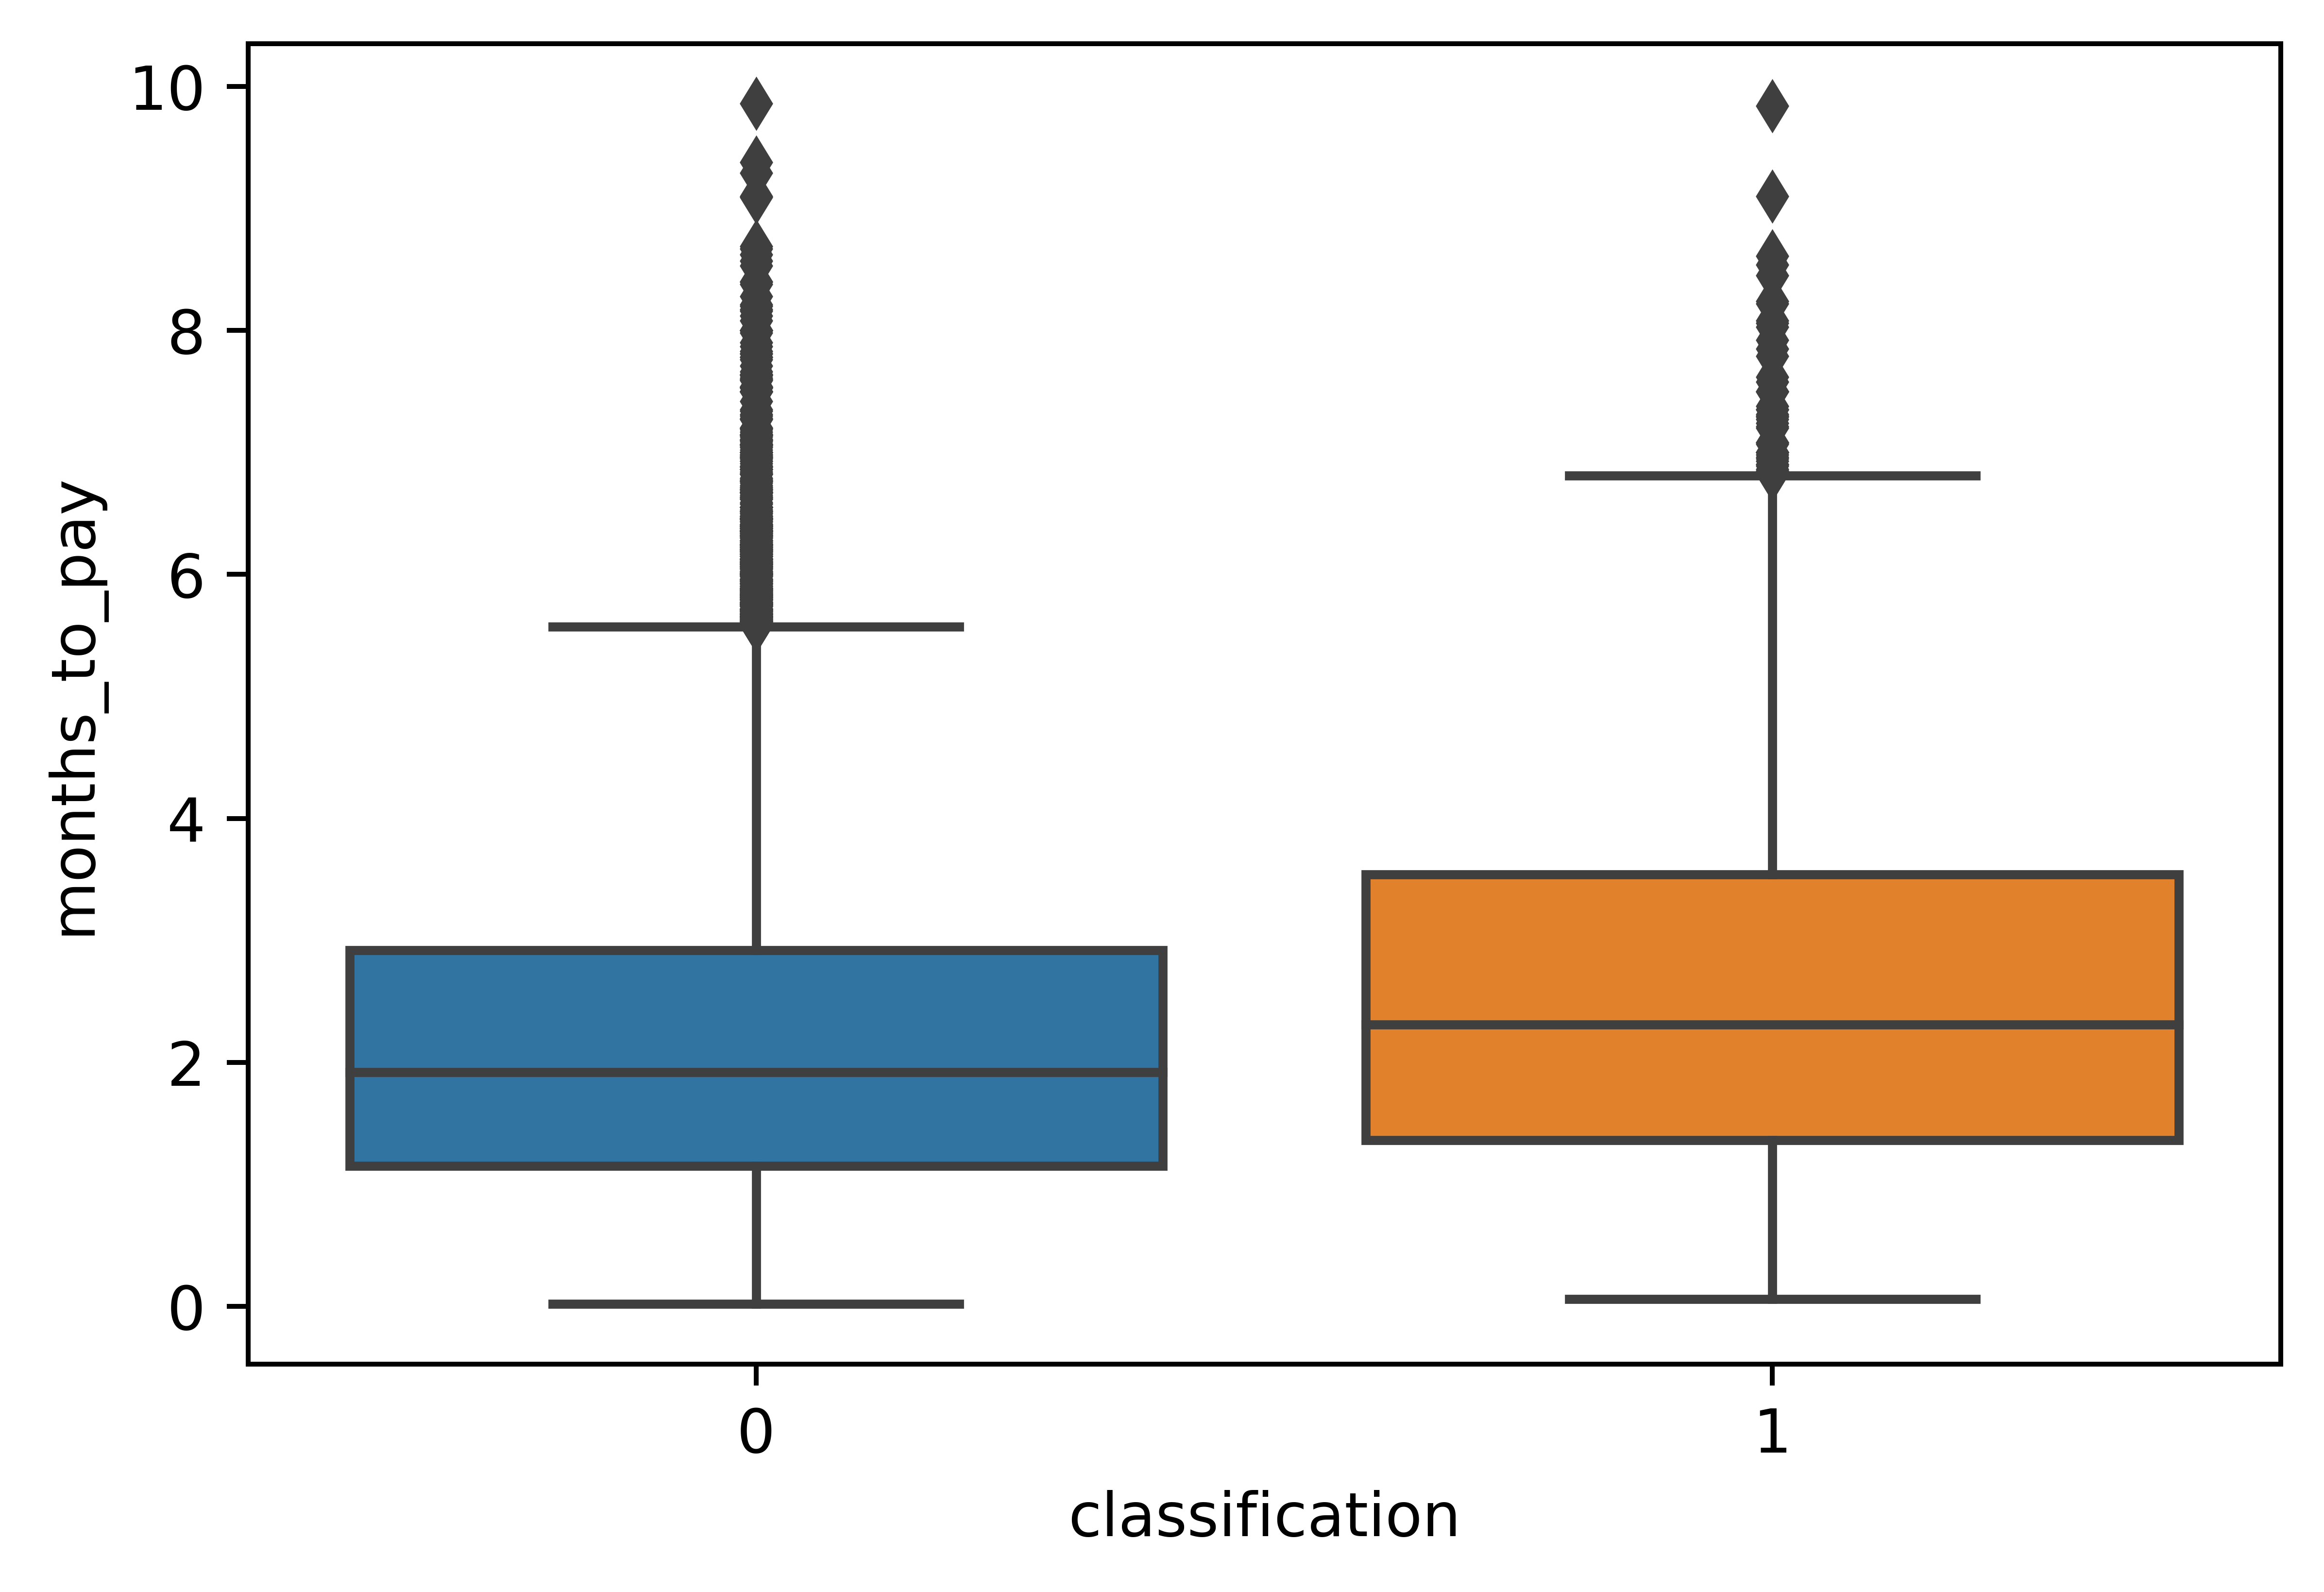

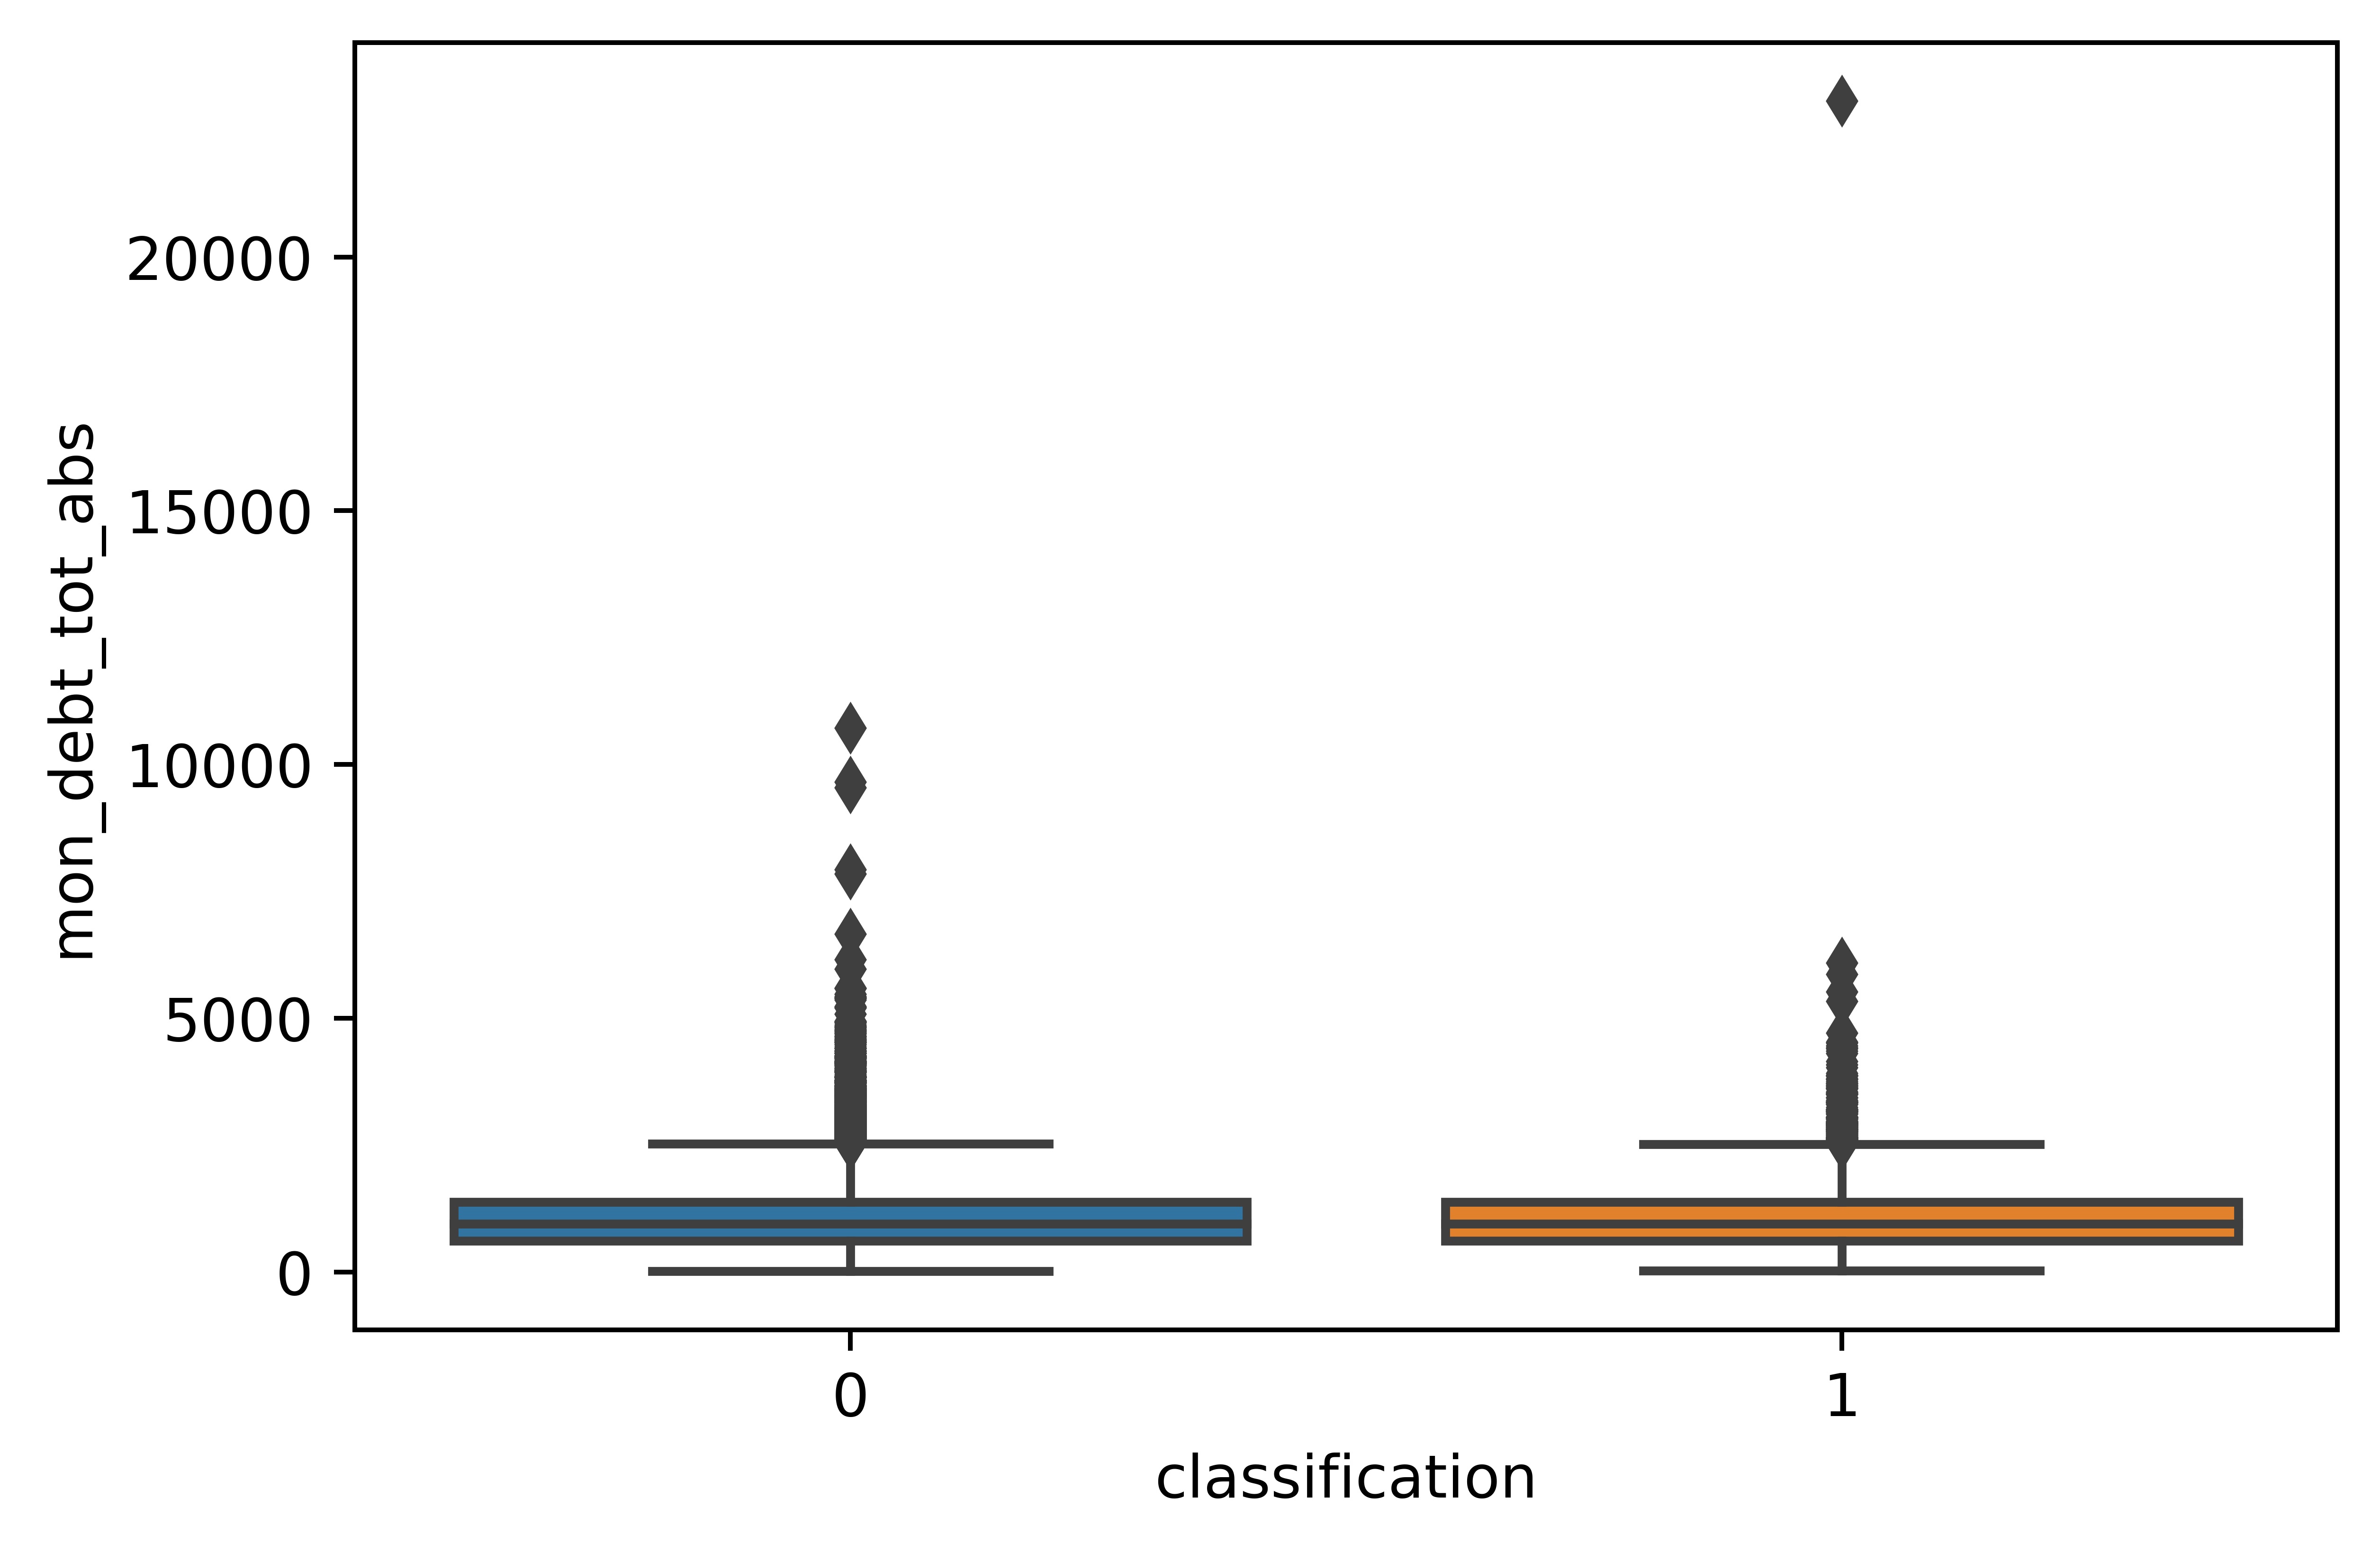

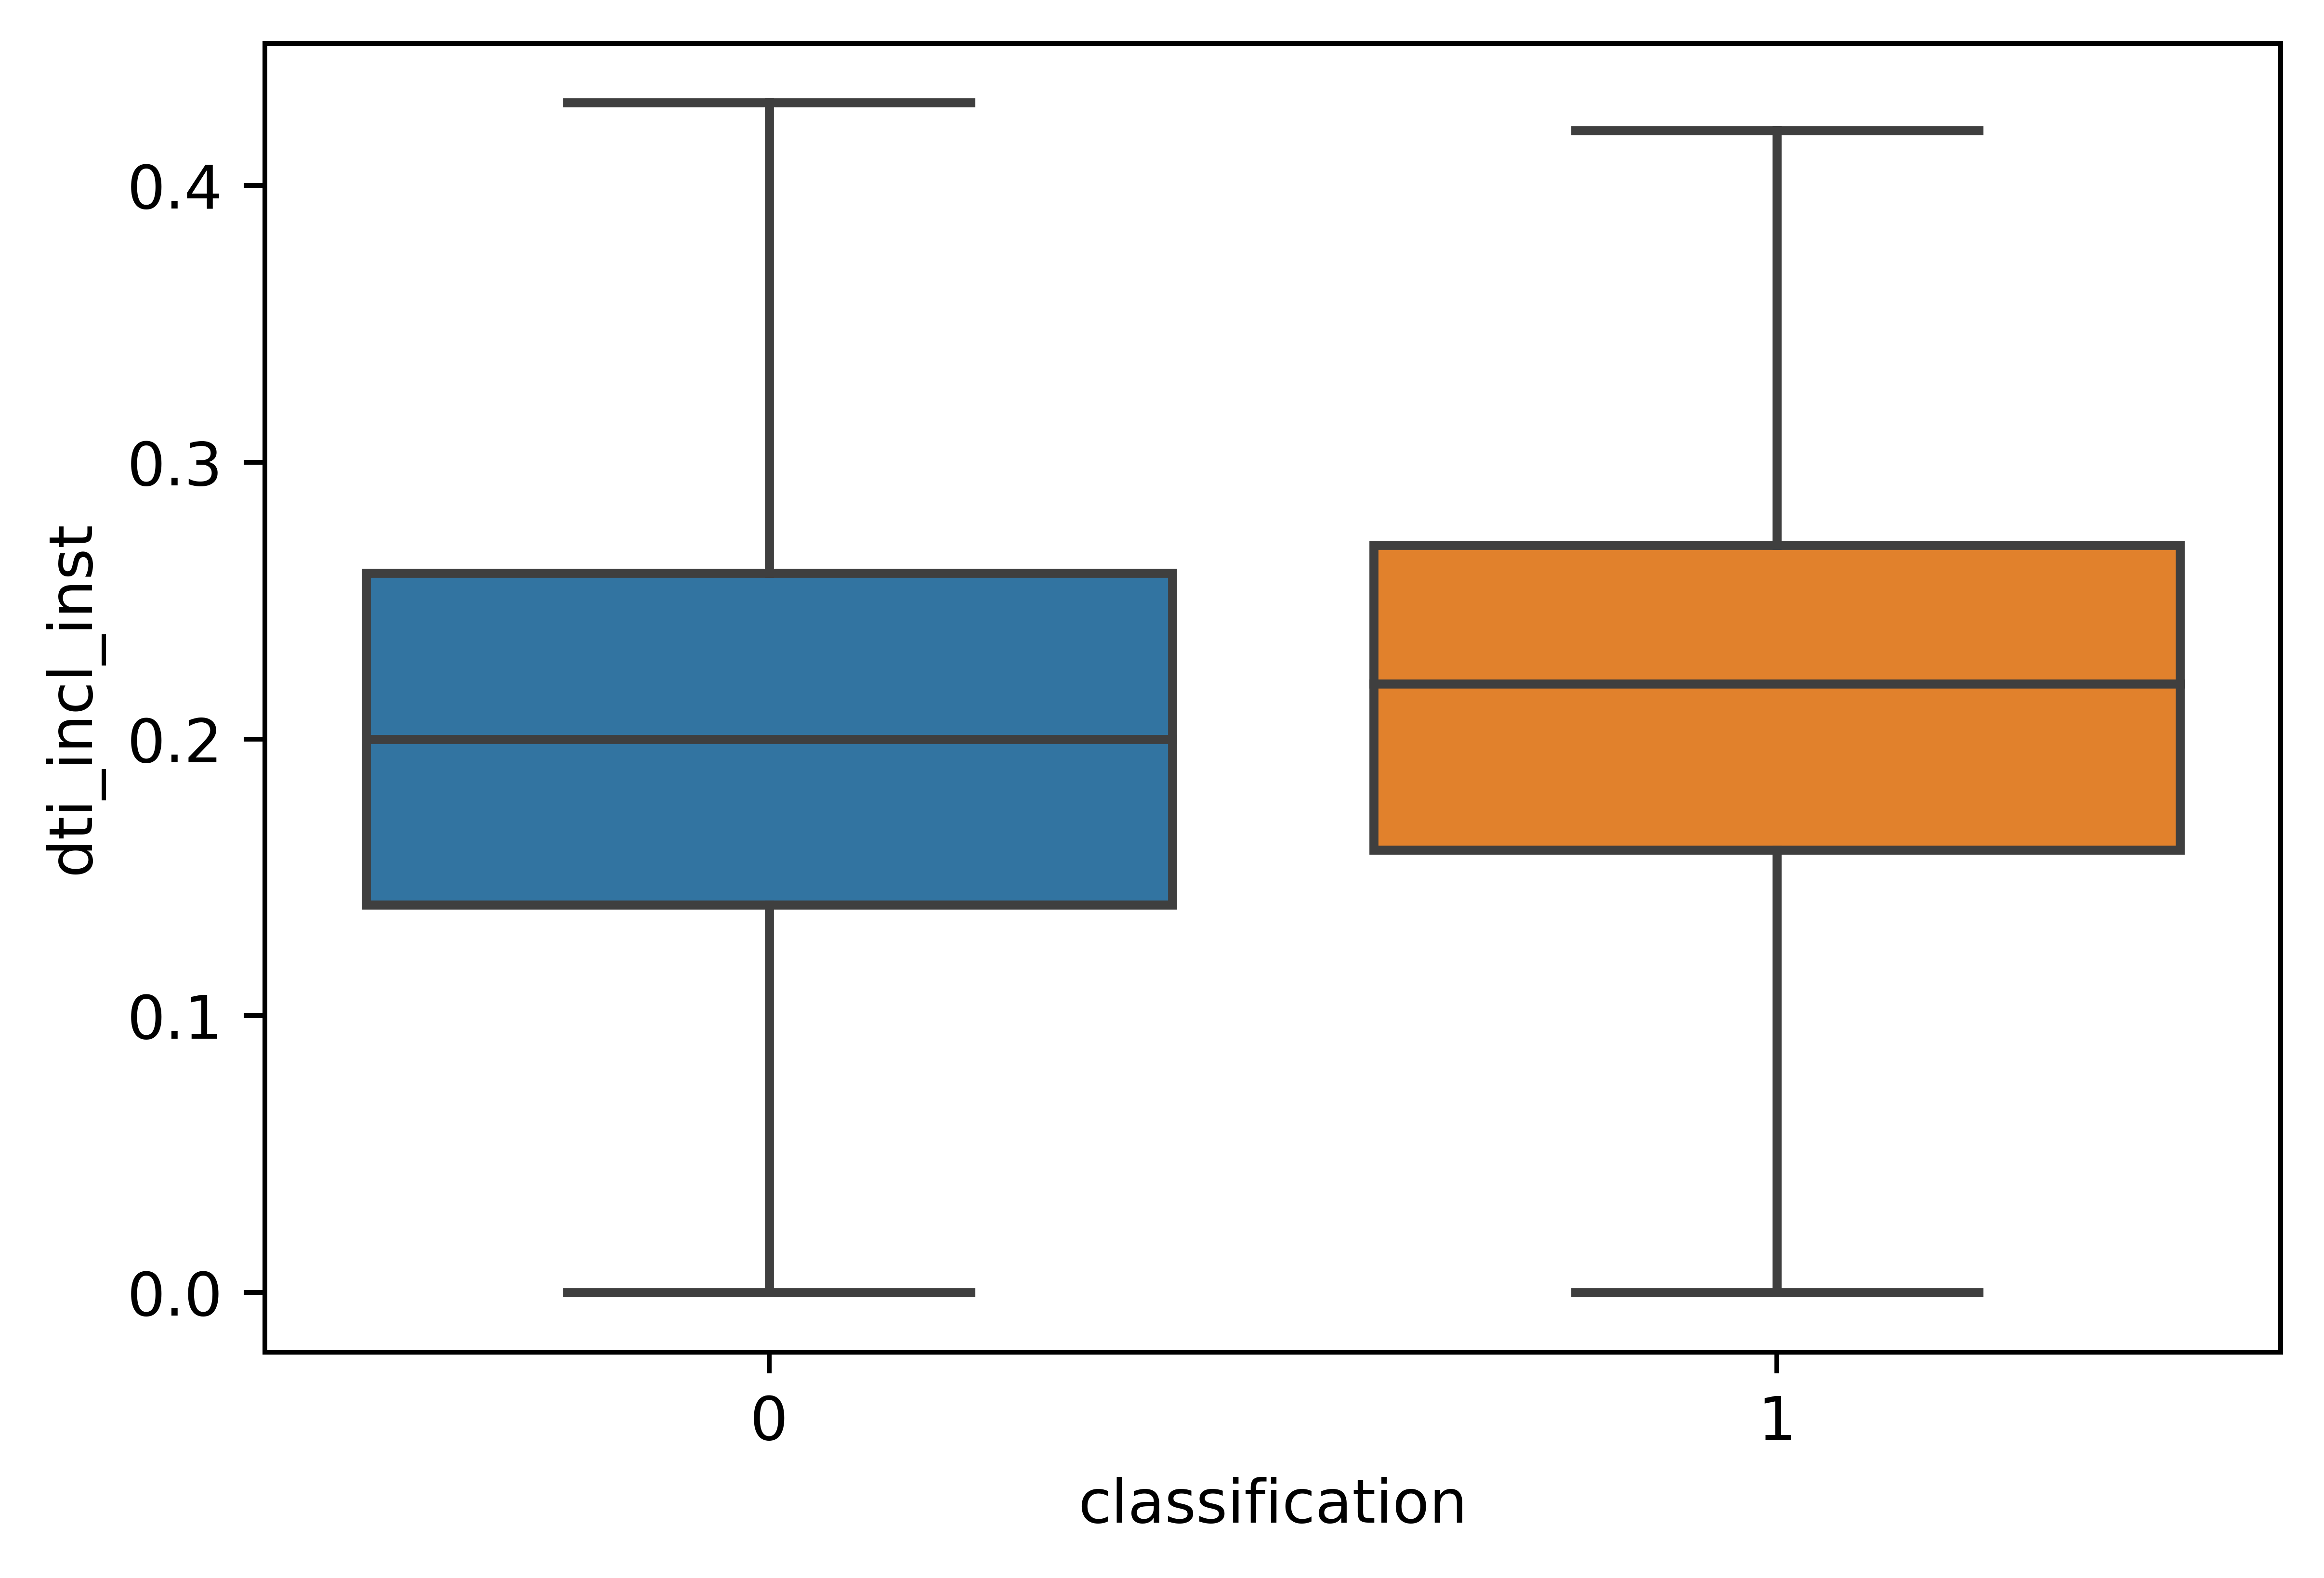

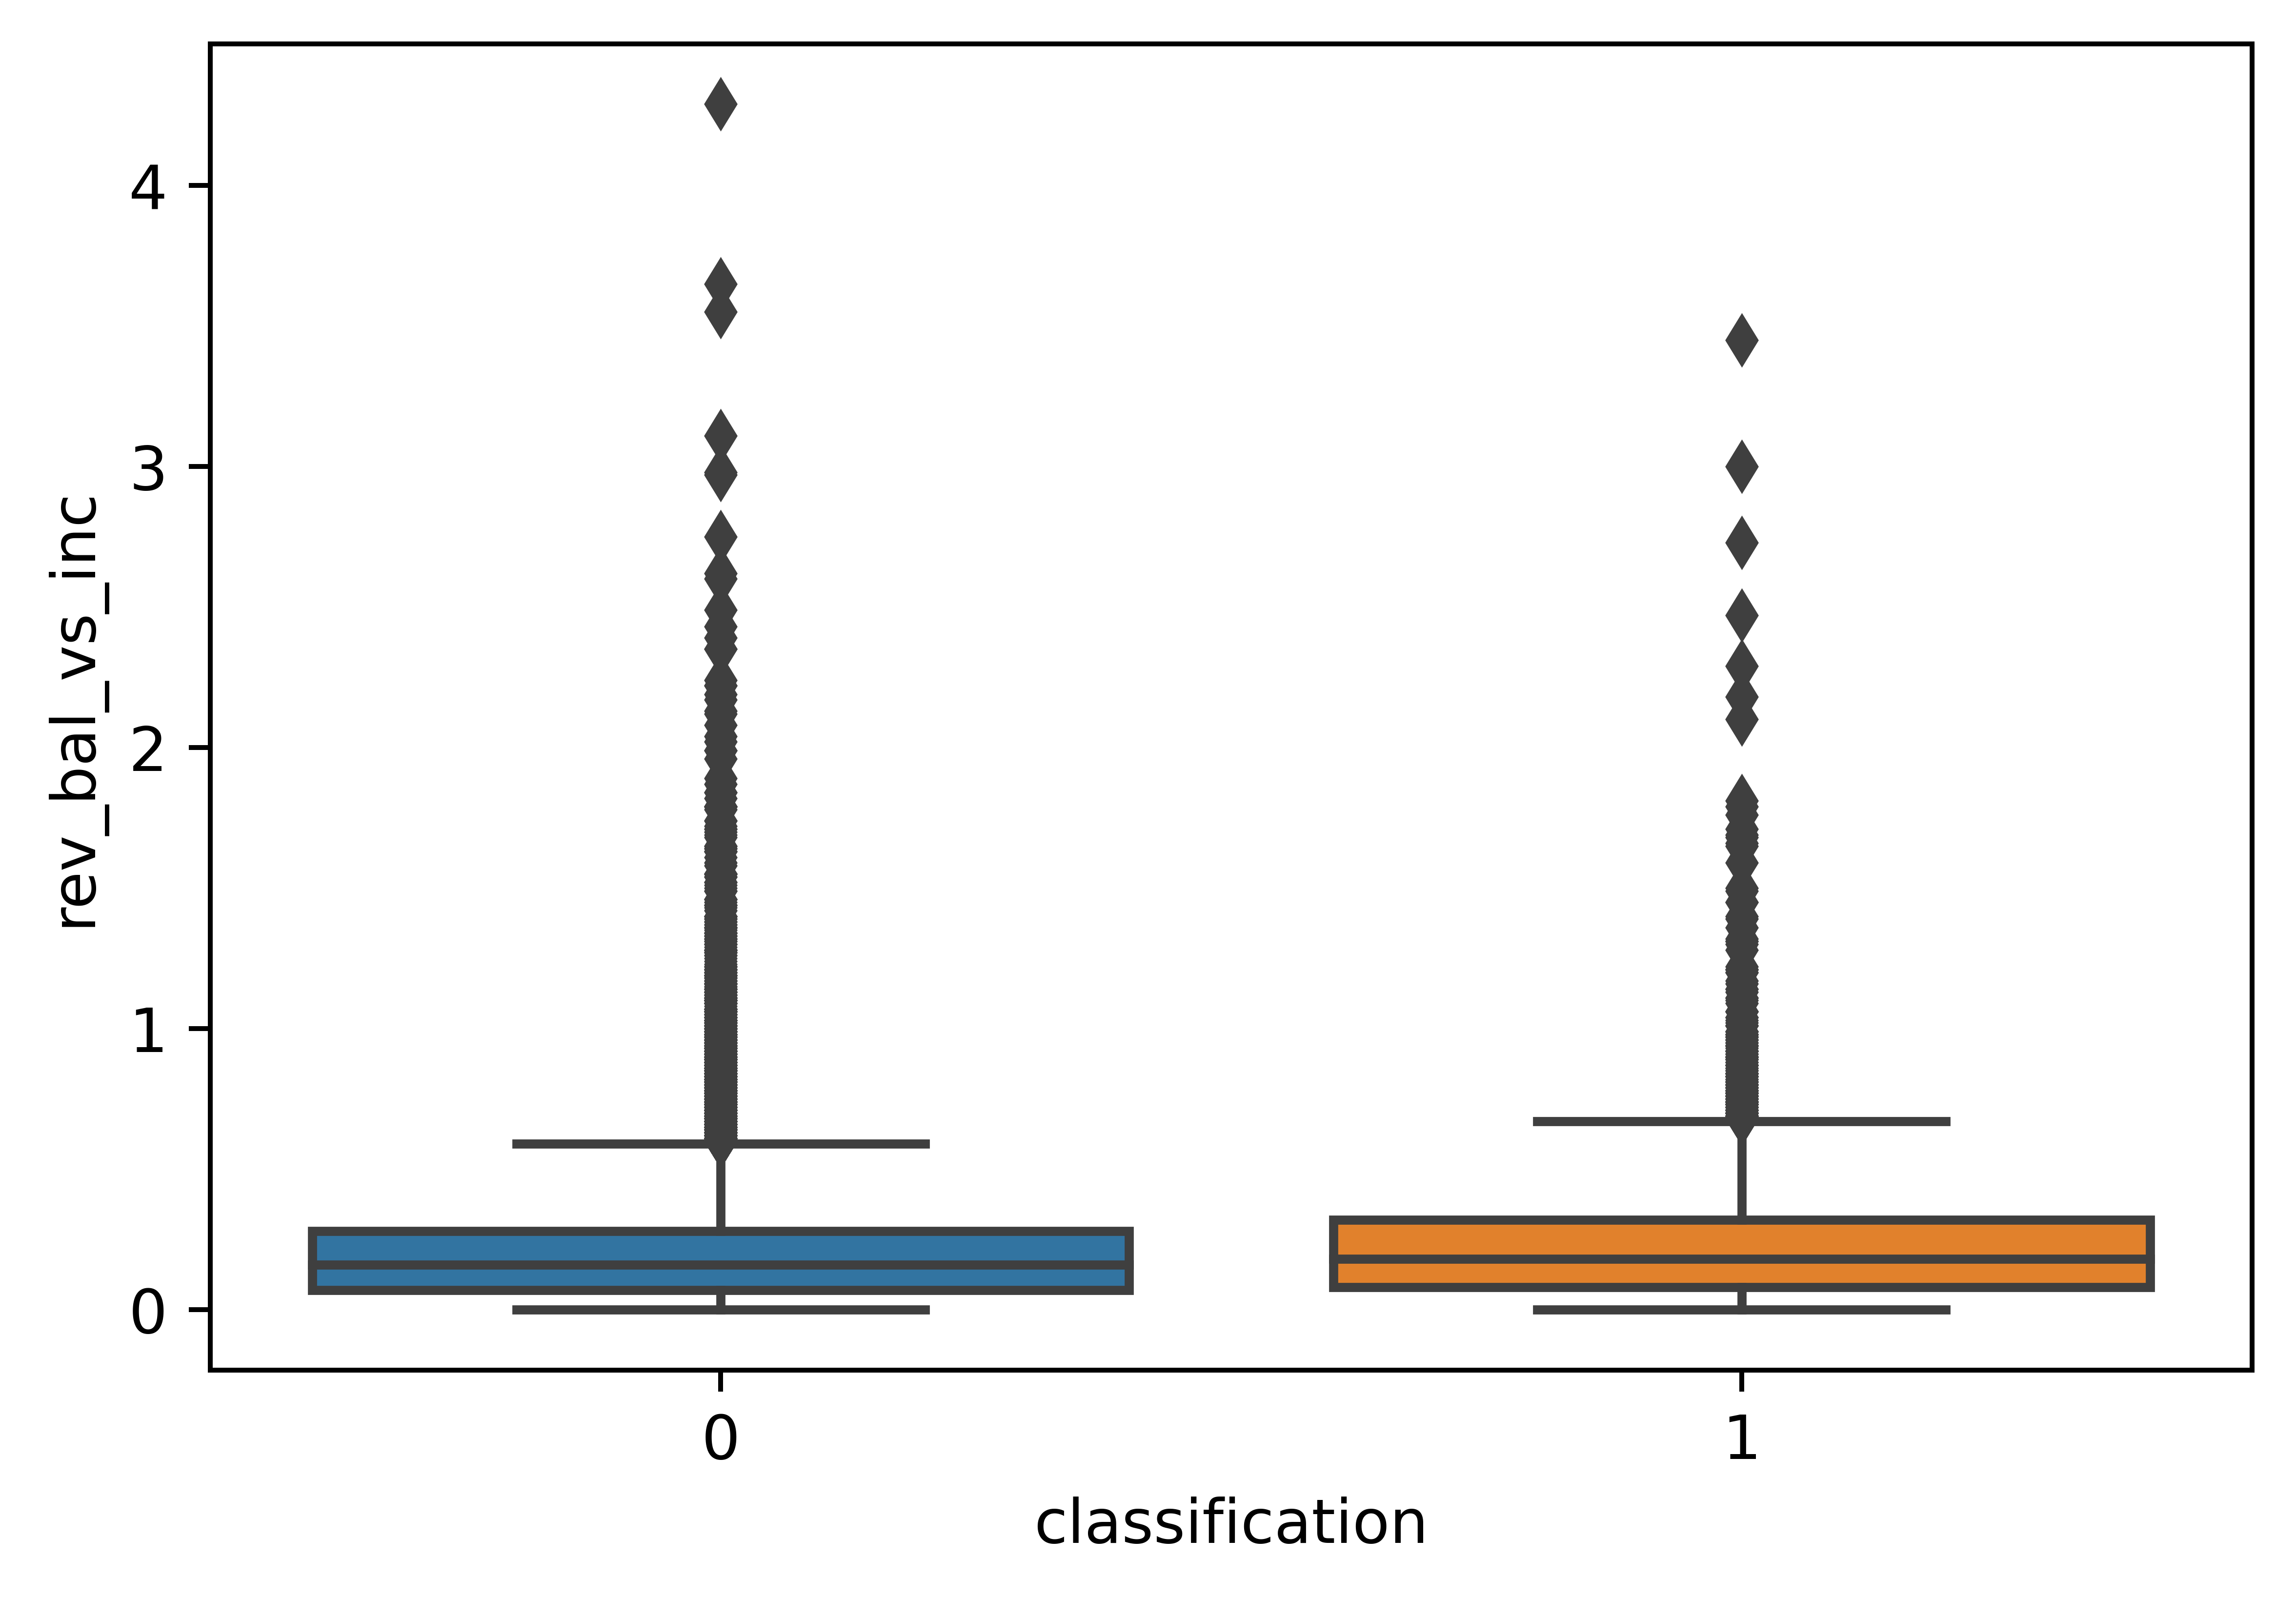

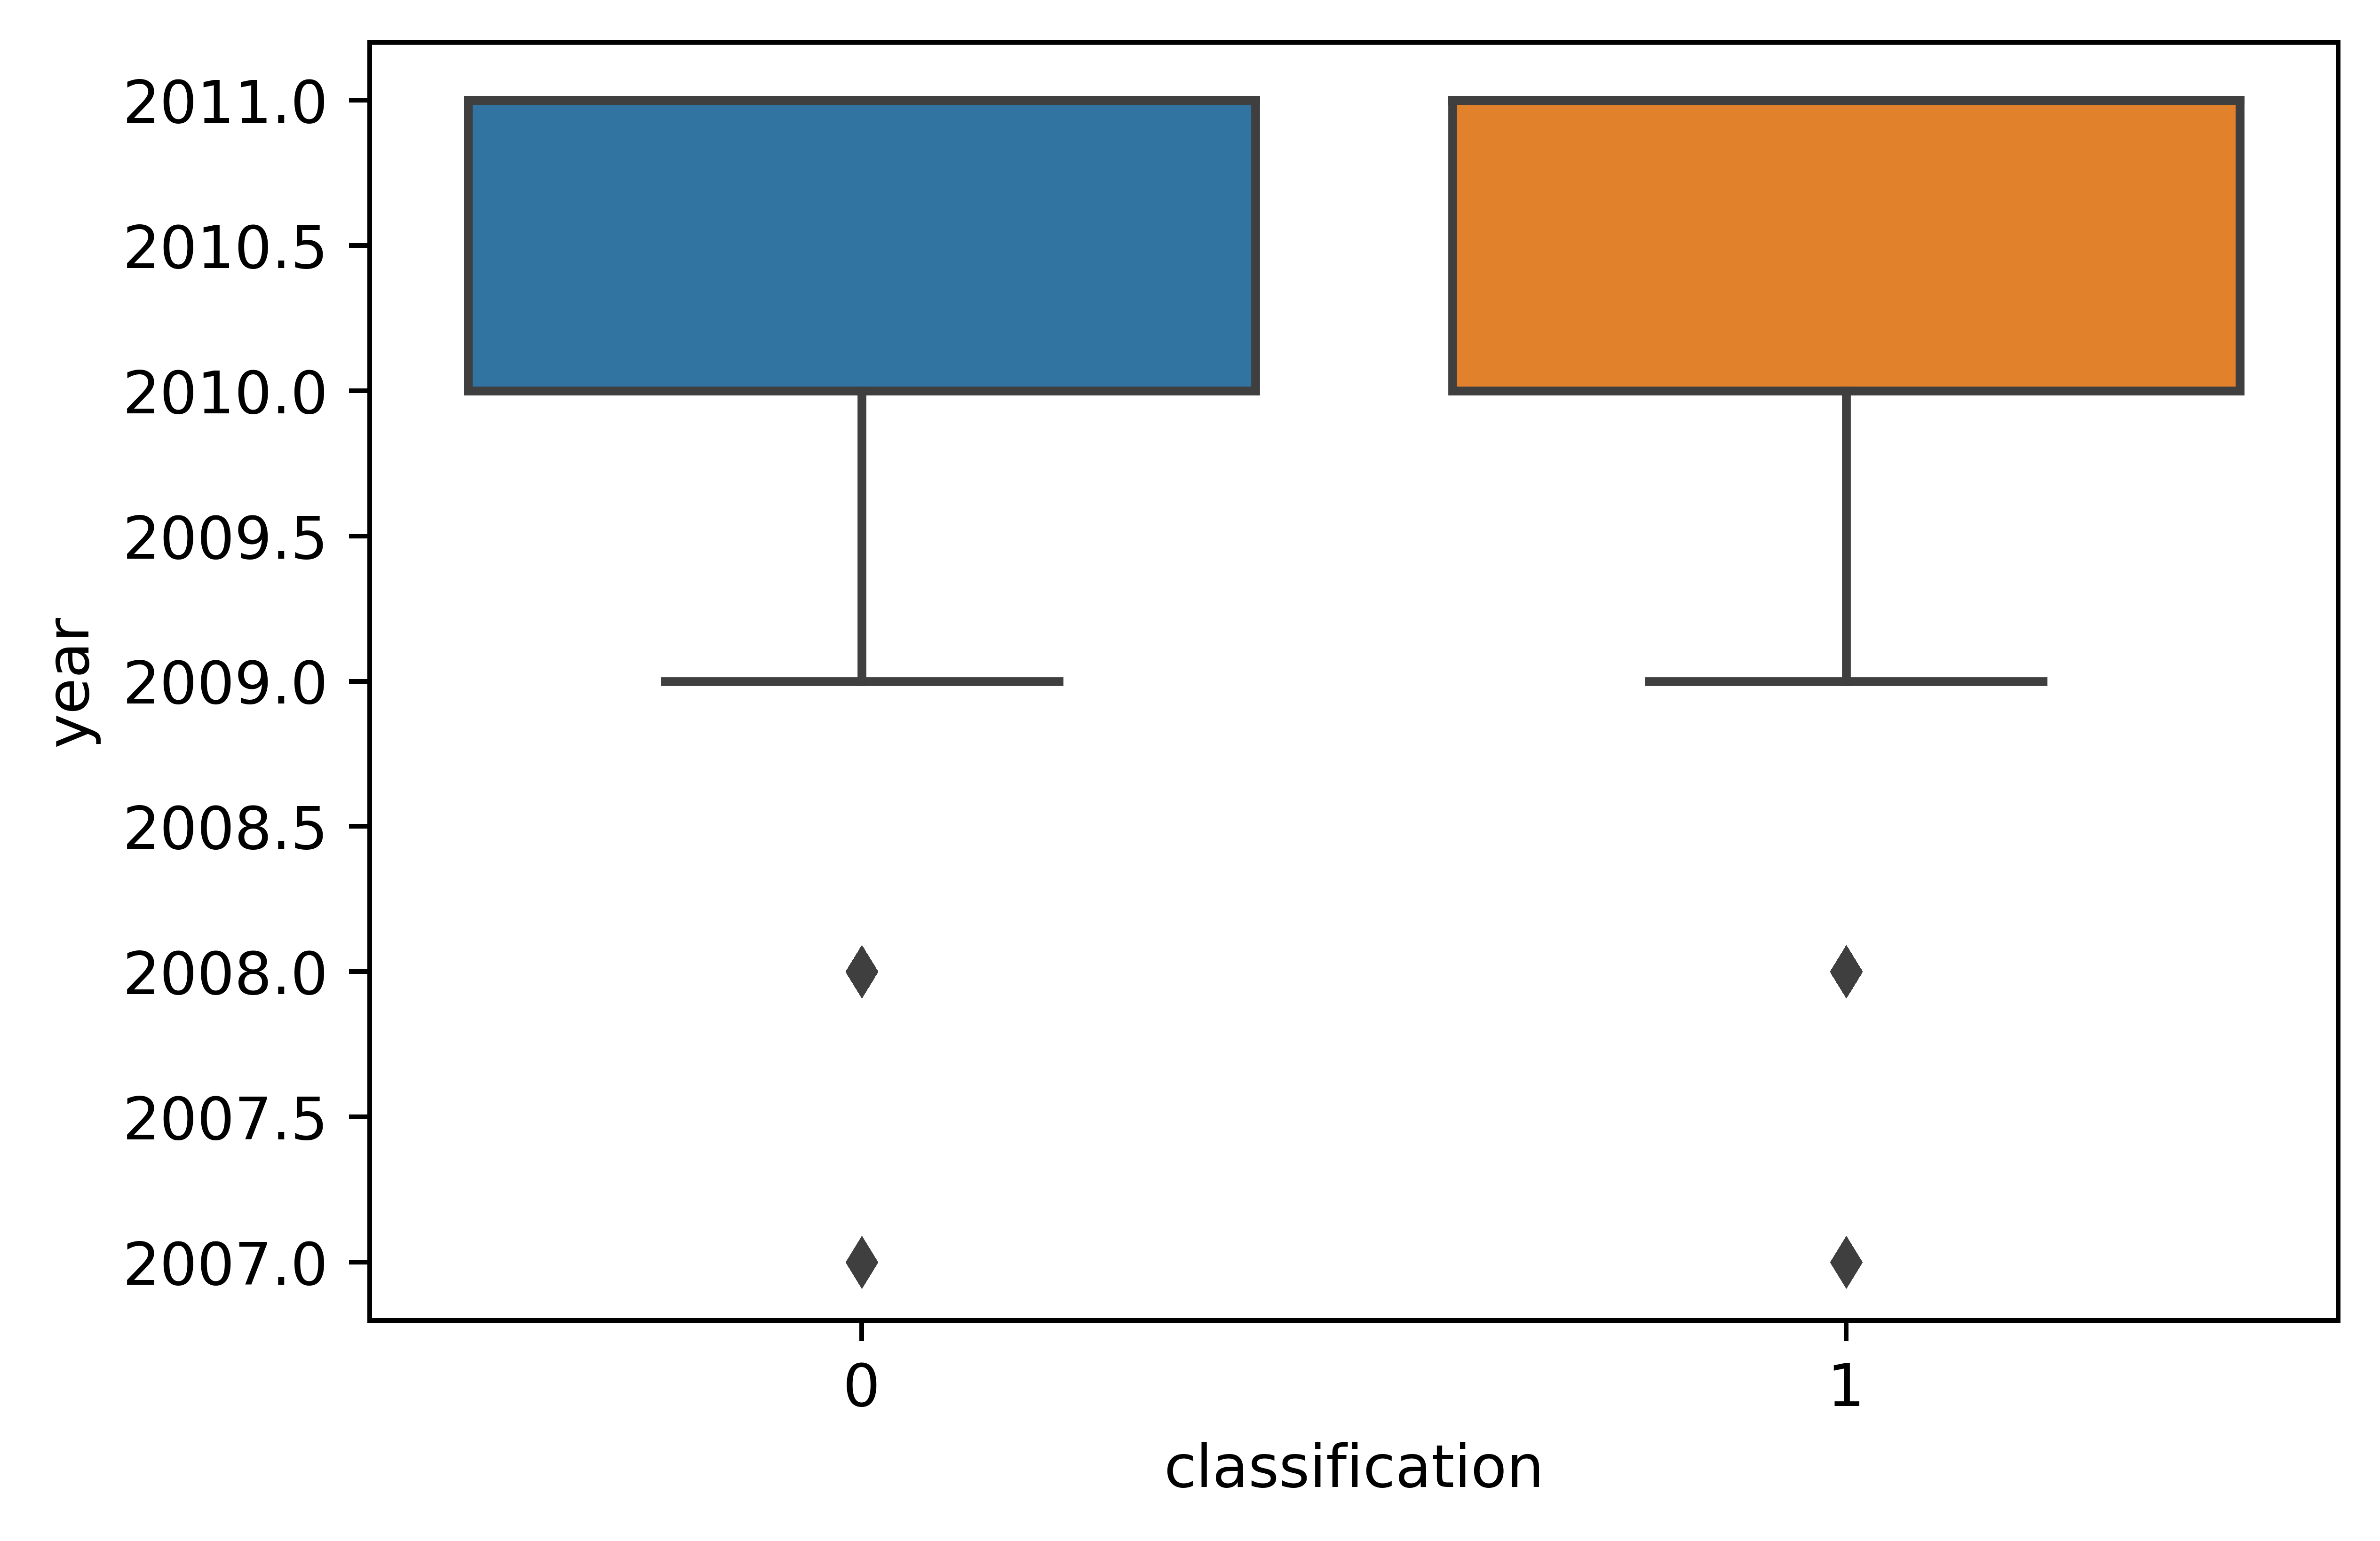

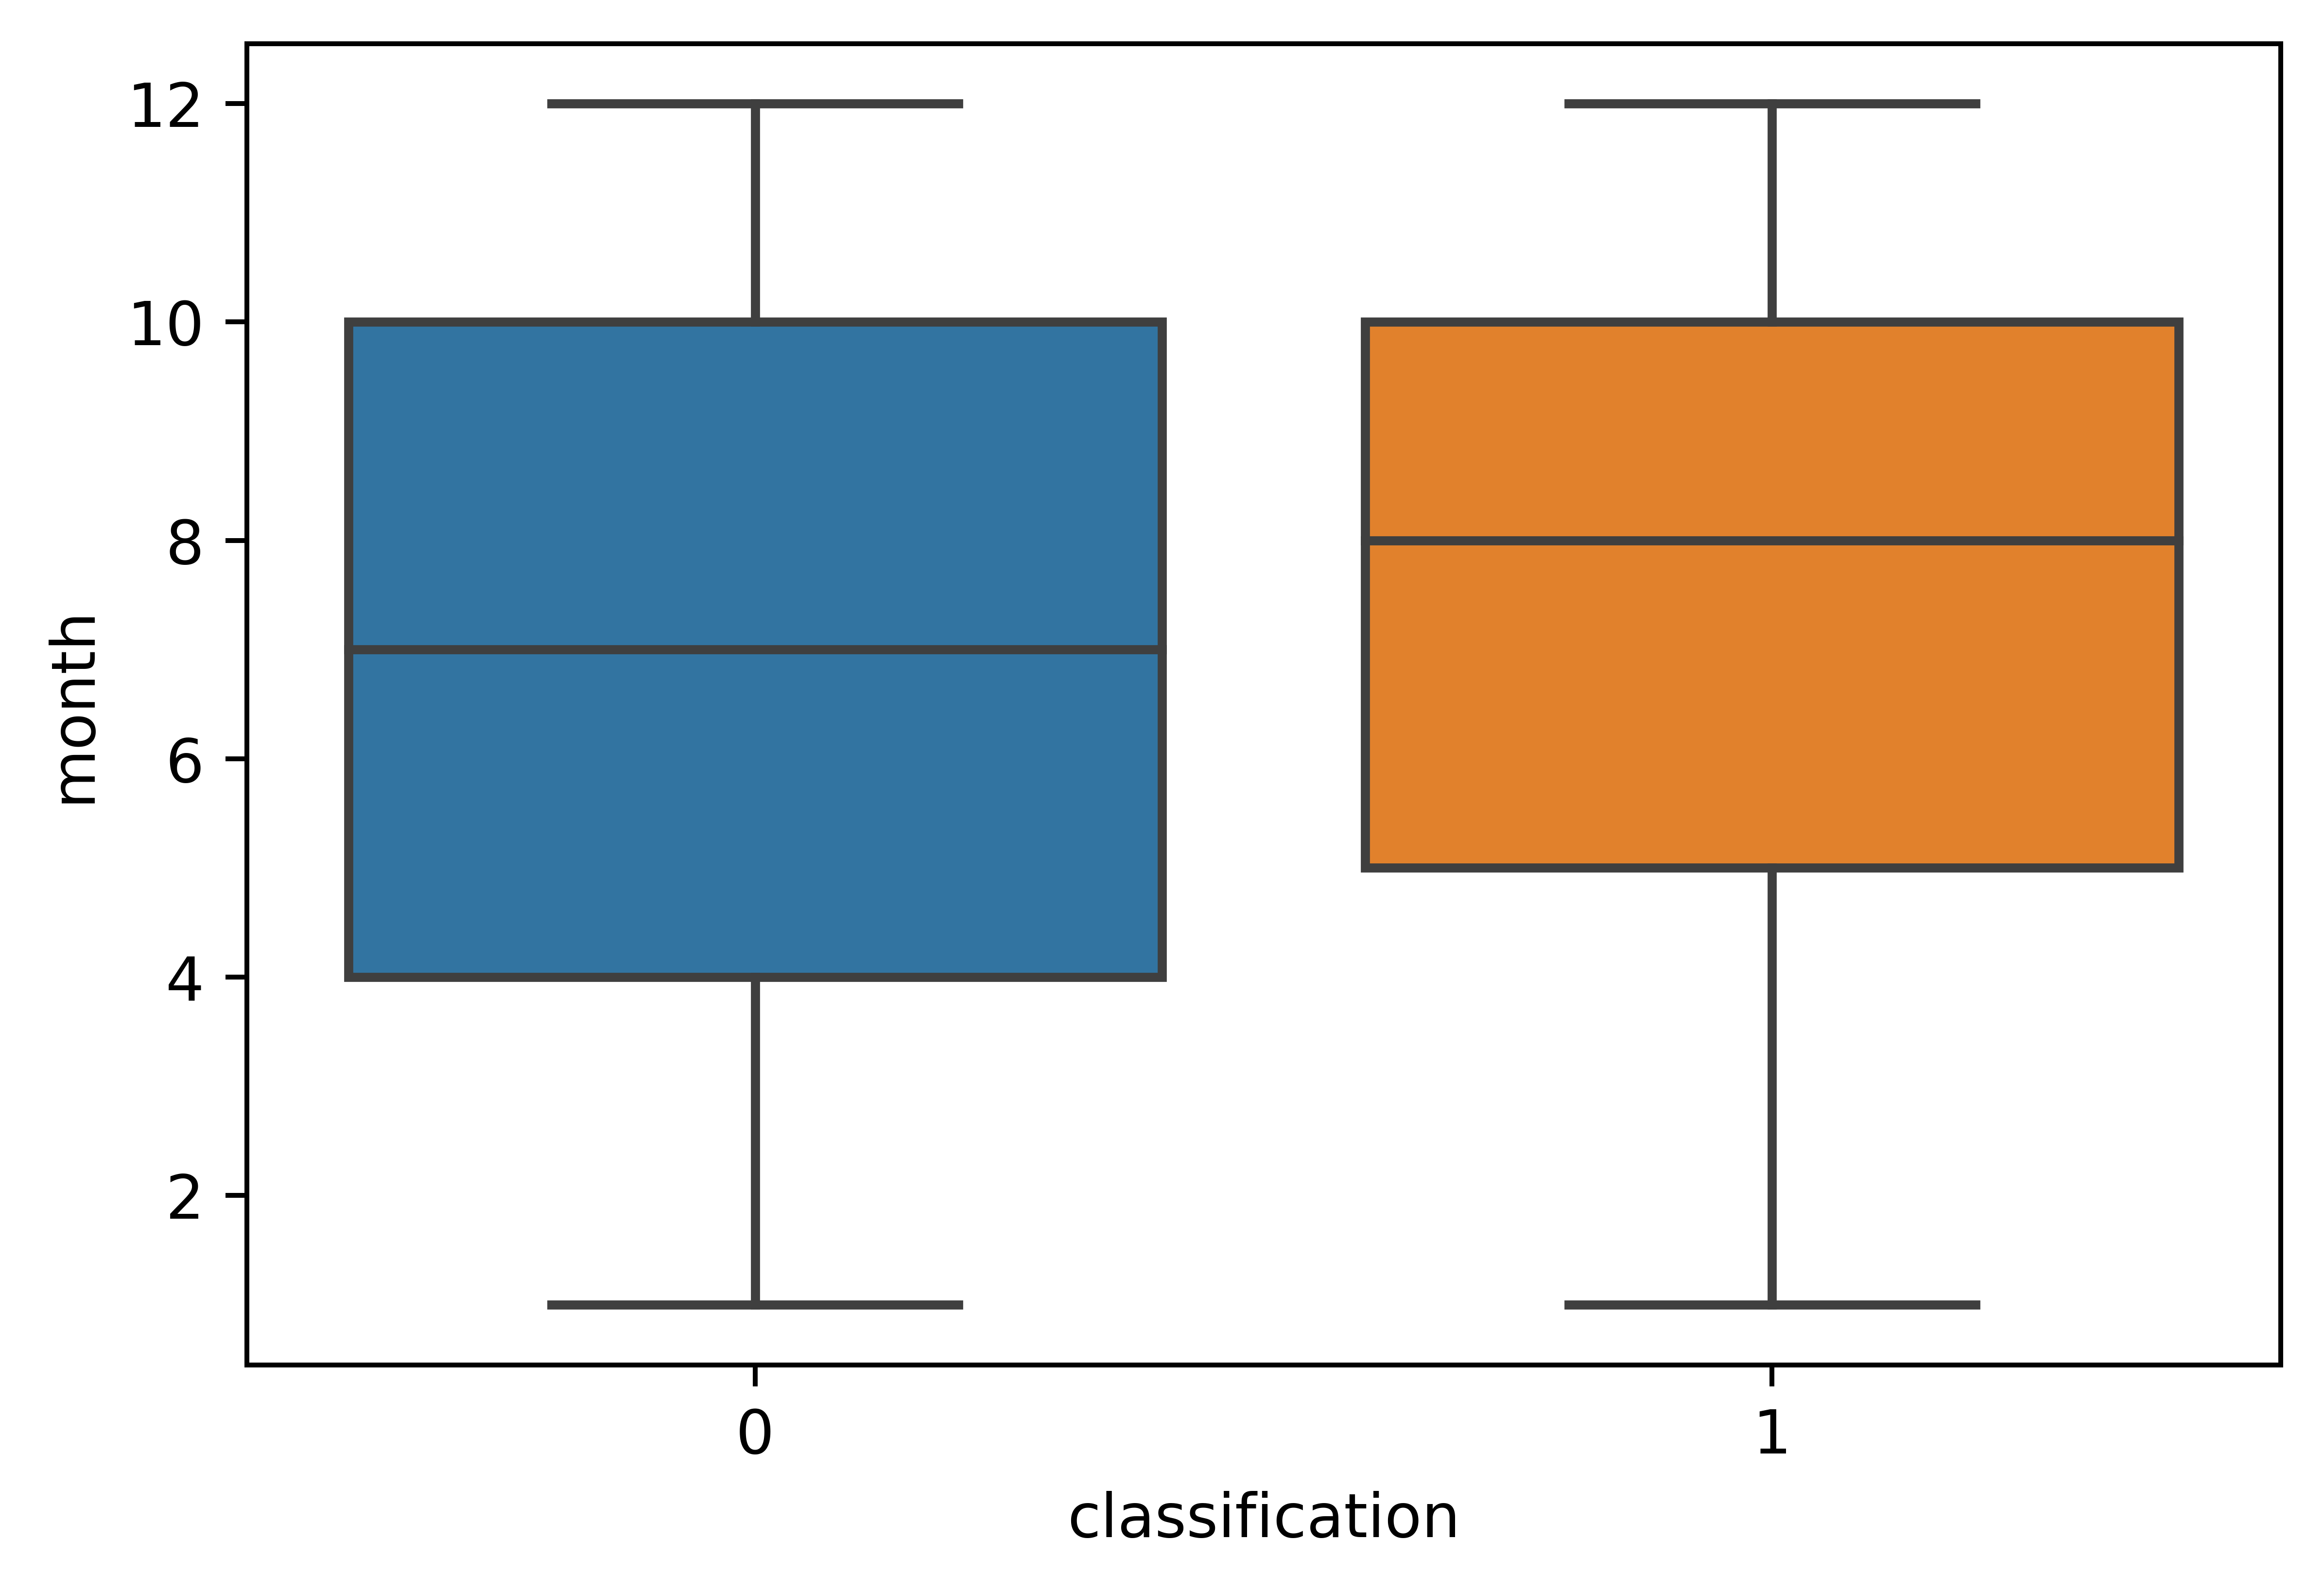

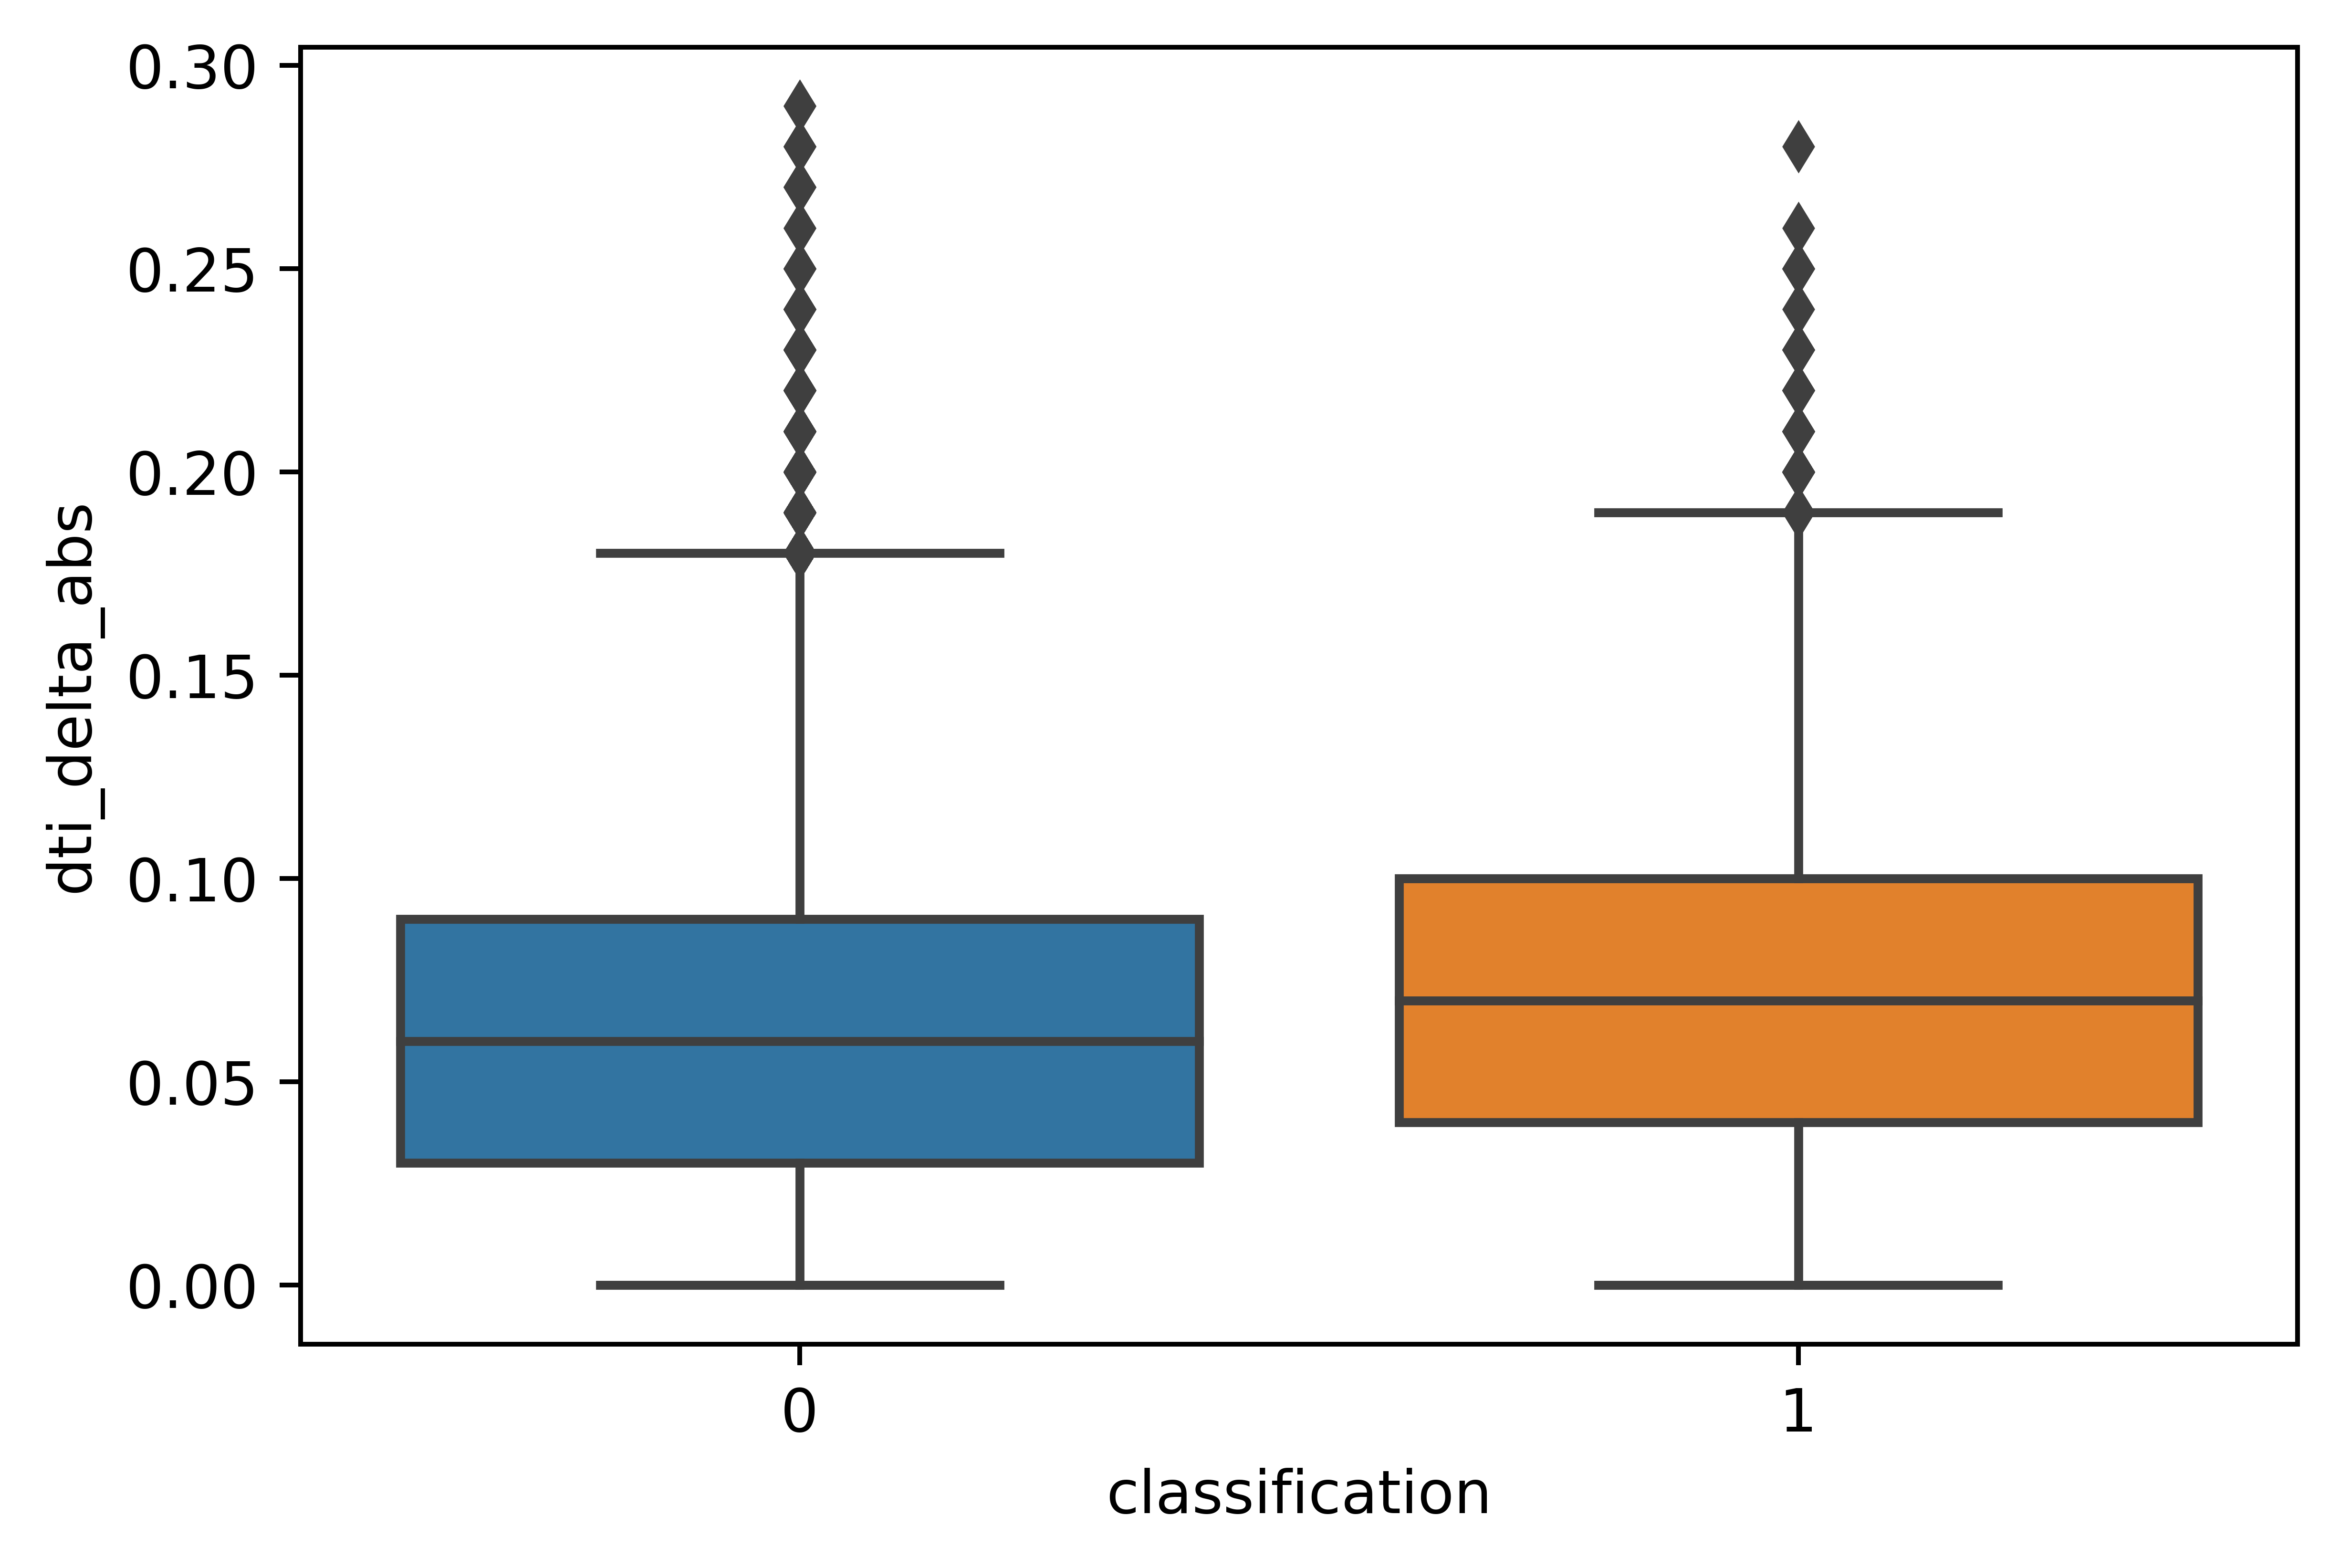

In [42]:
for f in min_features:
    plt.figure(dpi=900)
    sns.boxplot(x='classification',y=f,data=train_df)

How is income distributed among different kinds of homeowners?

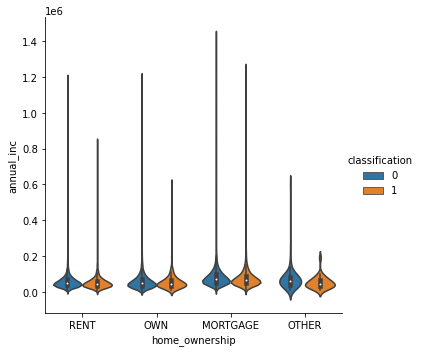

In [43]:
sns.catplot(x="home_ownership", y="annual_inc", hue="classification",

               data=train_df, kind="violin")

How do income and classification go together

<AxesSubplot:xlabel='classification', ylabel='annual_inc'>

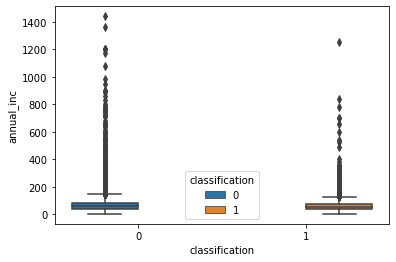

In [44]:
sns.boxplot(x='classification',y=(train_df.annual_inc/1000), hue='classification', data=train_df)

Purpose by classification (small business seems to default often)

<Figure size 648x1440 with 0 Axes>

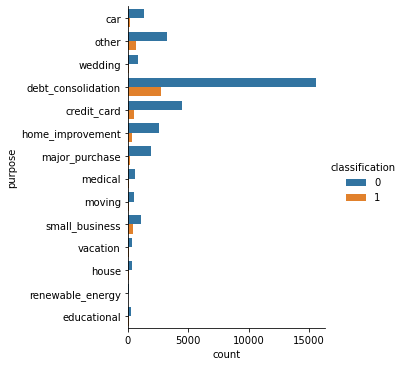

In [45]:
plt.figure(figsize=(9,20))
sns.catplot(y='purpose',hue='classification',data=train_df,kind='count')

#### Features Showing shares/ratio  of loan vs. rejected

What's the percentage of defaults and successes in the different purposes? Small business loans seem to be most dangerous

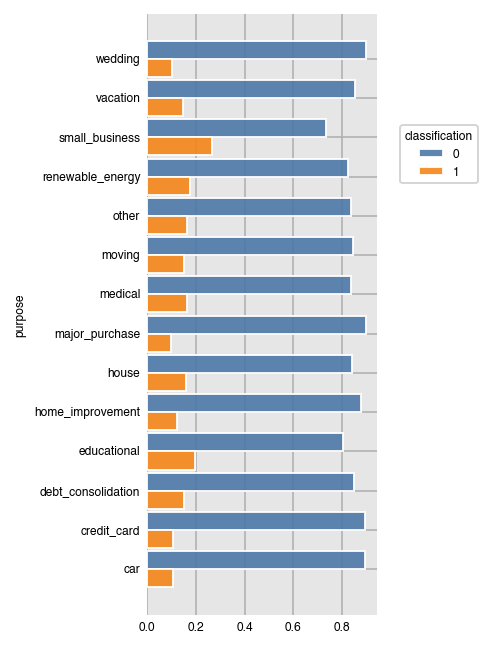

In [46]:
dxp.count(val='purpose', data=train_df, split='classification', normalize='purpose',orientation='h')

What's the default rates in each state? 

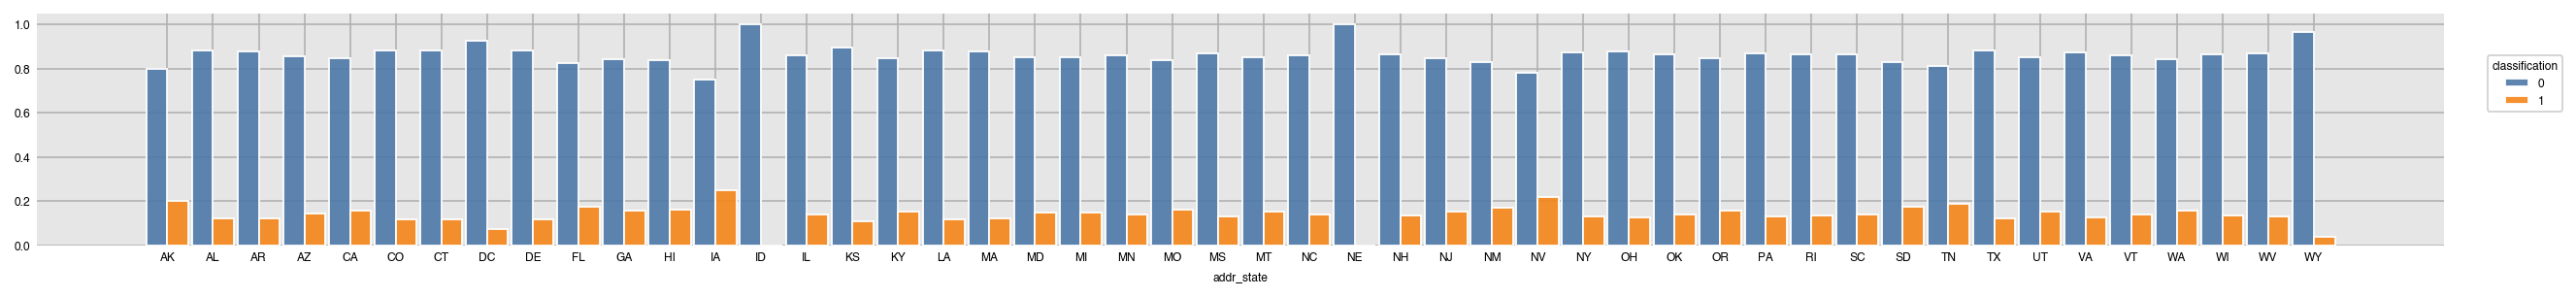

In [47]:
# %-Showing of the geographical distribution
state_distri_rej_pc =dxp.count(val='addr_state', data=train_df, split='classification', normalize='addr_state')
state_distri_rej_pc

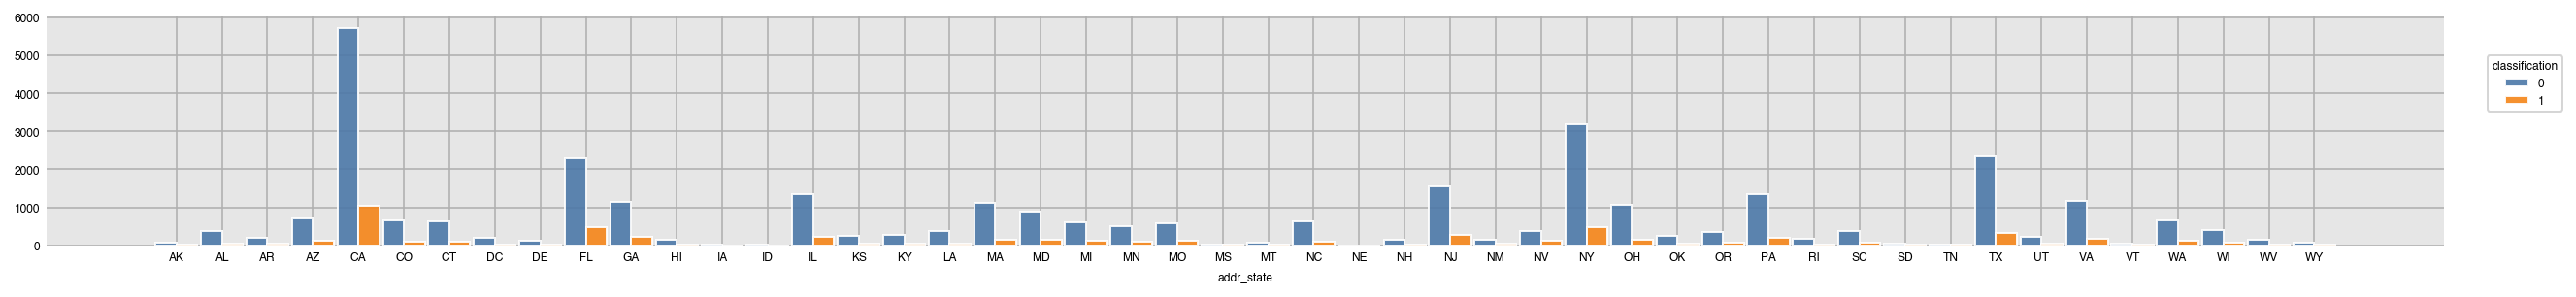

In [48]:
# %-Showing of the geographical distribution
state_distri_rej_abs =dxp.count(val='addr_state', data=train_df, split='classification')
state_distri_rej_abs

### Average-Joe's
Determine average lending behavior

In [49]:
train_df.describe().round(2)

loan_amnt      term  installment  annual_inc  debt_income_ratio  \
count   38429.00  38429.00     38429.00    38429.00           38429.00   
mean    11212.52     42.50       324.72    69188.88              13.51   
std      7397.10     10.67       207.36    50754.87               6.66   
min       500.00     36.00        15.67     3300.00               0.00   
25%      5500.00     36.00       168.09    42000.00               8.40   
50%     10000.00     36.00       280.97    60000.00              13.62   
75%     15000.00     60.00       430.72    83000.00              18.77   
max     35000.00     60.00      1305.19  1440000.00              29.99   

       inq_last_6mths  open_acc   pub_rec   revol_bal  revol_util  total_acc  \
count        38429.00  38429.00  38429.00    38429.00    38429.00   38429.00   
mean             1.04      9.41      0.06    14259.63       49.49      22.34   
std              1.38      4.43      0.24    21186.73       28.19      11.51   
min              0.00      1.00      0.00        0.00        0.00       1.00   
25%              0.00      6.00      0.00     3808.00       26.40      14.00   
50%              1.00      9.00      0.00     9044.00       50.10      21.00   
75%              2.00     12.00      0.00    17420.00       72.90      29.00   
max             17.00     46.00      4.00  1207359.00      108.80      90.00   

       pub_rec_bankruptcies  classification  inc_monthly  months_to_pay  \
count              38429.00        38429.00     38429.00       38429.00   
mean                   0.04            0.14      5765.74           2.23   
std                    0.20            0.35      4229.57           1.38   
min                    0.00            0.00       275.00           0.02   
25%                    0.00            0.00      3500.00           1.18   
50%                    0.00            0.00      5000.00           1.96   
75%                    0.00            0.00      6916.67           3.00   
max                    2.00            1.00    120000.00           9.86   

       mon_debt_tot_abs  dti_incl_inst  rev_bal_vs_inc      year     month  \
count          38429.00       38429.00        38429.00  38429.00  38429.00   
mean            1065.43           0.20            0.21   2010.32      7.19   
std              654.47           0.08            0.21      0.85      3.35   
min               15.67           0.00            0.00   2007.00      1.00   
25%              614.16           0.14            0.07   2010.00      4.00   
50%              947.20           0.20            0.16   2011.00      7.00   
75%             1378.43           0.26            0.28   2011.00     10.00   
max            23077.60           0.43            4.29   2011.00     12.00   

       dti_delta_abs  
count       38429.00  
mean            0.07  
std             0.04  
min             0.00  
25%             0.04  
50%             0.06  
75%             0.09  
max             0.29

####  Larry the Loaner
Find averages of defaulted loans

In [50]:
train_df_rej.describe().round()

loan_amnt    term  installment  annual_inc  debt_income_ratio  \
count     5468.0  5468.0       5468.0      5468.0             5468.0   
mean     12062.0    46.0        336.0     63485.0               14.0   
std       7971.0    12.0        214.0     47376.0                7.0   
min        600.0    36.0         22.0      4080.0                0.0   
25%       5962.0    36.0        171.0     38400.0                9.0   
50%      10000.0    36.0        294.0     54000.0               15.0   
75%      16000.0    60.0        453.0     75000.0               19.0   
max      35000.0    60.0       1305.0   1250000.0               30.0   

       inq_last_6mths  open_acc  pub_rec  revol_bal  revol_util  total_acc  \
count          5468.0    5468.0   5468.0     5468.0      5468.0     5468.0   
mean              1.0       9.0      0.0    14903.0        56.0       22.0   
std               2.0       5.0      0.0    26288.0        28.0       12.0   
min               0.0       2.0      0.0        0.0         0.0        2.0   
25%               0.0       6.0      0.0     4125.0        36.0       13.0   
50%               1.0       9.0      0.0     9488.0        59.0       20.0   
75%               2.0      12.0      0.0    17997.0        80.0       29.0   
max              17.0      38.0      2.0  1207359.0       106.0       70.0   

       pub_rec_bankruptcies  classification  inc_monthly  months_to_pay  \
count                5468.0          5468.0       5468.0         5468.0   
mean                    0.0             1.0       5290.0            3.0   
std                     0.0             0.0       3948.0            2.0   
min                     0.0             1.0        340.0            0.0   
25%                     0.0             1.0       3200.0            1.0   
50%                     0.0             1.0       4500.0            2.0   
75%                     0.0             1.0       6250.0            4.0   
max                     2.0             1.0     104167.0           10.0   

       mon_debt_tot_abs  dti_incl_inst  rev_bal_vs_inc    year   month  \
count            5468.0         5468.0          5468.0  5468.0  5468.0   
mean             1069.0            0.0             0.0  2010.0     7.0   
std               708.0            0.0             0.0     1.0     3.0   
min                29.0            0.0             0.0  2007.0     1.0   
25%               617.0            0.0             0.0  2010.0     5.0   
50%               951.0            0.0             0.0  2011.0     8.0   
75%              1379.0            0.0             0.0  2011.0    10.0   
max             23078.0            0.0             3.0  2011.0    12.0   

       dti_delta_abs  
count         5468.0  
mean             0.0  
std              0.0  
min              0.0  
25%              0.0  
50%              0.0  
75%              0.0  
max              0.0

## Data Wrangling

### Find and deal with skewed data

In [51]:
train_df.skew()

loan_amnt                1.052723
term                     1.030653
installment              1.116461
annual_inc               7.129388
debt_income_ratio       -0.047021
inq_last_6mths           2.135799
open_acc                 1.003840
pub_rec                  4.537597
revol_bal               12.019682
revol_util              -0.057529
total_acc                0.818473
pub_rec_bankruptcies     4.555888
classification           2.047975
inc_monthly              7.129388
months_to_pay            0.974776
mon_debt_tot_abs         2.565709
dti_incl_inst            0.056281
rev_bal_vs_inc           3.292932
year                    -1.059512
month                   -0.226006
dti_delta_abs            0.978562
dtype: float64

Use log transformation on little skewed data and sqrt transformation on highly skewed data

In [52]:
lil_skewed = ['loan_amnt','installment','annual_inc','inq_last_6mths','open_acc','revol_bal','total_acc']
for f in lil_skewed:
    #normalize data to range 0-1
    train_df[f] = np.log(train_df[f] + 1)

#handle skewed data (loan_amnt, installment, annual_inc,delinq_2yrs,inq_last_6mths!!
#open_acc, pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,pub_rec_bankruptcies
high_skewed = ['pub_rec','pub_rec_bankruptcies']
for f in high_skewed:
    train_df[f] = np.sqrt(train_df[f] +1)

### Normalize data to range 0 -1

In [71]:
#find numeric columns
num_col2 = [c for c in train_df.columns.drop('classification') if type(train_df[c].values[0]) != type('str')]

In [72]:
#create dataframe that only contains eihter numeric or categorical features
num_df = train_df[num_col2]
cat_df = train_df[train_df.columns.drop(num_col2)]
cat_df = cat_df.reset_index(drop=True)

In [73]:
#scale numeric variables to range 0 - 1
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled = scaler.fit_transform(num_df)
scaled_df = pd.DataFrame(scaled, columns=num_df.columns)

In [74]:
#merge numeric and categorical variables back into one dataframe
scaled_cat_df = pd.concat([scaled_df,cat_df],axis=1,ignore_index=False)

### create dummies from categorical data

In [57]:
#create dataframe that only contains "insightful" columns (min_features + labels)
model_cols = []
for li in [min_features,labels]:
    for feature in li:
        model_cols.append(feature)
        
model_df = scaled_cat_df[model_cols]

### Balance the unbalanced classifications
The dataset contains much more 0s than 1s. We want to split the dataset into train and test data and have the model trained on a dataset that contains as many 0s as 1s

In [58]:
#create dataframe for model building that contains dummies for categorical features
final_data = pd.get_dummies(train_df, columns=cats, drop_first=True,dtype=int)

In [59]:
#split data into train and test
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
#X = final_data.drop(labels, axis=1)
#y = final_data[labels[0]]

train_df, test_df = train_test_split(final_data, test_size=0.3, stratify = final_data[labels[0]], random_state=101)

y_test = test_df[labels[0]]
X_test = test_df.drop(labels, axis=1)

In [60]:
from sklearn.utils import resample
# Separate majority and minority classes
df_majority = train_df[train_df.classification ==0]
df_minority = train_df[train_df.classification ==1]


#downsize df_majority to twice the length of minority
df_majority = df_majority.sample(n= 2*len(df_minority),replace=False)

# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=len(df_majority),    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
train_df_upsampled = pd.concat([df_majority, df_minority_upsampled])
 
# Display new class counts
train_df_upsampled.classification.value_counts()

y_train = train_df_upsampled[labels[0]]
X_train = train_df_upsampled.drop(labels, axis=1)

## Build predictive models
Create a list of classification models that we want to use on our dataset

In [61]:
#create list of models that are to be tested
rs = 42
models = [RandomForestClassifier(random_state=rs),XGBClassifier(random_state=rs),LogisticRegression(random_state=rs),SVC(random_state=rs)]

Iterate through all models without any specifications to find best base model

In [62]:
#iterate through models and print results
for m in models:
    model = m
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    portfolio = pd.DataFrame(data={'Test':y_test,'Predict':predictions},columns=['Test','Predict'])
    print(f'{m}')
    print(classification_report(y_test, predictions))
    print(confusion_matrix(y_test, predictions))
    print(f'The portfolio would be {round(len(portfolio[portfolio.Predict == 0])/len(portfolio),3)*100}% of original size and it would contain {round(len(portfolio.loc[(portfolio.Test == 1)&(portfolio.Predict == 0)])/len(portfolio[portfolio.Predict == 0]),3)*100}% defaults.')
    print('#######################################################')

RandomForestClassifier(random_state=42)
              precision    recall  f1-score   support

           0       0.88      0.88      0.88      9889
           1       0.28      0.27      0.28      1640

    accuracy                           0.80     11529
   macro avg       0.58      0.58      0.58     11529
weighted avg       0.79      0.80      0.80     11529

[[8748 1141]
 [1195  445]]
The portfolio would be 86.2% of original size and it would contain 12.0% defaults.
#######################################################
XGBClassifier(random_state=42)
              precision    recall  f1-score   support

           0       0.91      0.66      0.77      9889
           1       0.23      0.62      0.34      1640

    accuracy                           0.66     11529
   macro avg       0.57      0.64      0.55     11529
weighted avg       0.82      0.66      0.71     11529

[[6550 3339]
 [ 622 1018]]
The portfolio would be 62.2% of original size and it would contain 8.7% defaults.


/Users/leo/anaconda3/envs/nf/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(random_state=42)
              precision    recall  f1-score   support

           0       0.90      0.61      0.73      9889
           1       0.20      0.59      0.30      1640

    accuracy                           0.61     11529
   macro avg       0.55      0.60      0.51     11529
weighted avg       0.80      0.61      0.67     11529

[[6014 3875]
 [ 667  973]]
The portfolio would be 57.9% of original size and it would contain 10.0% defaults.
#######################################################
SVC(random_state=42)
              precision    recall  f1-score   support

           0       0.89      0.42      0.57      9889
           1       0.16      0.68      0.26      1640

    accuracy                           0.46     11529
   macro avg       0.53      0.55      0.42     11529
weighted avg       0.78      0.46      0.53     11529

[[4152 5737]
 [ 524 1116]]
The portfolio would be 40.6% of original size and it would contain 11.200000000000001% defaults.

### Implement Random Search for better Results

In [63]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

#### Create Search Grid for Random Forest

In [64]:
#create grid of hyperparameters for random forest
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 900, num = 10)]
# Number of features to consider at every split
max_features = ['auto','sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 30, num = 10)]
#max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5,10,20,50]
# Minimum number of samples required at each leaf node
min_samples_leaf = [2, 4,10,20]
# Method of selecting samples for training each tree
#bootstrap = [True, False]
# Create the random grid
#class_weight = {0:1,1:2}
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               #'class_weight':class_weight
                }

#### Create Search Grid for Logistic Regression

In [65]:
log_grid = dict()
log_grid['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
log_grid['penalty'] = ['l1', 'l2', 'elasticnet']
log_grid['C'] = [0.1, 0.3, 0.5, 0.7, 0.9,1.3]

#### Create Search Grid for XGBoost

In [66]:
xgb_grid = dict()
xgb_grid['max_depth'] = [2, 3, 5]
xgb_grid['learning_rate'] = [0.1, 0.2, 0.4]
xgb_grid['n_estimators'] = [int(x) for x in np.linspace(start = 50, stop = 300, num = 20)]
xgb_grid['gamma'] = [0,0.1,0.2,0.3,0.4,0.5]


#### Create Search Grid for SVC

In [67]:
svc_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}

####  Create dictionary with search grids

In [68]:
grids = {models[0]:random_grid,
         models[1]:xgb_grid,
         models[2]:log_grid,
         models[3]:svc_grid}

### Run random search for all models based on the given grids
!!! WARNING !!! This cell might take a while. For faster (but less thorough) analysis, change the number of iterations (n_iter) to a lower amount

In [70]:
for m in models:
    model = m
    grid = grids[m]
    
    # run randomized search and optimize for recall because we want to detect as many positives as possible
    clf = RandomizedSearchCV(estimator=model,param_distributions=grid,n_iter = 10,verbose=1,scoring='recall')
    search = clf.fit(X_train, y_train)
    predictions = search.best_estimator_.predict(X_test)
    portfolio = pd.DataFrame(data={'Test':y_test,'Predict':predictions},columns=['Test','Predict'])
    
    print(f'Best hyperparameters for {m}:')
    print(search.best_params_)
    print(f'Performance of best {m}:')
    print(classification_report(y_test, predictions))
    print(confusion_matrix(y_test, predictions))
    print(f'The portfolio would be {round(len(portfolio[portfolio.Predict == 0])/len(portfolio),3)*100}% of original size and it would contain {round(len(portfolio.loc[(portfolio.Test == 1)&(portfolio.Predict == 0)])/len(portfolio[portfolio.Predict == 0]),3)*100}% defaults.')
    print('#######################################################')

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


KeyboardInterrupt: 

### For comparison, always predicting 0 (successful loan) would yield the following results

In [ ]:
pred = [0 for i in y_test]

In [ ]:
print(classification_report(y_test,pred))

In [ ]:
print(confusion_matrix(y_test,pred))

## Calculate Return
Make calculation to find out average monetary loss when a loan defaults to approximate the savings that we can generate through our model

In [ ]:
df_cost = original.copy()
df_cost_a = df_cost[['loan_amnt','funded_amnt', 'funded_amnt_inv','loan_status','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','recoveries']]
df_cost_a_rej = df_cost_a[df_cost_a['loan_status']=='Charged Off']
df_cost_a_rej['loss_inv']=(df_cost_a_rej.total_pymnt_inv)-(df_cost_a_rej.funded_amnt_inv)

In [ ]:
#Look at defaulted loans to find that median loss for investor is ca. 3,000$ 
#with median loan amount of 10,000$ this is a loss of ca. 33% because even defaults pay some mone back
df_cost_a_rej.describe()